<a href="https://colab.research.google.com/github/IgorEisenlohr/IgorEisenlohr/blob/main/TCC_11_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2, RFE, RFECV
from sklearn.model_selection import train_test_split, KFold, cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
import xgboost as xgb
import pickle
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# IMPORTANDO BASE DE DADOS

In [ ]:
# carregando a base de dados
df_completo = pd.read_excel('/content/drive/MyDrive/TCC ANALISE DE DADOS/covid2022_v2.xlsx')
df_completo.head(10)

In [ ]:
df_completo.shape

(467196, 45)

In [ ]:
df_completo.columns

In [ ]:
# tamanho da base de dados
df = df_completo.query('Classificacao == "Confirmados"')
df = pd.DataFrame(df)
df.drop(columns=['Classificacao'], inplace = True)
df.to_csv('confirmados_covid_v2.csv', index=False)

#Separando em casos confirmados

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/TCC ANALISE DE DADOS/confirmados_covid_v2.csv')
df.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3,4,5,6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


DataNotificacao DataCadastro DataDiagnostico DataColeta_RT_PCR  \
0      2022-06-24   2022-06-24      2022-06-23               NaN   
1      2022-06-23   2022-06-23      2022-06-20               NaN   
2      2022-06-21   2022-06-22      2022-06-19               NaN   
3      2022-06-20   2022-06-20      2022-06-20               NaN   
4      2022-06-20   2022-06-20      2022-06-20               NaN   

  DataColetaTesteRapido DataColetaSorologia DataColetaSorologiaIGG  \
0                   NaN                 NaN                    NaN   
1                   NaN                 NaN                    NaN   
2                   NaN                 NaN                    NaN   
3                   NaN                 NaN                    NaN   
4                   NaN                 NaN                    NaN   

  DataEncerramento DataObito Evolucao  ... ViagemBrasil ViagemInternacional  \
0              NaN       NaN        -  ...          Não                 Não   
1              NaN       NaN        -  ...          Não                 Não   
2              NaN       NaN        -  ...          Não                 Não   
3              NaN       NaN        -  ...          Não                 Não   
4              NaN       NaN        -  ...          Não                 Não   

  ProfissionalSaude PossuiDeficiencia MoradorDeRua ResultadoRT_PCR  \
0               Não               Não          Não   Não Informado   
1               Sim               Não          Não   Não Informado   
2               Não               Não          Não   Não Informado   
3               Não               Não          Não   Não Informado   
4               Não               Não          Não   Não Informado   

  ResultadoTesteRapido ResultadoSorologia ResultadoSorologia_IGG  \
0        Não Informado      Não Informado          Não Informado   
1        Não Informado      Não Informado          Não Informado   
2        Não Informado      Não Informado          Não Informado   
3        Não Informado      Não Informado          Não Informado   
4        Não Informado      Não Informado          Não Informado   

  TipoTesteRapido  
0   Não Informado  
1   Não Informado  
2   Não Informado  
3   Não Informado  
4   Não Informado  

[5 rows x 44 columns]

In [ ]:
df.shape

(121257, 44)

#Variavel resposta

In [ ]:
df.Evolucao.value_counts()

Cura                       118254
-                            1439
Óbito pelo COVID-19          1417
Ignorado                      139
Óbito por outras causas         8
Name: Evolucao, dtype: int64

In [ ]:
# casos de evolucao ignorada ou de óbito por outros motivos
df.query('Evolucao != "Cura" and Evolucao != "Óbito pelo COVID-19"')

DataNotificacao DataCadastro DataDiagnostico    DataColeta_RT_PCR  \
0           2022-06-24   2022-06-24      2022-06-23                  NaN   
1           2022-06-23   2022-06-23      2022-06-20                  NaN   
2           2022-06-21   2022-06-22      2022-06-19                  NaN   
3           2022-06-20   2022-06-20      2022-06-20                  NaN   
4           2022-06-20   2022-06-20      2022-06-20                  NaN   
...                ...          ...             ...                  ...   
119865      2020-08-01   2020-08-01      2020-07-21  2020-07-31 00:00:00   
120349      2022-06-03   2022-06-03      2022-05-27                  NaN   
120350      2021-04-21   2021-04-21      2021-04-18  2021-04-21 00:00:00   
120351      2020-12-11   2020-12-11      2020-12-08  2020-12-11 00:00:00   
120352      2022-03-11   2022-03-17      2022-03-10  2022-03-11 00:00:00   

       DataColetaTesteRapido DataColetaSorologia DataColetaSorologiaIGG  \
0                        NaN                 NaN                    NaN   
1                        NaN                 NaN                    NaN   
2                        NaN                 NaN                    NaN   
3                        NaN                 NaN                    NaN   
4                        NaN                 NaN                    NaN   
...                      ...                 ...                    ...   
119865            2020-08-01                 NaN                    NaN   
120349            2022-06-03                 NaN                    NaN   
120350                   NaN                 NaN                    NaN   
120351                   NaN                 NaN                    NaN   
120352                   NaN                 NaN                    NaN   

           DataEncerramento   DataObito                 Evolucao  ...  \
0                       NaN         NaN                        -  ...   
1                       NaN         NaN                        -  ...   
2                       NaN         NaN                        -  ...   
3                       NaN         NaN                        -  ...   
4                       NaN         NaN                        -  ...   
...                     ...         ...                      ...  ...   
119865  2020-11-30 00:00:00  2020-11-28  Óbito por outras causas  ...   
120349  2022-06-03 00:00:00  2022-06-08                        -  ...   
120350  2021-12-07 00:00:00  2021-10-18  Óbito por outras causas  ...   
120351  2021-02-25 00:00:00  2021-02-25  Óbito por outras causas  ...   
120352  2022-03-11 00:00:00  2022-03-11  Óbito por outras causas  ...   

       ViagemBrasil ViagemInternacional ProfissionalSaude PossuiDeficiencia  \
0               Não                 Não               Não               Não   
1               Não                 Não               Sim               Não   
2               Não                 Não               Não               Não   
3               Não                 Não               Não               Não   
4               Não                 Não               Não               Não   
...             ...                 ...               ...               ...   
119865          Não                 Não               Não               Não   
120349          Não                 Não               Não               Não   
120350          Não                 Não               Não               Não   
120351          Não                 Não               Não               Não   
120352          Não                 Não               Não               Não   

       MoradorDeRua ResultadoRT_PCR ResultadoTesteRapido ResultadoSorologia  \
0               Não   Não Informado        Não Informado      Não Informado   
1               Não   Não Informado        Não Informado      Não Informado   
2               Não   Não Informado        Não Informado      Não Informado   
3               Não   Não Informado        Não Info

In [ ]:
df.drop(index=df.query('Evolucao != "Cura" and Evolucao != "Óbito pelo COVID-19"').index, inplace=True)

In [ ]:
df['SobreviveuCovid'] = df.Evolucao != 'Óbito pelo COVID-19'
df.SobreviveuCovid.value_counts()

True     118254
False      1417
Name: SobreviveuCovid, dtype: int64

118.254 pacientes confirmados com caso de Evolução registrada (1417 óbitos no período)

# Time stamp

In [ ]:
variaveis_data = ['DataNotificacao', 'DataDiagnostico','DataObito']

for variavel in variaveis_data:
  df[variavel] = pd.to_datetime(df[variavel])

In [ ]:
#semestre do ano
df['SEMESTRE']= df.DataDiagnostico.dt.year.astype(str) + 'S'+ np.where(df.DataDiagnostico.dt.quarter.gt(2),2,1).astype(str)
df['MES']= df.DataDiagnostico.dt.year.astype(str) + 'M'+ df.DataDiagnostico.dt.month.astype(str)
print(df['SEMESTRE'].unique())
print()
print(df['MES'].unique())

['2022S1' '2021S2' '2021S1' '2020S2' '2020S1']

['2022M5' '2022M4' '2022M1' '2021M12' '2021M10' '2021M5' '2021M1' '2022M6'
 '2021M9' '2020M12' '2020M11' '2020M8' '2020M7' '2020M6' '2020M5'
 '2021M11' '2021M8' '2021M7' '2021M3' '2021M2' '2020M10' '2020M9' '2020M4'
 '2021M4' '2022M3' '2021M6' '2022M2' '2020M3' '2020M1']


In [ ]:
df.MES.value_counts()

2022M1     31422
2021M3      7807
2020M11     6461
2022M2      6274
2020M10     5969
2020M12     5394
2022M6      5159
2020M6      4917
2020M5      4545
2021M4      4384
2021M1      4085
2020M7      3562
2021M5      3140
2021M2      3100
2020M9      3005
2021M9      2862
2021M8      2573
2020M8      2278
2021M6      2252
2022M5      1901
2021M12     1827
2021M10     1642
2021M11     1547
2021M7      1542
2020M4      1062
2022M3       567
2022M4       283
2020M3       109
2020M1         2
Name: MES, dtype: int64

Nao teve caso de covid no primeiro semestre de 2019, verificar se foi dado como confirmado

In [ ]:
df.SEMESTRE.value_counts().sort_values()

2020S1    10635
2021S2    11993
2021S1    24768
2020S2    26669
2022S1    45606
Name: SEMESTRE, dtype: int64

O primeiro caso de covid confirmado no BRASIL foi dia 27/02/2020, LOGO:

In [ ]:
confirmado_antes_data = df.query('DataDiagnostico <= "27/02/2020"')
confirmado_antes_data

DataNotificacao DataCadastro DataDiagnostico DataColeta_RT_PCR  \
90942       2022-01-25   2022-02-01      2020-01-18               NaN   
115113      2021-04-22   2021-05-28      2020-01-01               NaN   

       DataColetaTesteRapido DataColetaSorologia DataColetaSorologiaIGG  \
90942             2022-01-25                 NaN                    NaN   
115113                   NaN                 NaN             2021-04-20   

           DataEncerramento DataObito Evolucao  ... PossuiDeficiencia  \
90942   2022-02-14 00:00:00       NaT     Cura  ...               Não   
115113  2021-04-20 00:00:00       NaT     Cura  ...               Não   

       MoradorDeRua ResultadoRT_PCR ResultadoTesteRapido ResultadoSorologia  \
90942           Não   Não Informado             Positivo      Não Informado   
115113          Não   Não Informado        Não Informado      Não Informado   

       ResultadoSorologia_IGG        TipoTesteRapido SobreviveuCovid SEMESTRE  \
90942           Não Informado  Teste rápido Antígeno            True   2020S1   
115113               Reagente          Não Informado            True   2020S1   

           MES  
90942   2020M1  
115113  2020M1  

[2 rows x 47 columns]

In [ ]:
#drop de pacientes antes do terceiro mes de 2020
df.drop(index= confirmado_antes_data.index, inplace = True)

In [ ]:
df.groupby('SEMESTRE').SobreviveuCovid.value_counts()

SEMESTRE  SobreviveuCovid
2020S1    True               10297
          False                336
2020S2    True               26365
          False                304
2021S1    True               24183
          False                585
2021S2    True               11904
          False                 89
2022S1    True               45503
          False                103
Name: SobreviveuCovid, dtype: int64

# DEFININDO DADOS DE TREINO, VALIDACAO, TESTE

In [ ]:
df_train = df.query('SEMESTRE == "2020S1" or SEMESTRE == "2020S2" or SEMESTRE == "2021S1" or SEMESTRE == "2021S2"') #2020 e 2021 para treino
df_train.shape

(74063, 47)

In [ ]:
df_validacao = df.query('MES =="2022M1"')
df_validacao.shape

(31422, 47)

In [ ]:
df_test =  df.query('MES =="2022M2" or MES =="2022M3" or MES =="2022M4" or MES =="2022M5" or MES =="2022M6"')
df_test.shape

(14184, 47)

# TRATANDO TREINO

In [ ]:
df_train.nunique()

DataNotificacao              719
DataCadastro                 718
DataDiagnostico              667
DataColeta_RT_PCR            706
DataColetaTesteRapido        671
DataColetaSorologia          485
DataColetaSorologiaIGG       534
DataEncerramento             706
DataObito                    456
Evolucao                       2
CriterioConfirmacao            4
StatusNotificacao              2
Municipio                      1
Bairro                        81
FaixaEtaria                   12
IdadeNaDataNotificacao     24784
Sexo                           3
RacaCor                        6
Escolaridade                  11
Gestante                       7
Febre                          3
DificuldadeRespiratoria        3
Tosse                          3
Coriza                         3
DorGarganta                    3
Diarreia                       3
Cefaleia                       3
ComorbidadePulmao              3
ComorbidadeCardio              3
ComorbidadeRenal               3
Comorbidad

In [ ]:
#drop dos dias de coleta (muitos dados faltantes) e temos o resultado dos testes
df_train.drop(columns=['DataColetaSorologiaIGG'], inplace = True)
df_train.drop(columns=['DataColetaSorologia'], inplace = True)
df_train.drop(columns=['DataColetaTesteRapido'], inplace = True)
df_train.drop(columns=['DataColeta_RT_PCR'], inplace = True)
df_train.drop(columns=['DataEncerramento'], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
#visualizando valores possíveis para cada atributo
for i in df_train.drop(columns=['DataNotificacao','DataCadastro','DataDiagnostico','DataObito']).columns:
  print(f'{i} : {df_train[i].unique()}\n\n')

Evolucao : ['Cura' 'Óbito pelo COVID-19']


CriterioConfirmacao : ['Clinico' 'Clinico Epdemiologico' 'Laboratorial' '-']


StatusNotificacao : ['Em Aberto' 'Encerrado']


Municipio : ['VITORIA']


Bairro : ['CENTRO' 'ESTRELINHA' 'SANTOS DUMONT' 'SANTA TEREZA' 'PRAIA DO SUÁ'
 'SANTA MARTHA' 'SANTO ANTÔNIO' 'DO CABRAL' 'ROMÃO' 'SÃO PEDRO'
 'RESISTÊNCIA' 'BENTO FERREIRA' 'INHANGUETÁ' 'ANDORINHAS' 'CONSOLAÇÃO'
 'SÃO JOSÉ' 'BONFIM' 'JARDIM CAMBURI' 'NOVA PALESTINA' 'ENSEADA DO SUÁ'
 'ILHA DO PRÍNCIPE' 'JOANA DARC' 'GRANDE VITÓRIA' 'SANTA LÚCIA'
 'JESUS DE NAZARETH' 'ITARARÉ' 'JARDIM DA PENHA' 'VILA RUBIM'
 'SEGURANÇA DO LAR' 'JABOUR' 'DO QUADRO' 'CARATOÍRA' 'SÃO CRISTÓVÃO'
 'MARIA ORTIZ' 'CRUZAMENTO' 'TABUAZEIRO' 'MATA DA PRAIA' 'GOIABEIRAS'
 'GURIGICA' 'ILHA DAS CAIEIRAS' 'JUCUTUQUARA' 'UNIVERSITÁRIO'
 'FORTE SÃO JOÃO' 'REDENÇÃO' 'REPÚBLICA' 'DA PENHA' 'PARQUE MOSCOSO'
 'PIEDADE' 'FONTE GRANDE' 'CONQUISTA' 'SANTOS REIS' 'BOA VISTA'
 'SANTO ANDRÉ' 'MÁRIO CYPRESTE' 'SÃO BENEDITO' 'ARIOVALDO 

In [ ]:
valores_inconsistentes = ['TipoTesteRapido',  'ResultadoSorologia_IGG', 'ResultadoSorologia', 'ProfissionalSaude', 'ViagemInternacional', 'ViagemBrasil', 'FicouInternado' ]

boolean = {'Não Informado':'Ignorado'}

for i in valores_inconsistentes:
  df_train[i].replace(boolean, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
faleceu_covid = df_train.query('SobreviveuCovid == 1')

In [ ]:
for col in faleceu_covid.drop(columns=['DataNotificacao','DataCadastro','DataDiagnostico','DataObito']).columns:
  print(faleceu_covid[col].value_counts())
  print()

Cura    72749
Name: Evolucao, dtype: int64

Laboratorial             63770
Clinico                   8533
Clinico Epdemiologico      405
-                           41
Name: CriterioConfirmacao, dtype: int64

Encerrado    72515
Em Aberto      234
Name: StatusNotificacao, dtype: int64

VITORIA    72749
Name: Municipio, dtype: int64

JARDIM CAMBURI       11505
JARDIM DA PENHA       6583
PRAIA DO CANTO        4995
MATA DA PRAIA         3195
MARIA ORTIZ           2297
                     ...  
PONTAL DE CAMBURI       72
NAZARETH                67
AEROPORTO               21
PARQUE INDUSTRIAL        9
Não Encontrado           5
Name: Bairro, Length: 81, dtype: int64

30 a 39 anos       17413
40 a 49 anos       14486
20 a 29 anos       13331
50 a 59 anos       10428
60 a 69 anos        6870
10 a 19 anos        4390
70 a 79 anos        2918
80 a 89 anos         958
05 a 9 anos          920
0 a 4 anos           827
90 anos ou mais      202
-                      6
Name: FaixaEtaria, dtype: int

In [ ]:
# Representa muito fielmente a variavel target
df_train.drop(columns=['Evolucao'], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# COMORBIDADES E SINTOMAS IGNORADOS

In [ ]:
boolean = {'-':'Ignorado'}

comorbidades_sintomas = ['Febre','DificuldadeRespiratoria','Tosse','Coriza','DorGarganta','Diarreia','Cefaleia','ComorbidadePulmao',
                         'ComorbidadeCardio','ComorbidadeRenal','ComorbidadeDiabetes','ComorbidadeTabagismo','ComorbidadeObesidade']

for i in comorbidades_sintomas:
  df_train[i].replace(boolean, inplace = True)
  
df_train[comorbidades_sintomas].head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Febre DificuldadeRespiratoria Tosse Coriza DorGarganta Diarreia Cefaleia  \
21   Sim                     Não   Sim    Sim         Sim      Não      Sim   
22   Sim                     Não   Sim    Sim         Sim      Sim      Sim   
23   Sim                     Não   Sim    Sim         Sim      Não      Sim   
24   Sim                     Não   Sim    Sim         Sim      Não      Sim   
25   Sim                     Não   Sim    Sim         Não      Não      Sim   

   ComorbidadePulmao ComorbidadeCardio ComorbidadeRenal ComorbidadeDiabetes  \
21               Não               Não              Não                 Não   
22               Não               Não              Não                 Não   
23               Não               Não              Não                 Não   
24               Não               Não              Não                 Não   
25               Não               Não              Não                 Não   

   ComorbidadeTabagismo ComorbidadeObesidade  
21                  Não                  Não  
22                  Não                  Não  
23                  Não                  Não  
24                  Não                  Não  
25                  Não                  Não

In [ ]:
comorbidades_ignoradas = df_train.query('ComorbidadePulmao == "Ignorado" and ComorbidadeCardio == "Ignorado" and ComorbidadeRenal == "Ignorado" and ComorbidadeDiabetes == "Ignorado" and ComorbidadeTabagismo == "Ignorado" and ComorbidadeObesidade == "Ignorado"')
comorbidades_ignoradas_SobreviveuCovid = comorbidades_ignoradas.query('SobreviveuCovid == 1')
print(f'Numero de pacientes com todas comorbidades ignoradas: {comorbidades_ignoradas.shape[0]}')
print(f'{comorbidades_ignoradas_SobreviveuCovid.shape[0]/comorbidades_ignoradas.shape[0]*100}% dos pacientes com todas as comorbidades ignoradas que sobreviveram')

Numero de pacientes com todas comorbidades ignoradas: 213
100.0% dos pacientes com todas as comorbidades ignoradas que sobreviveram


In [ ]:
sintomas_ignorados = df_train.query('Febre == "Ignorado" and DificuldadeRespiratoria == "Ignorado" and Tosse == "Ignorado" and DorGarganta == "Ignorado" and Diarreia == "Ignorado" and Cefaleia == "Ignorado"')
sintomas_ignorados_SobreviveuCovid = sintomas_ignorados.query('SobreviveuCovid == 1')
print(f'Numero de pacientes com todos sintomas ignorados: {sintomas_ignorados.shape[0]}')
print(f'{sintomas_ignorados_SobreviveuCovid.shape[0]/sintomas_ignorados.shape[0]*100}% dos pacientes com todos os sintomas ignorados sobreviveram')

Numero de pacientes com todos sintomas ignorados: 210
100.0% dos pacientes com todos os sintomas ignorados sobreviveram


In [ ]:
#pacientes com comorbidades e sintomas ignorados
comorbidades_e_sintomas_ignorados = sintomas_ignorados.query('ComorbidadePulmao == "Ignorado" and ComorbidadeCardio == "Ignorado" and ComorbidadeRenal == "Ignorado" and ComorbidadeDiabetes == "Ignorado" and ComorbidadeTabagismo == "Ignorado" and ComorbidadeObesidade == "Ignorado"')
comorbidades_e_sintomas_ignorados_SobreviveuCovid = comorbidades_e_sintomas_ignorados.query('SobreviveuCovid == 1')
print(f'Numero de pacientes com todos sintomas e comorbidades ignoradas: {comorbidades_e_sintomas_ignorados.shape[0]}')
print(f'{comorbidades_e_sintomas_ignorados_SobreviveuCovid.shape[0]/comorbidades_e_sintomas_ignorados.shape[0]*100}% dos pacientes com todos sintomas comorbidades ignoradas que sobreviveram')

Numero de pacientes com todos sintomas e comorbidades ignoradas: 197
100.0% dos pacientes com todos sintomas comorbidades ignoradas que sobreviveram


In [ ]:
#drop de pacientes nos quais sintomas e comorbidades foram ignorados
df_train.drop(index= comorbidades_e_sintomas_ignorados.index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_train.shape

(73866, 41)

# Municipio

In [ ]:
df_train.Municipio.unique()

array(['VITORIA'], dtype=object)

In [ ]:
#dropando a coluna municipio por ter apenas um valor possivel
df_train.drop(columns=['Municipio'], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Idade

In [ ]:
#Priorizar a faixa etaria que a idade exata
df_train.drop(columns=['IdadeNaDataNotificacao'], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Analisando dados inconsistentes

In [ ]:
df_train.Escolaridade.value_counts()

Ignorado                                                       32627
Educação superior completa                                     12719
Ensino médio completo (antigo colegial ou 2º grau )            12503
5ª à 8ª série incompleta do EF (antigo ginásio ou 1º grau)      2910
Educação superior incompleta                                    2788
Ensino médio incompleto (antigo colegial ou 2º grau )           2714
Não se aplica                                                   2537
Ensino fundamental completo (antigo ginásio ou 1º grau)         2231
1ª a 4ª série incompleta do EF (antigo primário ou 1º grau)     1415
4ª série completa do EF (antigo primário ou 1º grau)             928
Analfabeto                                                       494
Name: Escolaridade, dtype: int64

In [ ]:
df_train.Escolaridade.value_counts().sum()

73866

In [ ]:
escolaridade_ignorada = df_train[df_train.Escolaridade == 'Ignorado'].shape[0]

In [ ]:
print(f'Porcentagem de nível de escolaridade ignorado: {escolaridade_ignorada/df_train.Escolaridade.value_counts().sum()*100}%')

Porcentagem de nível de escolaridade ignorado: 44.17052500473831%


In [ ]:
#drop da coluna escolaridade pela presença de muitos dados ignorados
df_train.drop(columns=['Escolaridade'], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
confirmados_sem_exame = df_train.query('ResultadoRT_PCR != "Positivo" and ResultadoTesteRapido != "Positivo" and ResultadoSorologia != "Reagente" and ResultadoSorologia_IGG != "Reagente"')
confirmados_sem_exame.CriterioConfirmacao.value_counts()

Clinico                  8389
Laboratorial              422
Clinico Epdemiologico     406
-                          55
Name: CriterioConfirmacao, dtype: int64

428 pacientes foram confirmados de forma LABORATORIAL, mas não deram positivo em nenhum exame, estavam mesmo com covid?

https://www.gov.br/saude/pt-br/coronavirus/diagnostico

In [ ]:
confirmados_laboratorial_sem_exame = confirmados_sem_exame.query('CriterioConfirmacao == "Laboratorial"')
confirmados_laboratorial_sem_exame.SobreviveuCovid.value_counts()

True     420
False      2
Name: SobreviveuCovid, dtype: int64

Desses 426 pacientes, 2 faleceram

In [ ]:
#drop de pacientes confirmados de forma laboratorial sem testar positivo para nenhum teste
df_train.drop(index= confirmados_laboratorial_sem_exame.index, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_train.shape

(73444, 38)

# Resultados dos TESTES

In [ ]:
testes = ['ResultadoSorologia','ResultadoSorologia_IGG','ResultadoTesteRapido','ResultadoRT_PCR']

for i in testes:

  print(df_train[i].value_counts())
  print()

Ignorado        69671
Reagente         2274
Não Reagente     1470
Inconclusivo       29
Name: ResultadoSorologia, dtype: int64

Ignorado        67357
Reagente         4921
Não Reagente     1111
Inconclusivo       55
Name: ResultadoSorologia_IGG, dtype: int64

Não Informado    59539
Positivo         12787
Negativo          1102
Inconclusivo        16
Name: ResultadoTesteRapido, dtype: int64

Positivo         49597
Não Informado    22905
Negativo           773
Inconclusivo       169
Name: ResultadoRT_PCR, dtype: int64



# Viagem

In [ ]:
df_train.ViagemBrasil.value_counts()

Não         45071
Ignorado    26798
Sim          1575
Name: ViagemBrasil, dtype: int64

In [ ]:
df_train.ViagemInternacional.value_counts()

Não         45366
Ignorado    28021
Sim            57
Name: ViagemInternacional, dtype: int64

In [ ]:
df_train.query('ViagemInternacional == "Sim"').ViagemBrasil.value_counts()

Não         34
Sim         20
Ignorado     3
Name: ViagemBrasil, dtype: int64

# Status notificacao

In [ ]:
df_train.StatusNotificacao.value_counts()

Encerrado    73219
Em Aberto      225
Name: StatusNotificacao, dtype: int64

In [ ]:
em_aberto = df_train.query('StatusNotificacao == "Em Aberto"')
em_aberto.shape

(225, 38)

In [ ]:
em_aberto.SobreviveuCovid.value_counts()

True    225
Name: SobreviveuCovid, dtype: int64

In [ ]:
#como não é possivel saber o desfecho dos casos em aberto, tal dado pode enganar o treino
df_train.drop(index= em_aberto.index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# FUNCAO PARA GRAFICOS

In [ ]:
def labelplot(titulo, ax, h, x, fs):
  ax.set_title(titulo, fontsize=18)
  ax.set_ylabel('')
  ax.set_xlabel('')
  plt.xticks(fontsize=14)
  for p in ax.patches:
    plt.annotate(p.get_height(), xy = (p.get_x()+x, p.get_height()+h), fontsize = fs, color ='k')

In [ ]:
#atualizando com as modificacoes feitas no dataset original
#agrupando os dados de acordo com a classe SobreviveuCovid
SobreviveuCovid  = df_train.query('SobreviveuCovid == 1')
faleceu     = df_train.query('SobreviveuCovid == 0')
#dentre os casos confirmados:
sobreviventes_infectados = df.query('SobreviveuCovid == 1')
falecidos_infectados = df.query('SobreviveuCovid == 0')

In [ ]:
#dentre os casos confirmados:
sobreviveu_covid = df_train.query('SobreviveuCovid == 1')
faleceu_covid = df_train.query('SobreviveuCovid == 0')
taxa_mortalidade = round(faleceu_covid.shape[0]/(sobreviveu_covid.shape[0]+faleceu_covid.shape[0])*100, 2)
print(f'Taxa de mortalidade entre os infectados: {taxa_mortalidade}%')

Taxa de mortalidade entre os infectados: 1.79%


# Analise de dados gerais

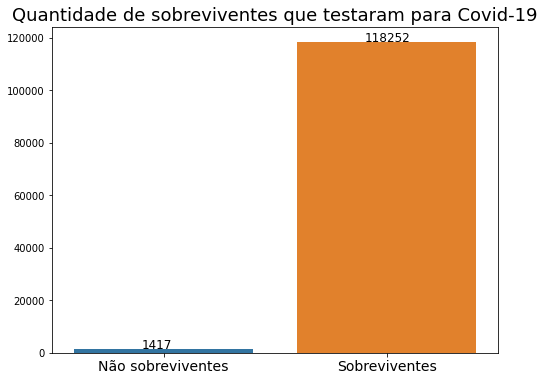

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = sns.countplot(x = df.SobreviveuCovid);
ax.set_xticklabels(['Não sobreviventes','Sobreviventes'])
labelplot('Quantidade de sobreviventes que testaram para Covid-19', ax, 100,0.3, 12)
fig.savefig('sobreviventes_geral.png')

# PACIENTES CONFIRMADOS COM COVID (treino 2020 e 2021)

In [ ]:
confirmados = df

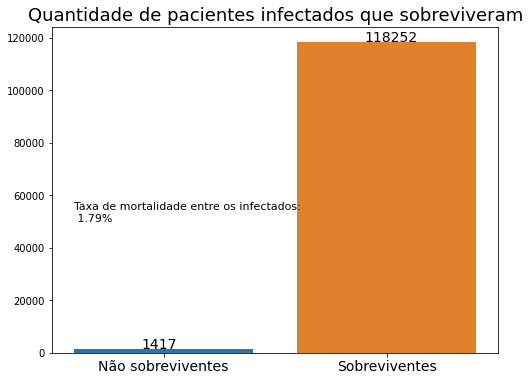

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = sns.countplot(x = confirmados.SobreviveuCovid);
plt.xticks(fontsize=14)
ax.set_xticklabels(['Não sobreviventes','Sobreviventes'])
ax.annotate(f'Taxa de mortalidade entre os infectados:\n {taxa_mortalidade}%', xy = (-0.4, 50000), fontsize=11)
labelplot('Quantidade de pacientes infectados que sobreviveram',ax, 100,0.3, 14)
fig.savefig('sobreviventes_infectados.png')

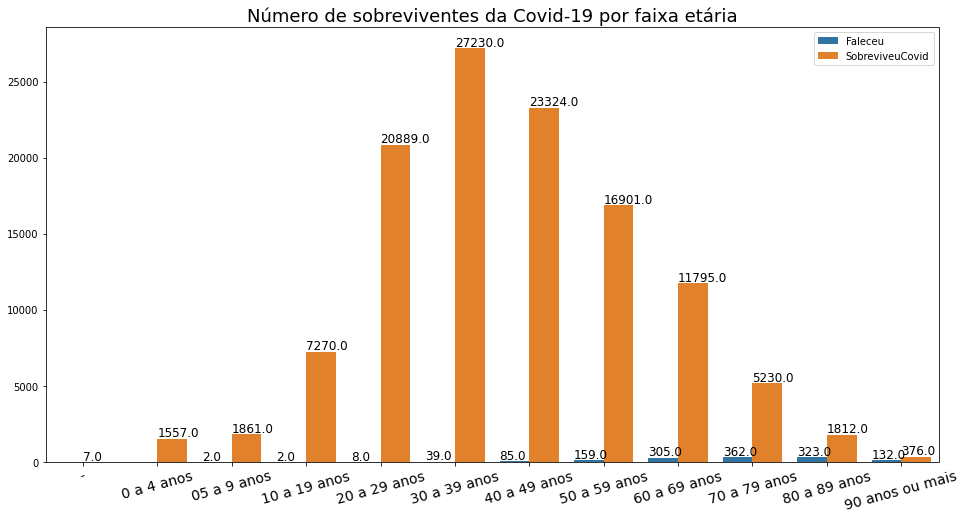

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(x = confirmados.FaixaEtaria.sort_values(ascending= True), hue = confirmados.SobreviveuCovid);
plt.legend(['Faleceu','SobreviveuCovid'])
plt.xticks(rotation=15, fontsize=14)
labelplot('Número de sobreviventes da Covid-19 por faixa etária',ax, 100,0, 12)
fig.savefig('sobreviventes_faixa_etaria.png')

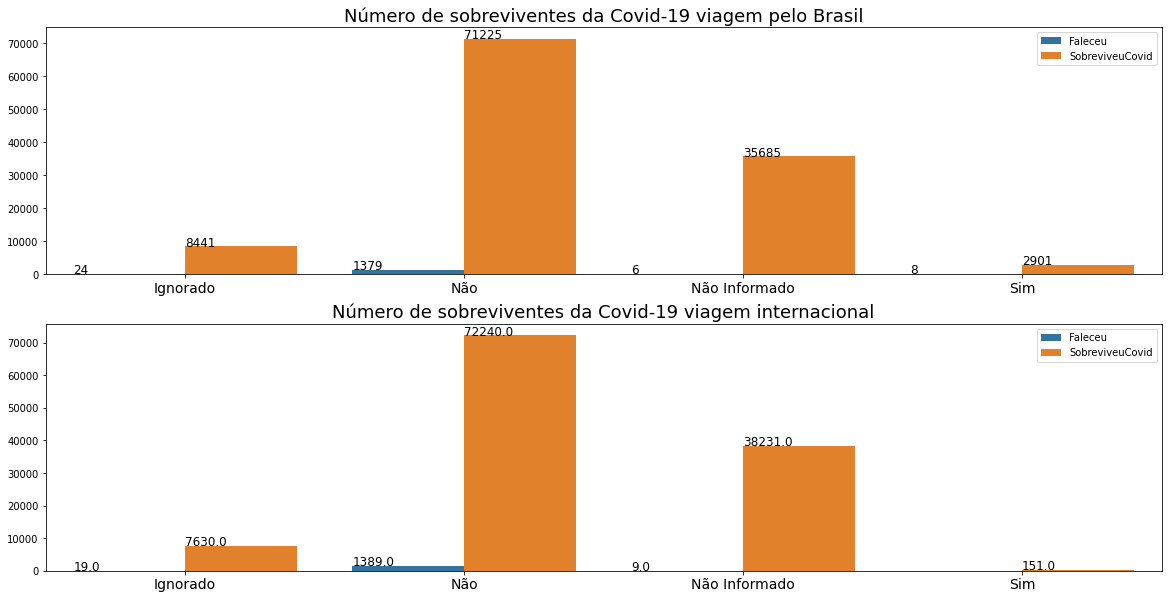

In [ ]:
fig = plt.figure(figsize=(20,10))

plt.subplot(211)
ax = sns.countplot(x = confirmados.ViagemBrasil.sort_values(ascending= True), hue = confirmados.SobreviveuCovid);
ax.legend(['Faleceu','SobreviveuCovid'])
labelplot('Número de sobreviventes da Covid-19 viagem pelo Brasil',ax, 100,0, 12)

plt.subplot(212)
ax1 = sns.countplot(x = confirmados.ViagemInternacional.sort_values(ascending= True), hue = confirmados.SobreviveuCovid);
ax1.legend(['Faleceu','SobreviveuCovid'])
labelplot('Número de sobreviventes da Covid-19 viagem internacional',ax1, 100,0, 12)


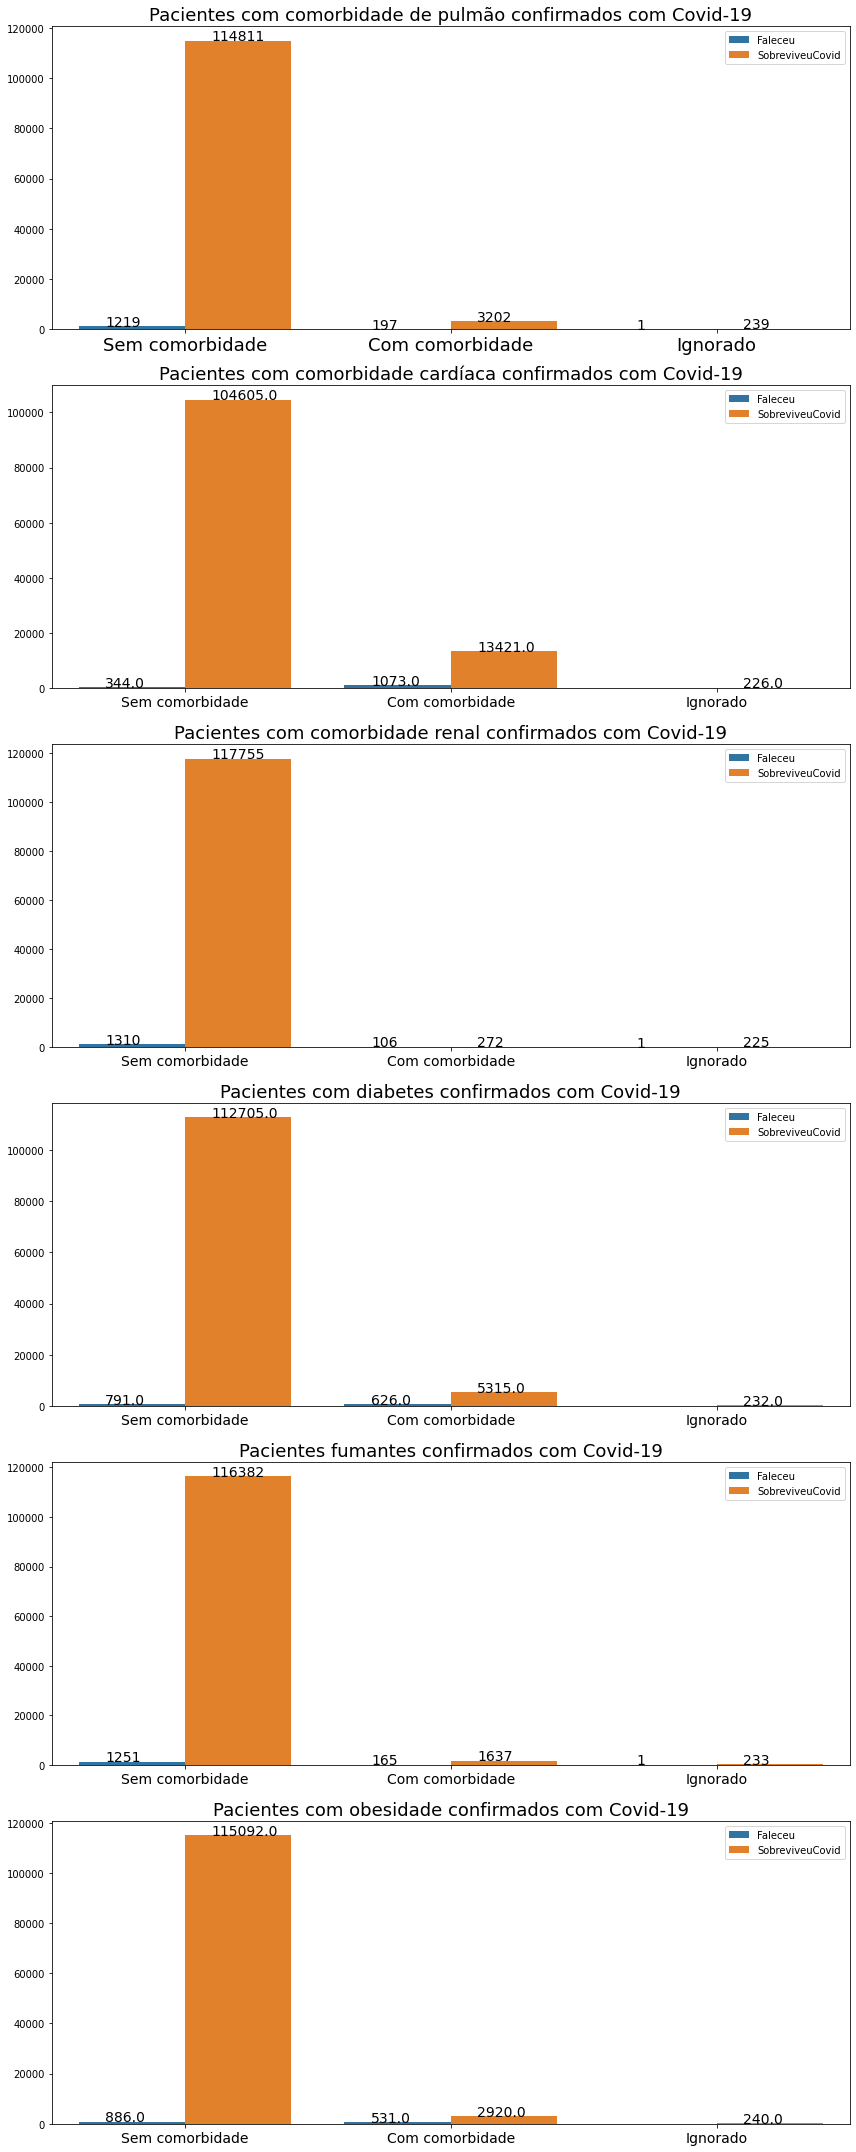

In [ ]:
fig = plt.figure(figsize=(12,30))


plt.subplot(611)
ax = sns.countplot(x = 'ComorbidadePulmao', hue = 'SobreviveuCovid', data = confirmados);
ax.set_xticklabels(['Sem comorbidade','Com comorbidade', 'Ignorado'])
ax.legend(['Faleceu','SobreviveuCovid'])
labelplot('Pacientes com comorbidade de pulmão confirmados com Covid-19',ax, 100,0.1, 14)
plt.xticks(fontsize=18)

plt.subplot(612)
ax1 = sns.countplot(x = 'ComorbidadeCardio', hue = 'SobreviveuCovid', data = confirmados);
ax1.set_xticklabels(['Sem comorbidade','Com comorbidade', 'Ignorado'])
ax1.legend(['Faleceu','SobreviveuCovid'])
labelplot('Pacientes com comorbidade cardíaca confirmados com Covid-19',ax1, 100,0.1, 14)

plt.subplot(613)
ax2 = sns.countplot(x = 'ComorbidadeRenal', hue = 'SobreviveuCovid', data = confirmados);
ax2.set_xticklabels(['Sem comorbidade','Com comorbidade', 'Ignorado'])
ax2.legend(['Faleceu','SobreviveuCovid'])
labelplot('Pacientes com comorbidade renal confirmados com Covid-19',ax2, 100,0.1, 14)

plt.subplot(614)
ax3 = sns.countplot(x = 'ComorbidadeDiabetes', hue = 'SobreviveuCovid', data = confirmados);
ax3.set_xticklabels(['Sem comorbidade','Com comorbidade', 'Ignorado'])
ax3.legend(['Faleceu','SobreviveuCovid'])
labelplot('Pacientes com diabetes confirmados com Covid-19',ax3, 100,0.1, 14)

plt.subplot(615)
ax4 = sns.countplot(x = 'ComorbidadeTabagismo', hue = 'SobreviveuCovid', data = confirmados);
ax4.set_xticklabels(['Sem comorbidade','Com comorbidade', 'Ignorado'])
ax4.legend(['Faleceu','SobreviveuCovid'])
labelplot('Pacientes fumantes confirmados com Covid-19',ax4, 100,0.1, 14)

plt.subplot(616)
ax5 = sns.countplot(x = 'ComorbidadeObesidade', hue = 'SobreviveuCovid', data = confirmados);
ax5.set_xticklabels(['Sem comorbidade','Com comorbidade', 'Ignorado'])
ax5.legend(['Faleceu','SobreviveuCovid'])
labelplot('Pacientes com obesidade confirmados com Covid-19',ax5, 100,0.1, 14)

plt.tight_layout()

fig.savefig('sobreviventes_comorbidades.png')

1.   Comorbidade mais presente em casos confirmados: cardíaca
2.   Comorbidade que mais afetou em numero de mortes: renal



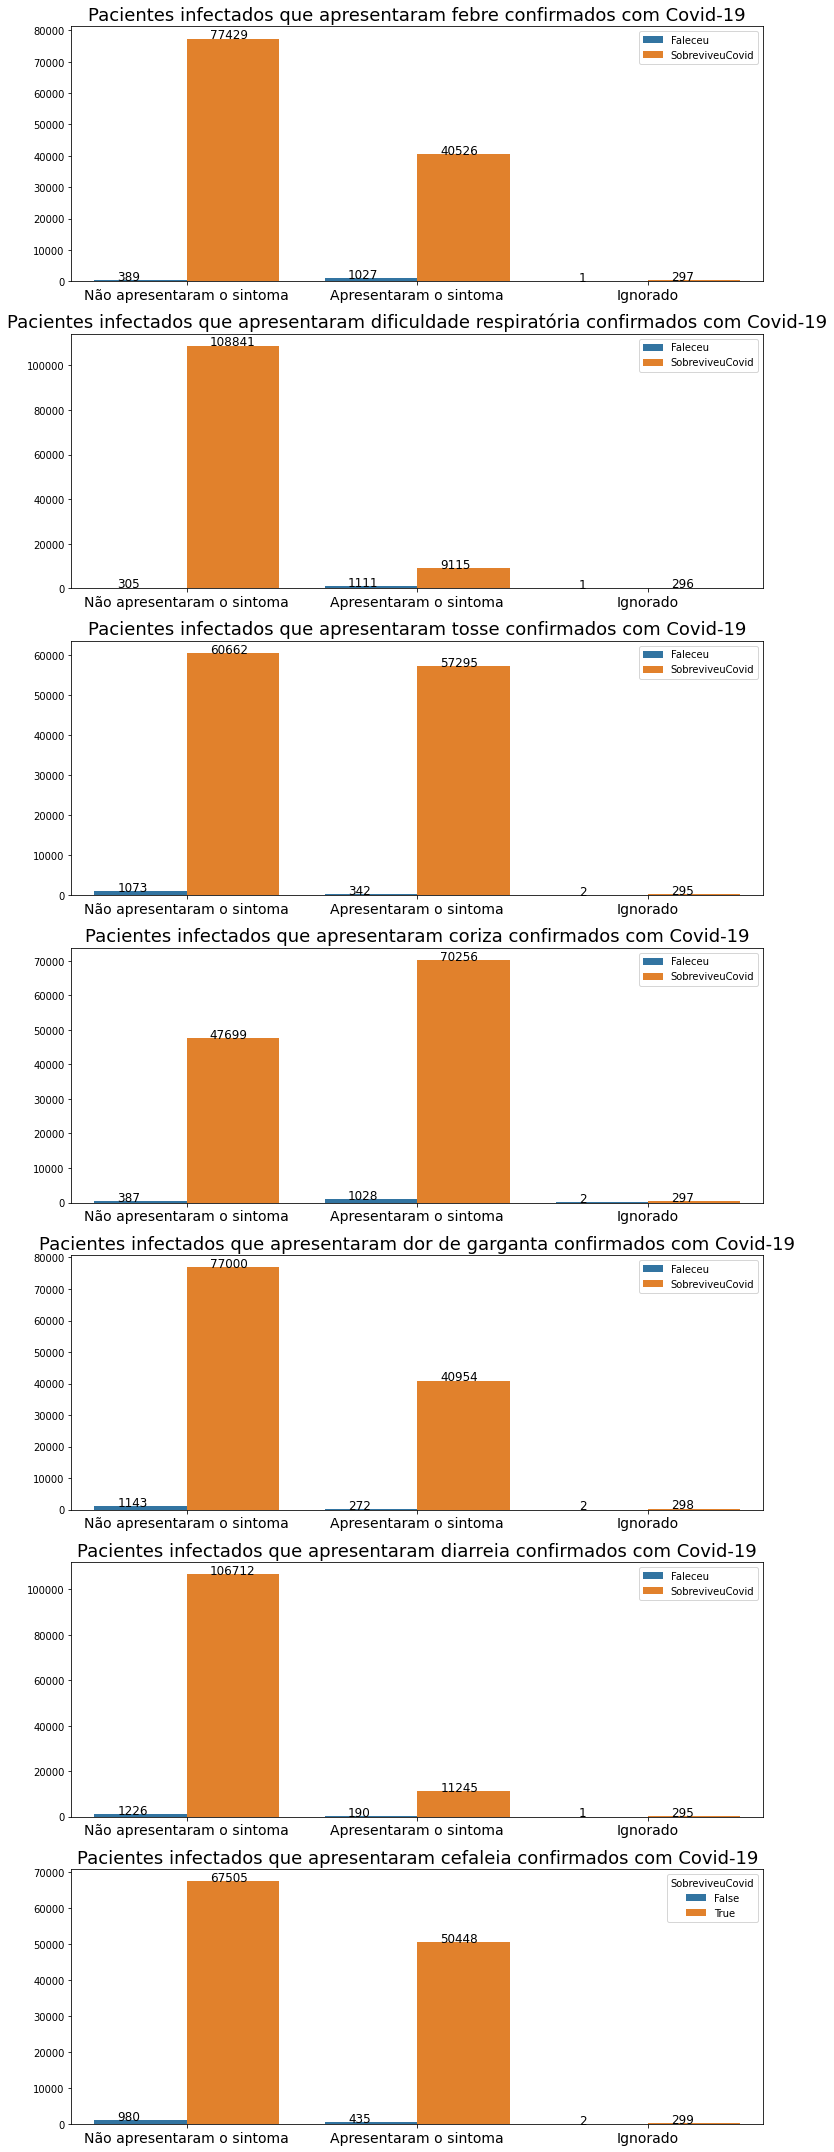

In [ ]:
fig = plt.figure(figsize=(12,30))

plt.subplot(711)
ax = sns.countplot(x = 'Febre', hue = 'SobreviveuCovid', data = confirmados);
ax.set_xticklabels(['Não apresentaram o sintoma','Apresentaram o sintoma', 'Ignorado'])
ax.legend(['Faleceu','SobreviveuCovid'])
labelplot('Pacientes infectados que apresentaram febre confirmados com Covid-19',ax, 0,0.1, 12)

plt.subplot(712)
ax1 = sns.countplot(x = 'DificuldadeRespiratoria', hue = 'SobreviveuCovid', data = confirmados);
ax1.set_xticklabels(['Não apresentaram o sintoma','Apresentaram o sintoma', 'Ignorado'])
ax1.legend(['Faleceu','SobreviveuCovid'])
labelplot('Pacientes infectados que apresentaram dificuldade respiratória confirmados com Covid-19',ax1, 0,0.1, 12)

plt.subplot(713)
ax2 = sns.countplot(x = 'Tosse', hue = 'SobreviveuCovid', data = confirmados);
ax2.set_xticklabels(['Não apresentaram o sintoma','Apresentaram o sintoma', 'Ignorado'])
ax2.legend(['Faleceu','SobreviveuCovid'])
labelplot('Pacientes infectados que apresentaram tosse confirmados com Covid-19',ax2, 0,0.1, 12)

plt.subplot(714)
ax3 = sns.countplot(x = 'Coriza', hue = 'SobreviveuCovid', data = confirmados);
ax3.set_xticklabels(['Não apresentaram o sintoma','Apresentaram o sintoma', 'Ignorado'])
ax3.legend(['Faleceu','SobreviveuCovid'])
labelplot('Pacientes infectados que apresentaram coriza confirmados com Covid-19',ax3, 0,0.1, 12)

plt.subplot(715)
ax4 = sns.countplot(x = 'DorGarganta', hue = 'SobreviveuCovid', data = confirmados);
ax4.set_xticklabels(['Não apresentaram o sintoma','Apresentaram o sintoma', 'Ignorado'])
ax4.legend(['Faleceu','SobreviveuCovid'])
labelplot('Pacientes infectados que apresentaram dor de garganta confirmados com Covid-19',ax4, 0,0.1, 12)

plt.subplot(716)
ax5 = sns.countplot(x = 'Diarreia', hue = 'SobreviveuCovid', data = confirmados);
ax5.set_xticklabels(['Não apresentaram o sintoma','Apresentaram o sintoma', 'Ignorado'])
ax5.legend(['Faleceu','SobreviveuCovid'])
labelplot('Pacientes infectados que apresentaram diarreia confirmados com Covid-19',ax5,0,0.1, 12)     

plt.subplot(717)
ax6 = sns.countplot(x = 'Cefaleia', hue = 'SobreviveuCovid', data = confirmados);
ax6.set_xticklabels(['Não apresentaram o sintoma','Apresentaram o sintoma', 'Ignorado'])
labelplot('Pacientes infectados que apresentaram cefaleia confirmados com Covid-19',ax6, 0,0.1, 12)   

plt.tight_layout()

fig.savefig('sobreviventes_sintomas.png')

1.   sintoma mais presente em casos confirmados: tosse
2.   sintoma com maior indice de mortes: dificuldade respiratória



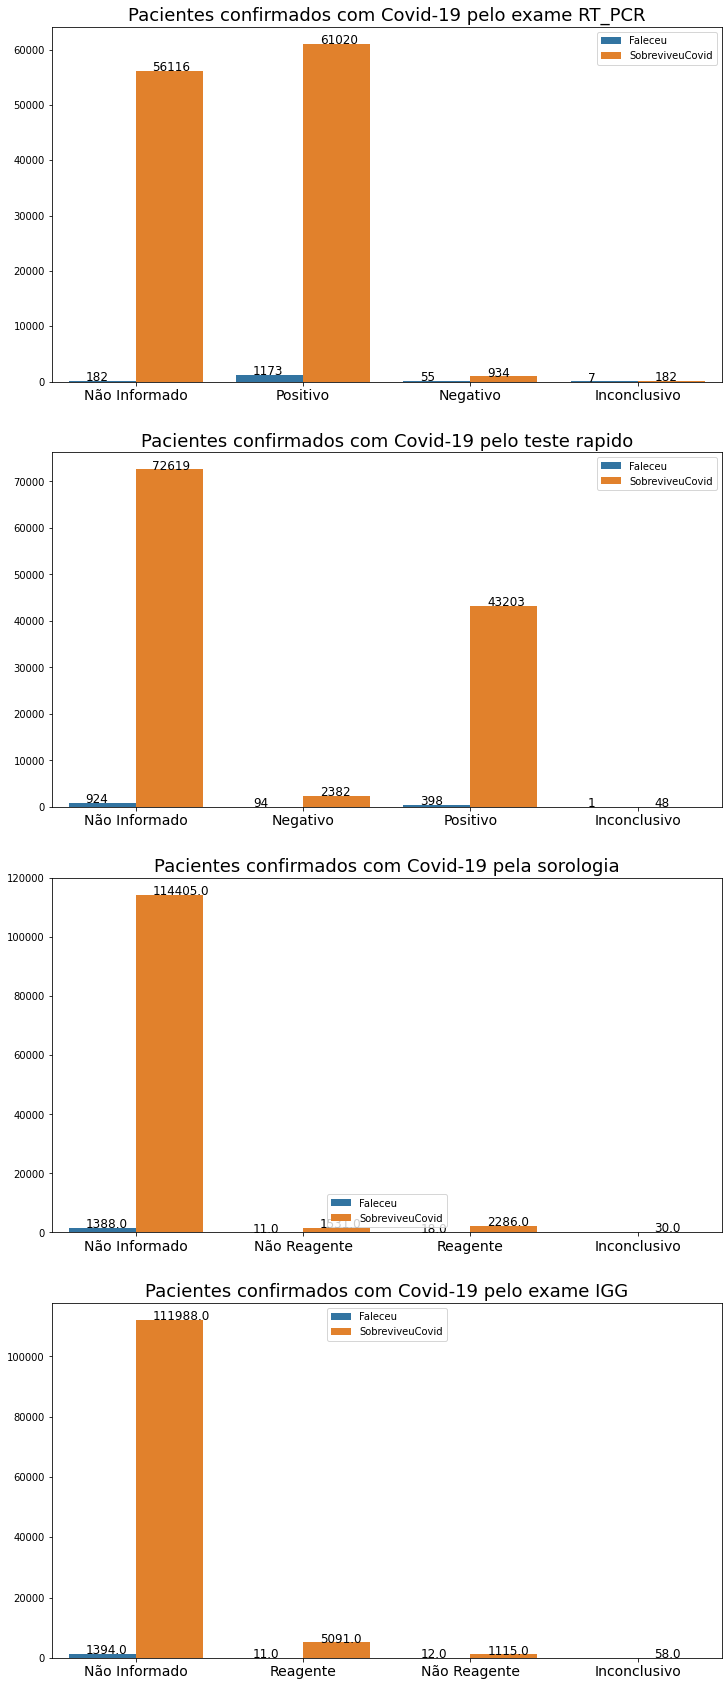

In [ ]:
fig = plt.figure(figsize=(12,30))

plt.subplot(411)
ax = sns.countplot(x = 'ResultadoRT_PCR', hue = 'SobreviveuCovid', data = confirmados.query('ResultadoRT_PCR != "N"'));
#ax.set_xticklabels(['Não apresentaram o sintoma','Apresentaram o sintoma', 'Ignorado'])
ax.legend(['Faleceu','SobreviveuCovid'])
labelplot('Pacientes confirmados com Covid-19 pelo exame RT_PCR',ax, 0,0.1, 12)

plt.subplot(412)
ax1 = sns.countplot(x = 'ResultadoTesteRapido', hue = 'SobreviveuCovid', data = confirmados.query('ResultadoTesteRapido != "N"'));
#ax1.set_xticklabels(['Não apresentaram o sintoma','Apresentaram o sintoma', 'Ignorado'])
ax1.legend(['Faleceu','SobreviveuCovid'])
labelplot('Pacientes confirmados com Covid-19 pelo teste rapido',ax1, 0,0.1, 12)

plt.subplot(413)
ax2 = sns.countplot(x = 'ResultadoSorologia', hue = 'SobreviveuCovid', data = confirmados.query('ResultadoSorologia != "N"'));
#ax2.set_xticklabels(['Não apresentaram o sintoma','Apresentaram o sintoma', 'Ignorado'])
ax2.legend(['Faleceu','SobreviveuCovid'])
labelplot('Pacientes confirmados com Covid-19 pela sorologia',ax2, 0,0.1, 12)

plt.subplot(414)
ax3 = sns.countplot(x = 'ResultadoSorologia_IGG', hue = 'SobreviveuCovid', data = confirmados.query('ResultadoSorologia_IGG != "N"'));
#ax3.set_xticklabels(['Não apresentaram o sintoma','Apresentaram o sintoma', 'Ignorado'])
ax3.legend(['Faleceu','SobreviveuCovid'])
labelplot('Pacientes confirmados com Covid-19 pelo exame IGG',ax3, 0,0.1, 12)

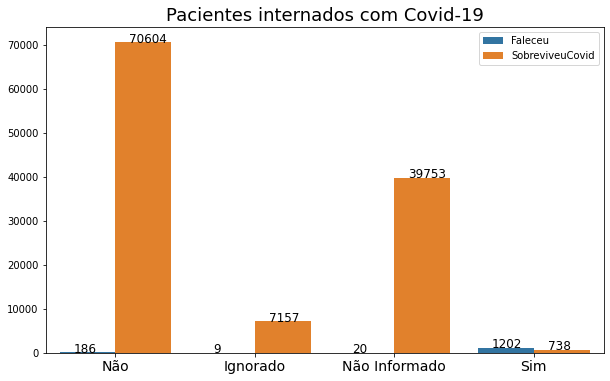

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x = 'FicouInternado', hue = 'SobreviveuCovid', data = confirmados);
labelplot('Pacientes internados com Covid-19',ax, 0,0.1, 12)
#ax.set_xticklabels(['Ignorado','Não foi internado', 'Internado'])
ax.legend(['Faleceu','SobreviveuCovid'])
fig.savefig('sobreviventes_internados.png')

Pacientes internados apresentaram alto indice de morte

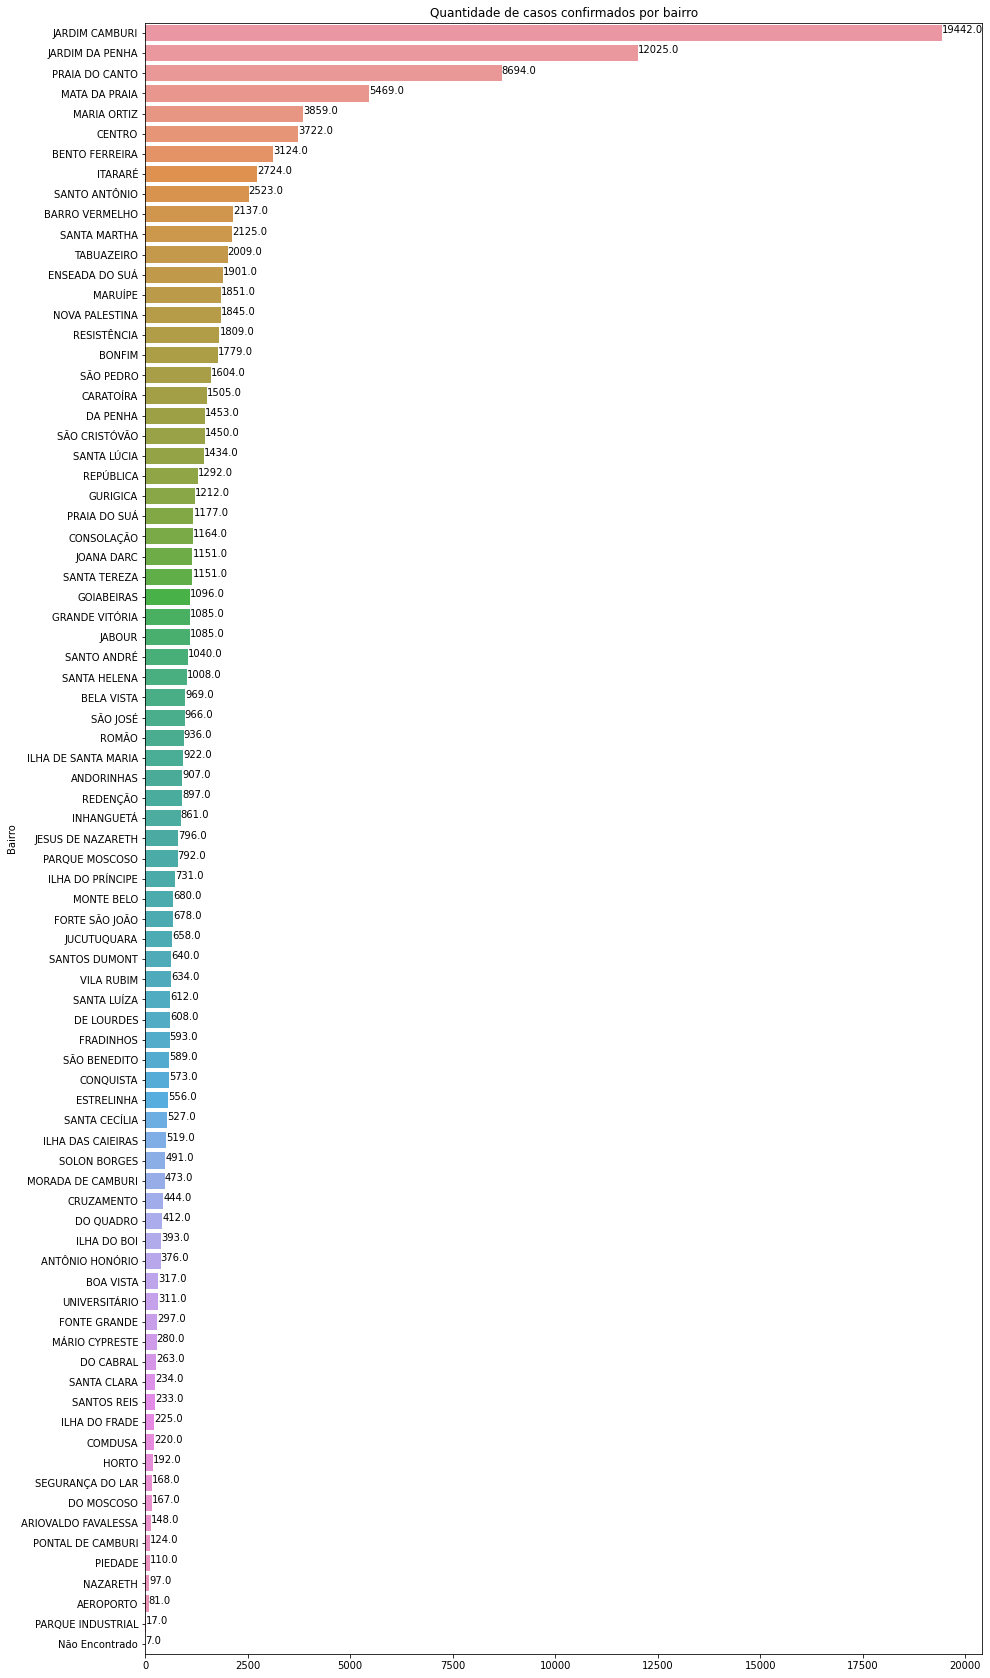

In [ ]:
confirmados_bairro = confirmados.groupby('Bairro').size().sort_values(ascending=False)

fig = plt.figure(figsize=(15,30))
ax = sns.barplot(x= confirmados_bairro.values, y = confirmados_bairro.index);
ax.set_title('Quantidade de casos confirmados por bairro')

for p in ax.patches:
  _x = p.get_x() + p.get_width() + float(0.1)
  _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
  value = (p.get_width())
  plt.annotate(value, xy = (_x,_y))

fig.savefig('casos_por_bairro.png')

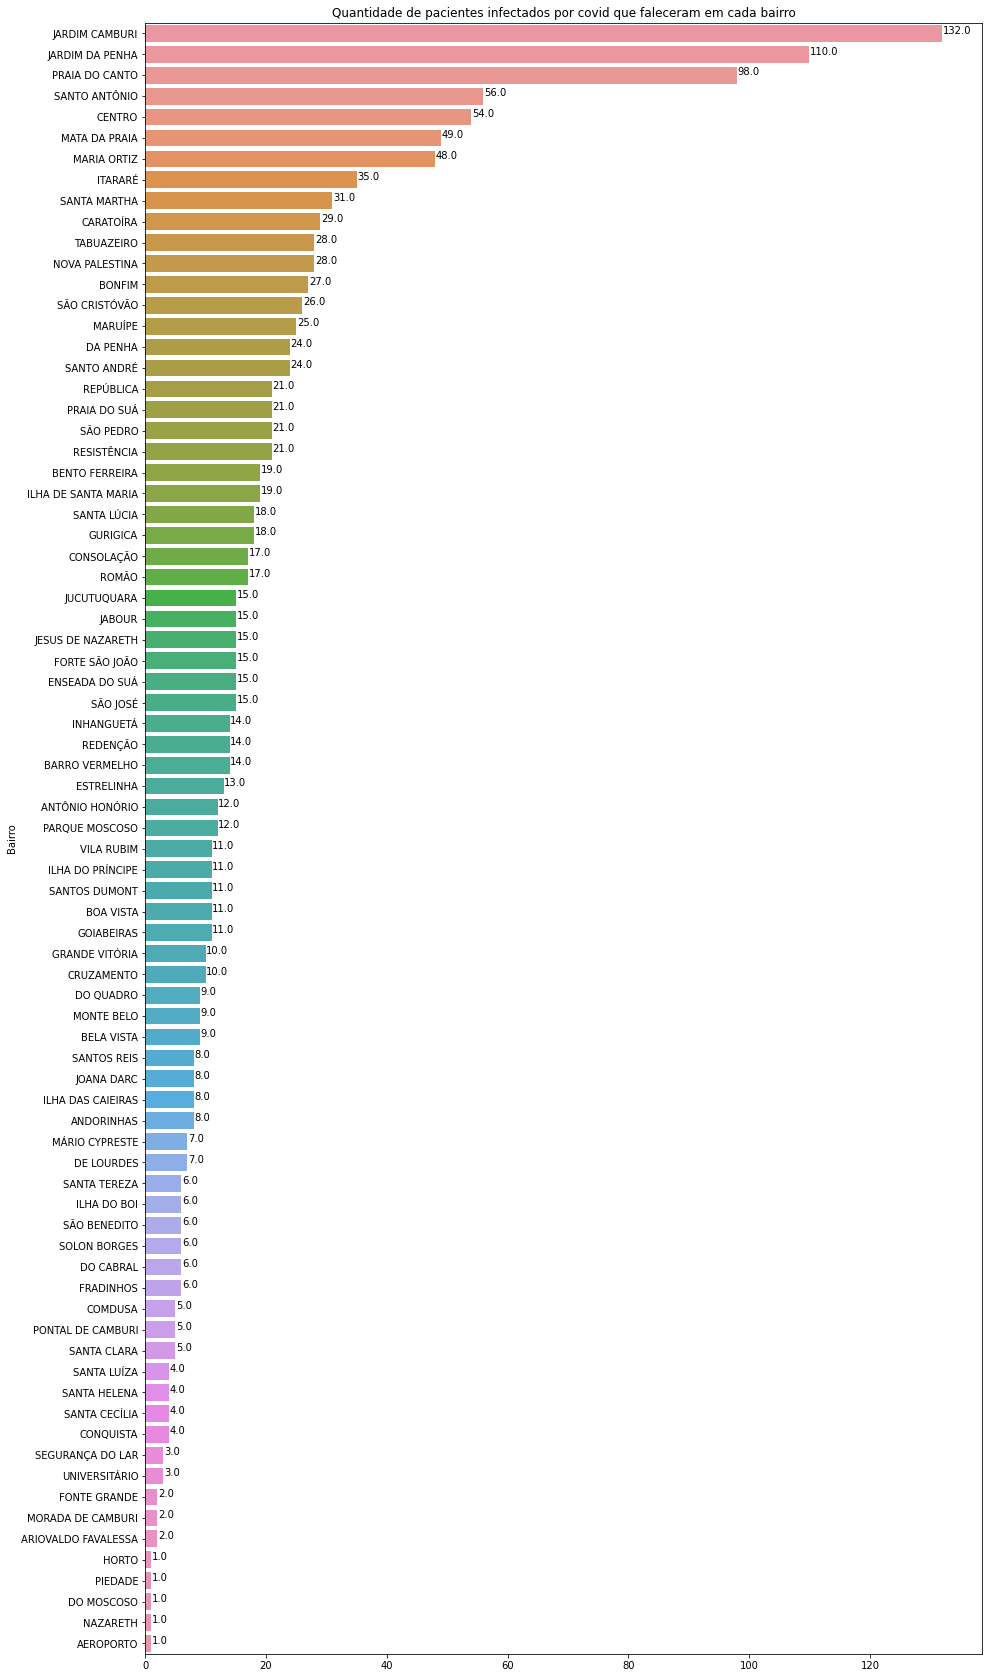

In [ ]:
mortes_por_bairro = confirmados.query('SobreviveuCovid == 0').groupby('Bairro').size().sort_values(ascending=False)
fig = plt.figure(figsize=(15,30))
ax = sns.barplot(x= mortes_por_bairro.values, y = mortes_por_bairro.index);
ax.set_title('Quantidade de pacientes infectados por covid que faleceram em cada bairro')

for p in ax.patches:
  _x = p.get_x() + p.get_width() + float(0.1)
  _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
  value = (p.get_width())
  plt.annotate(value, xy = (_x,_y))

fig.savefig('mortes_por_bairro.png')

Jardim camburi foi o bairro com maior indice de pacientes confirmados e casos de óbito

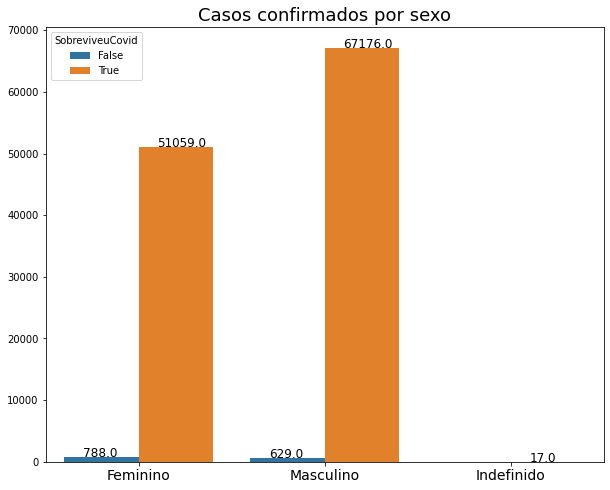

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = sns.countplot(x = confirmados.Sexo, hue= confirmados.SobreviveuCovid)
ax.set_xticklabels(['Feminino','Masculino','Indefinido'])
labelplot('Casos confirmados por sexo',ax,0,0.1,12)

fig.savefig('confirmados_sexo.png')

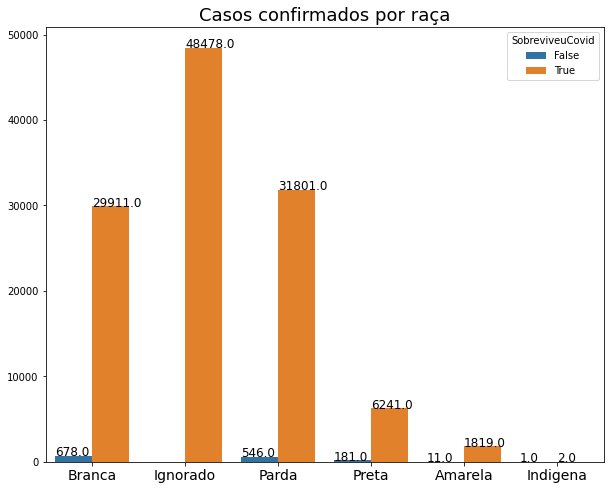

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = sns.countplot(x = confirmados.RacaCor, hue= confirmados.SobreviveuCovid)
labelplot('Casos confirmados por raça',ax,0,0,12)

fig.savefig('confirmados_raca.png')

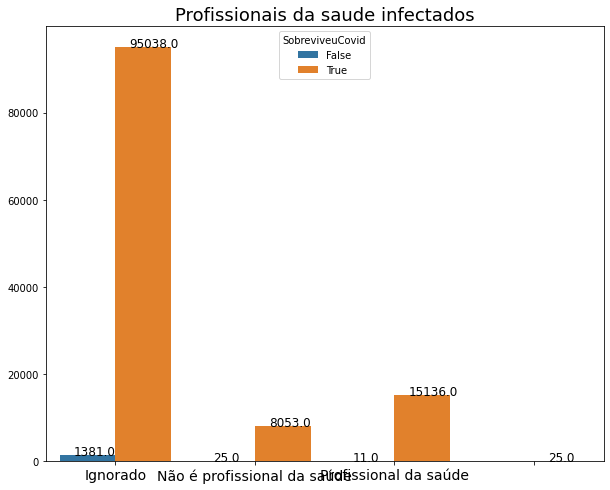

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = sns.countplot(x = confirmados.ProfissionalSaude, hue= confirmados.SobreviveuCovid)
labelplot('Profissionais da saude infectados',ax,0,0.1,12)
ax.set_xticklabels(['Ignorado','Não é profissional da saúde','Profissional da saúde'])

fig.savefig('confirmados_profissionais_saude.png')

In [ ]:
df_data = df.groupby('DataDiagnostico').size()
df_data = pd.DataFrame(df_data)

figura = px.line(title='Casos confirmados')

for i in df_data:
 figura.add_scatter(x=df_data.index, y = df_data[i], name=i)

figura.show()

In [ ]:
df_data_obito = df.groupby('DataObito').size()
df_data_obito = pd.DataFrame(df_data_obito)

figura = px.line(title='Óbitos')

for i in df_data:
 figura.add_scatter(x=df_data_obito.index, y = df_data_obito[i], name=i)

figura.show()

In [ ]:
df_data_obito_cum = df_train.groupby('DataObito').size().cumsum()
df_data_obito_cum = pd.DataFrame(df_data_obito_cum)

figura = px.line(title='Óbitos')

for i in df_data:
 figura.add_scatter(x=df_data_obito_cum.index, y = df_data_obito_cum[i], name=i)

figura.show()

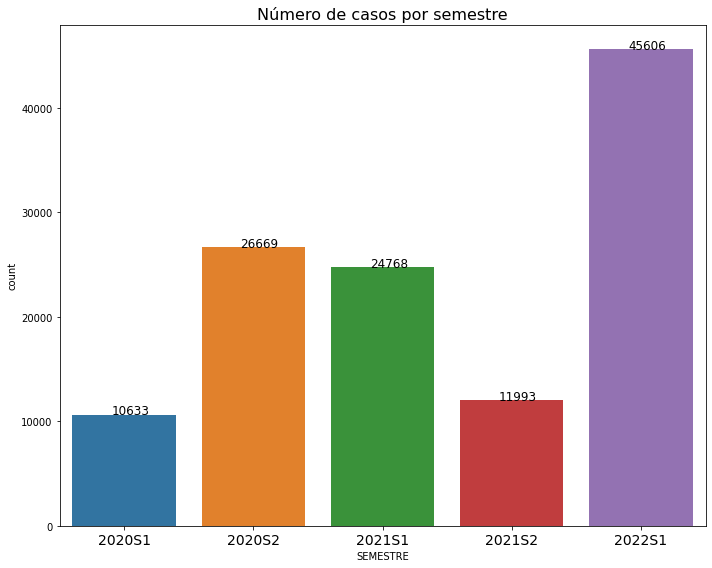

In [ ]:
fig = plt.figure(figsize=(10,8))
x= confirmados.SEMESTRE.sort_values(ascending=True)
ax = sns.countplot(x = x)

for p in ax.patches:
  plt.annotate(p.get_height(), xy=(p.get_x()+0.3,p.get_height()), fontsize=12)

plt.title('Número de casos por semestre', fontsize=16)
plt.xticks(fontsize=14)
plt.tight_layout()
ax=ax

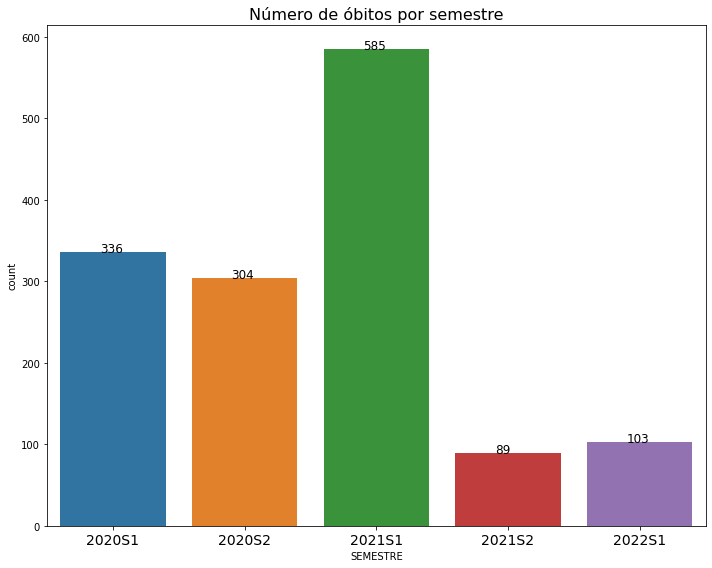

In [ ]:
fig = plt.figure(figsize=(10,8))
x= confirmados.query('SobreviveuCovid == 0').SEMESTRE.sort_values(ascending=True)
ax = sns.countplot(x = x)

for p in ax.patches:
  plt.annotate(p.get_height(), xy=(p.get_x()+0.3,p.get_height()), fontsize=12)

plt.title('Número de óbitos por semestre', fontsize=16)
plt.xticks(fontsize=14)
plt.tight_layout()
ax=ax

# Readequando os outros datasets

In [ ]:
boolean = {'-':'Ignorado'}

comorbidades_sintomas = ['Febre','DificuldadeRespiratoria','Tosse','Coriza','DorGarganta','Diarreia','Cefaleia','ComorbidadePulmao',
                         'ComorbidadeCardio','ComorbidadeRenal','ComorbidadeDiabetes','ComorbidadeTabagismo','ComorbidadeObesidade']

for i in comorbidades_sintomas:
  df_test[i].replace(boolean, inplace = True)
  df_validacao[i].replace(boolean, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
valores_inconsistentes = ['TipoTesteRapido',  'ResultadoSorologia_IGG', 'ResultadoSorologia', 'ProfissionalSaude', 'ViagemInternacional', 'ViagemBrasil', 'FicouInternado' ]

boolean = {'Não Informado':'Ignorado'}

for i in valores_inconsistentes:
  df_test[i].replace(boolean, inplace = True)
  df_validacao[i].replace(boolean, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_test.drop(columns=['DataColetaSorologiaIGG','DataColetaSorologia','DataColetaTesteRapido','DataColeta_RT_PCR',
                        'DataEncerramento','Evolucao','Escolaridade', 'Municipio', 'IdadeNaDataNotificacao'], inplace=True)

df_validacao.drop(columns=['DataColetaSorologiaIGG','DataColetaSorologia','DataColetaTesteRapido','DataColeta_RT_PCR',
                        'DataEncerramento','Evolucao','Escolaridade', 'Municipio', 'IdadeNaDataNotificacao'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_train.shape

(73219, 38)

In [ ]:
df_test.shape

(14184, 38)

In [ ]:
df_validacao.shape

(31422, 38)

# LABEL ENCODER

In [ ]:
df_total = pd.concat([df_train, df_validacao, df_test])

In [ ]:
#df_encoder = df_train.drop(columns=['DataNotificacao','DataCadastro','DataDiagnostico','DataObito'])
#df_validacao_encoder = df_validacao.drop(columns=['DataNotificacao','DataCadastro','DataDiagnostico','DataObito'])
#df_test_encoder = df_test.drop(columns=['DataNotificacao','DataCadastro','DataDiagnostico','DataObito'])
df_total = df_total.drop(columns=['DataNotificacao','DataCadastro','DataDiagnostico','DataObito'])
df_total

CriterioConfirmacao StatusNotificacao          Bairro      FaixaEtaria  \
43                 Clinico         Encerrado          CENTRO     20 a 29 anos   
44                 Clinico         Encerrado        SÃO JOSÉ     70 a 79 anos   
45                 Clinico         Encerrado          BONFIM     60 a 69 anos   
46                 Clinico         Encerrado  JARDIM CAMBURI     20 a 29 anos   
47                 Clinico         Encerrado   SANTO ANTÔNIO     30 a 39 anos   
...                    ...               ...             ...              ...   
120755        Laboratorial         Encerrado  JARDIM CAMBURI     80 a 89 anos   
120756        Laboratorial         Encerrado      DE LOURDES  90 anos ou mais   
120757        Laboratorial         Encerrado      TABUAZEIRO     60 a 69 anos   
121055        Laboratorial         Encerrado  JARDIM CAMBURI  90 anos ou mais   
121056        Laboratorial         Encerrado  JARDIM CAMBURI  90 anos ou mais   

       Sexo   RacaCor       Gestante Febre DificuldadeRespiratoria Tosse  ...  \
43        F  Ignorado            Não   Sim                     Não   Sim  ...   
44        F     Parda            Não   Sim                     Não   Sim  ...   
45        F     Preta            Não   Não                     Sim   Sim  ...   
46        M    Branca  Não se aplica   Não                     Não   Sim  ...   
47        F     Parda            Não   Sim                     Não   Sim  ...   
...     ...       ...            ...   ...                     ...   ...  ...   
120755    F    Branca            Não   Sim                     Sim   Sim  ...   
120756    F    Branca            Não   Sim                     Sim   Sim  ...   
120757    F     Preta            Não   Não                     Não   Sim  ...   
121055    M    Branca  Não se aplica   Sim                     Sim   Sim  ...   
121056    M    Branca  Não se aplica   Sim                     Sim   Sim  ...   

       PossuiDeficiencia MoradorDeRua ResultadoRT_PCR ResultadoTesteRapido  \
43                   Não          Não   Não Informado        Não Informado   
44                   Não          Não   Não Informado        Não Informado   
45                   Não          Não   Não Informado        Não Informado   
46                   Não          Não   Não Informado        Não Informado   
47                   Não          Não   Não Informado        Não Informado   
...                  ...          ...             ...                  ...   
120755               Não          Não        Positivo        Não Informado   
120756               Não          Não        Positivo        Não Informado   
120757               Não          Não        Positivo        Não Informado   
121055               Não          Não        Positivo        Não Informado   
121056               Não          Não        Positivo        Não Informado   

       ResultadoSorologia ResultadoSorologia_IGG TipoTesteRapido  \
43               Ignorado               Ignorado        Ignorado   
44               Ignorado               Ignorado        Ignorado   
45               Ignorado               Ignorado        Ignorado   
46               Ignorado               Ignorado        Ignorado   
47               Ignorado               Ignorado        Ignorado   
...                   ...                    ...             ...   
120755           Ignorado               Ignorado        Ignorado   
120756           Ignorado               Ignorado        Ignorado   
120757           Ignorado               Ignorado        Ignorado   
121055           Ignorado               Ignorado        Ignorado   
121056           Ignorado               Ignorado        Ignorado   

       SobreviveuCovid SEMESTRE      MES  
43                True   2021S2  2021M12  
44                True   2021S2   2021M9  
45                True   2021S1   2021M1  
46                True   2020S2  2020M12  
47                True   2020S2  2020M11  
...                ...      ...      ...  
120755

In [ ]:
classes_cod = []
for i in df_total.columns:
  le = LabelEncoder()
  df_total[i] = le.fit_transform(df_total[i]) 
  classe = dict(zip(le.classes_, range(len(le.classes_))))
  classes_cod.append(classe)
  print(i)
  print(classe)
  print()

CriterioConfirmacao
{'-': 0, 'Clinico': 1, 'Clinico Epdemiologico': 2, 'Laboratorial': 3}

StatusNotificacao
{'Em Aberto': 0, 'Encerrado': 1}

Bairro
{'AEROPORTO': 0, 'ANDORINHAS': 1, 'ANTÔNIO HONÓRIO': 2, 'ARIOVALDO FAVALESSA': 3, 'BARRO VERMELHO': 4, 'BELA VISTA': 5, 'BENTO FERREIRA': 6, 'BOA VISTA': 7, 'BONFIM': 8, 'CARATOÍRA': 9, 'CENTRO': 10, 'COMDUSA': 11, 'CONQUISTA': 12, 'CONSOLAÇÃO': 13, 'CRUZAMENTO': 14, 'DA PENHA': 15, 'DE LOURDES': 16, 'DO CABRAL': 17, 'DO MOSCOSO': 18, 'DO QUADRO': 19, 'ENSEADA DO SUÁ': 20, 'ESTRELINHA': 21, 'FONTE GRANDE': 22, 'FORTE SÃO JOÃO': 23, 'FRADINHOS': 24, 'GOIABEIRAS': 25, 'GRANDE VITÓRIA': 26, 'GURIGICA': 27, 'HORTO': 28, 'ILHA DAS CAIEIRAS': 29, 'ILHA DE SANTA MARIA': 30, 'ILHA DO BOI': 31, 'ILHA DO FRADE': 32, 'ILHA DO PRÍNCIPE': 33, 'INHANGUETÁ': 34, 'ITARARÉ': 35, 'JABOUR': 36, 'JARDIM CAMBURI': 37, 'JARDIM DA PENHA': 38, 'JESUS DE NAZARETH': 39, 'JOANA DARC': 40, 'JUCUTUQUARA': 41, 'MARIA ORTIZ': 42, 'MARUÍPE': 43, 'MATA DA PRAIA': 44, 'MO

In [ ]:
df_encoder = df_total.query('SEMESTRE == 0 or SEMESTRE == 1 or SEMESTRE == 2 or SEMESTRE == 3')
df_validacao_encoder = df_total.query('MES == 22')
df_test_encoder = df_total.query('MES ==23 or MES ==24 or MES ==25 or MES ==26 or MES ==27')

In [ ]:
df_encoder.shape

(73219, 34)

In [ ]:
df_validacao_encoder.shape

(31422, 34)

In [ ]:
df_test_encoder.shape

(14184, 34)

In [ ]:
# Como todos os dados futuros estarão 'Em aberto' a coluna Status Notificacao será retirada dos conjuntos de daddos

df_encoder.drop(columns=['StatusNotificacao'], inplace=True)

df_test_encoder.drop(columns=['StatusNotificacao'], inplace=True)

df_validacao_encoder.drop(columns=['StatusNotificacao'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_encoder.shape

(73219, 33)

In [ ]:
df_test_encoder.shape

(14184, 33)

In [ ]:
df_test.shape[0]/(df_test.shape[0]+df_train.shape[0])*100

16.22827591730261

# Correlacao

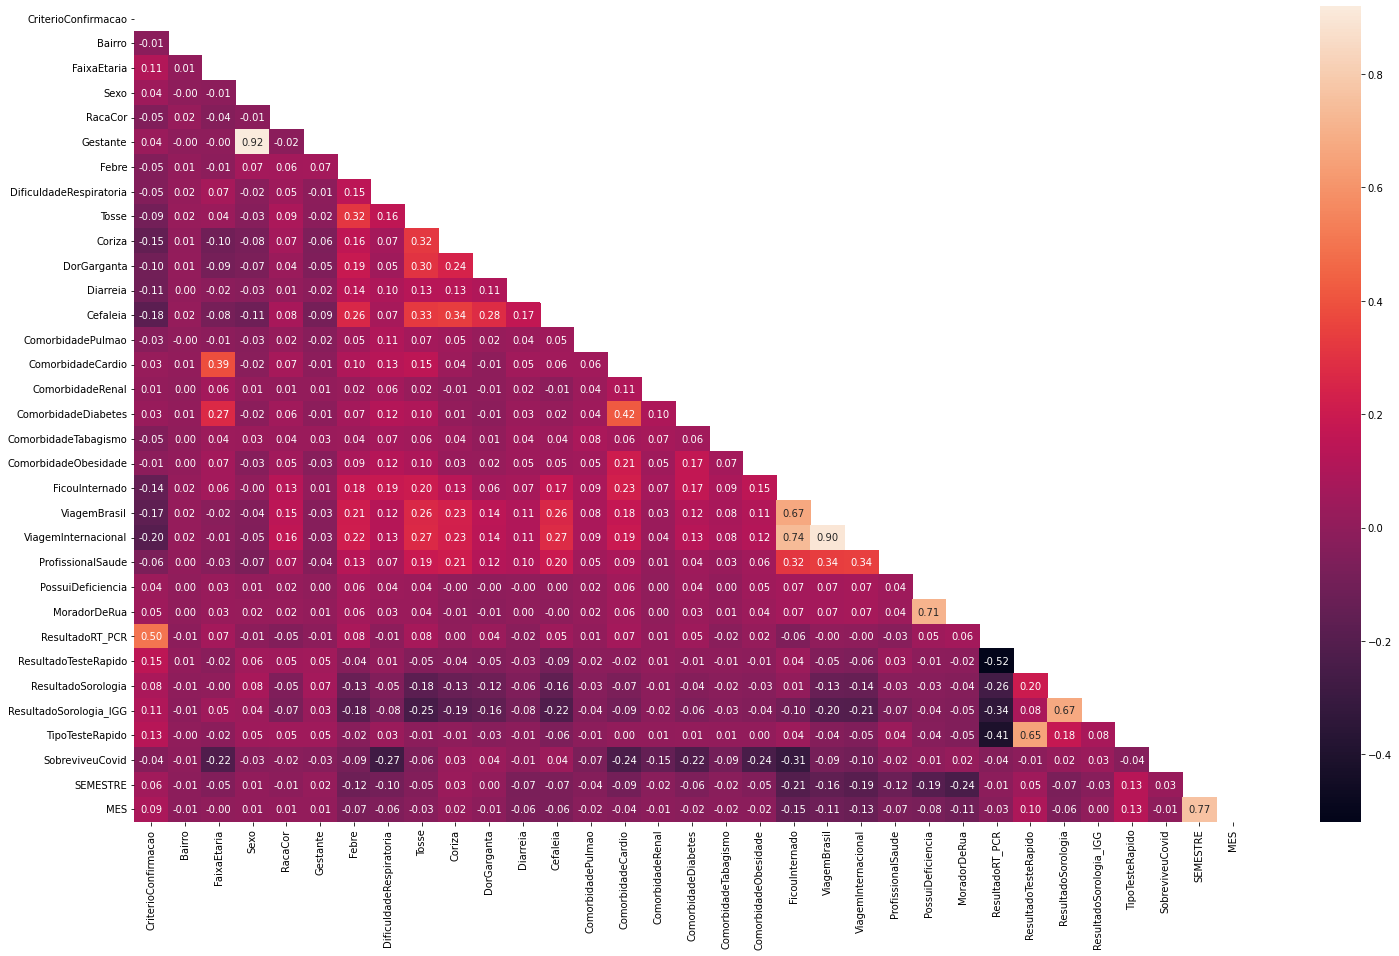

In [ ]:
fig = plt.figure(figsize=(25,15))
correlacao = df_encoder.corr()
mask = np.triu(np.ones_like(correlacao, dtype=bool))
ax = sns.heatmap(correlacao, annot=True, fmt= '.2f', mask=mask);

In [ ]:
''' correlacoes altas
Gestante -> Sexo
Viagem Brasil -> Viagem Internacional
Semestre -> Mes
Resultado teste rapido -> tipo teste rapido
Resultado Sorologia -> Resultado sorologia IGG
Possui Deficiencia -> Morador de Rua
Ficou internado -> Viagem Brasil, Viagem Internacional
'''

' correlacoes altas\nGestante -> Sexo\nViagem Brasil -> Viagem Internacional\nSemestre -> Mes\nResultado teste rapido -> tipo teste rapido\nResultado Sorologia -> Resultado sorologia IGG\nPossui Deficiencia -> Morador de Rua\nFicou internado -> Viagem Brasil, Viagem Internacional\n'

In [ ]:
#por apresentar correlação forte nos dados de treino

df_encoder.drop(columns=['ViagemBrasil','Gestante','MES','TipoTesteRapido','MoradorDeRua'], inplace=True)

df_test_encoder.drop(columns=['ViagemBrasil','Gestante','MES','TipoTesteRapido','MoradorDeRua'], inplace=True)

df_validacao_encoder.drop(columns=['ViagemBrasil','Gestante','MES','TipoTesteRapido','MoradorDeRua'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#Maior partes do resultados de exames ignorados, temos o criterio de confirmacao
df_encoder.drop(columns=['ResultadoSorologia','ResultadoSorologia_IGG','ResultadoTesteRapido','ResultadoRT_PCR'], inplace = True)
df_test_encoder.drop(columns=['ResultadoSorologia','ResultadoSorologia_IGG','ResultadoTesteRapido','ResultadoRT_PCR'], inplace = True)
df_validacao_encoder.drop(columns=['ResultadoSorologia','ResultadoSorologia_IGG','ResultadoTesteRapido','ResultadoRT_PCR'], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_encoder.drop(columns=['Bairro'], inplace = True)
df_test_encoder.drop(columns=['Bairro'], inplace = True)
df_validacao_encoder.drop(columns=['Bairro'], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# APRENDIZADO DE MAQUINA

In [ ]:
modelos = []

X_train = df_encoder.drop(columns=['SobreviveuCovid'])
X_validacao = df_validacao_encoder.drop(columns=['SobreviveuCovid'])
X_test  = df_test_encoder.drop(columns=['SobreviveuCovid'])

y_train = df_encoder.SobreviveuCovid
y_validacao = df_validacao_encoder.SobreviveuCovid
y_test  = df_test_encoder.SobreviveuCovid

In [ ]:
print(f'Amostra de treino : {X_train.shape}')

Amostra de treino : (73219, 22)


In [ ]:
print(f'Amostra de treino : {X_validacao.shape}')

Amostra de treino : (31422, 22)


In [ ]:
print(f'Amostra de teste : {X_test.shape}')

Amostra de teste : (14184, 22)


In [ ]:
print(f'Taxa de mortalidade no dataset de treino {y_train.value_counts()[0]/(y_train.value_counts().sum())*100}%')

Taxa de mortalidade no dataset de treino 1.7918846201122658%


In [ ]:
print(f'Taxa de mortalidade no dataset de validação {y_validacao.value_counts()[0]/(y_validacao.value_counts().sum())*100}%')

Taxa de mortalidade no dataset de validação 0.2164088854942397%


In [ ]:
print(f'Taxa de mortalidade no dataset de teste {y_test.value_counts()[0]/(y_test.value_counts().sum())*100}%')

Taxa de mortalidade no dataset de teste 0.24675690919345744%


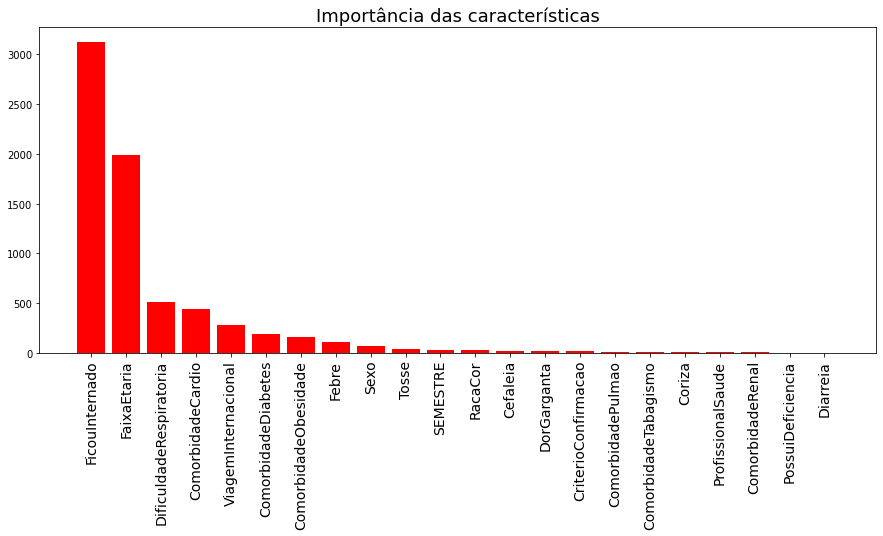

In [ ]:
k_melhores = SelectKBest(score_func=chi2,k=22)
kbest = k_melhores.fit_transform(X_train, y_train)
indices = np.argsort(k_melhores.scores_)[::-1]


features = []
for i in range(22):
    features.append(X_train.columns[indices[i]])
plt.figure(figsize=(15,6))
plt.bar(features, k_melhores.scores_[indices[range(22)]], color='r', align='center')
plt.title('Importância das características',fontsize=18)
plt.xticks(rotation=90, fontsize=14)
plt.show()


#cols = k_melhores.get_support(indices=True)
#features_df_new = X_train.iloc[:,cols]
#print(indices)

In [ ]:
df_encoder.drop(columns=['Diarreia','PossuiDeficiencia'], inplace = True)
df_test_encoder.drop(columns=['Diarreia','PossuiDeficiencia'], inplace = True)
df_validacao_encoder.drop(columns=['Diarreia','PossuiDeficiencia'], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
modelos = []

X_train = df_encoder.drop(columns=['SobreviveuCovid'])
X_validacao = df_validacao_encoder.drop(columns=['SobreviveuCovid'])
X_test  = df_test_encoder.drop(columns=['SobreviveuCovid'])

y_train = df_encoder.SobreviveuCovid
y_validacao = df_validacao_encoder.SobreviveuCovid
y_test  = df_test_encoder.SobreviveuCovid

# Função AM

In [ ]:
def AM(nome, modelo, X_treino, y_treino, X_teste, y_teste):
  np.random.seed(100)
  modelos = []
  model  = modelo
  model.fit(X_treino, y_treino)
  y_pred = model.predict(X_teste)

  acuracia = accuracy_score(y_teste, y_pred,)
  roc_auc = roc_auc_score(y_teste, y_pred,  average='macro')
  recall = recall_score(y_teste, y_pred)
  precision = precision_score(y_teste, y_pred, average='macro')
  f1 = f1_score(y_teste, y_pred, average='macro')
  print(f'Acuracia: {round(acuracia*100,2)}%')
  print(f'ROC_AUC: {round(roc_auc*100,2)}%')
  print(f'Recall {round(recall*100,2)}%')
  print(f'Precision {round(precision*100,2)}%')
  print(f'F1-score: {round(f1*100,2)}%')
  print(classification_report(y_teste, y_pred))

  cm = confusion_matrix(y_teste, y_pred, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=['Óbito','Sobreviveu'])
  disp.plot()

  y_pred_proba = modelo.predict_proba(X_teste)[::,1]
  fpr, tpr, _ = roc_curve(y_teste, y_pred_proba)
  auc = roc_auc_score(y_teste, y_pred_proba)

  plt.figure(figsize=(7,5))
  plt.plot(fpr,tpr)
  plt.title(f"{nome}, AUC= {auc}")
  plt.plot([0,1],[0,1], color='red', lw=2, linestyle='--')

  plt.show()
  return [f'{nome}', acuracia*100, roc_auc*100, recall*100, precision*100, f1*100]

# X e y (validacao+treino)

In [ ]:
X = pd.concat([X_train, X_validacao])
y = pd.concat([y_train, y_validacao])

# Definindo undersampling

In [ ]:
np.random.seed(100)

rus = RandomUnderSampler(replacement=True)

X_rus_hiperparametros, y_rus_hiperparametros = rus.fit_resample(X_train, y_train) #para obtenção dos hiperparametros
X_under_resampled, y_under_resampled = rus.fit_resample(X, y)

# Definindo SMOTE

In [ ]:
np.random.seed(100)

smote = SMOTE()

X_smote_hiperparametros, y_smote_hiperparametros = smote.fit_resample(X_train,y_train)#para obtenção dos hiperparametros
X_smote_resampled, y_smote_resampled = smote.fit_resample(X,y)

# Modelos para o gridsearchCV

In [ ]:
#todos modelos
finais_hiperparametros = []

# Undersampling validacao de modelos

In [ ]:
undersampling = []

# Cross-validation

In [ ]:
x_kf = pd.concat([X_under_resampled, X_test])
y_kf = pd.concat([y_under_resampled, y_test])

x_skf = pd.concat([X_smote_resampled, X_test])
y_skf = pd.concat([y_smote_resampled, y_test])

In [ ]:
def kf_score(modelo, x, y):
  np.random.seed(100)
  kf = StratifiedKFold(n_splits=5)
  results = cross_val_score(modelo, x, y, scoring='roc_auc', cv=kf)
  
  media = results.mean()
  desvio_padrao = results.std()

  print(modelo.__class__.__name__)
  print('-'*10)
  print(results)
  print('-'*10)
  print(f'ROC_AUC médio 5 folds: {round(media,4)*100}')
  print(f'Desvio padrão: {desvio_padrao}')
  print(f'Intervalo ROC_AUC: [{round(media-desvio_padrao,4)*100},{round(media+desvio_padrao,4)*100}]')

# Arvore de decisao undersampling + gridsearchCV

         i   roc_auc        f1
0     gini  0.922342  0.563778
1  entropy  0.919757  0.602574
         i   roc_auc        f1
1  entropy  0.919757  0.602574
0     gini  0.922342  0.563778


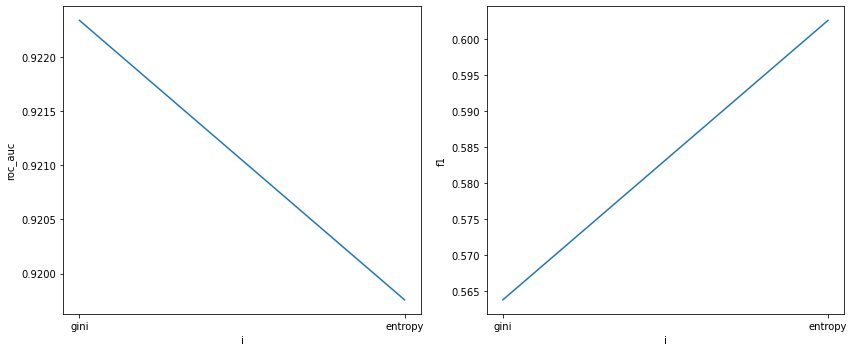

In [ ]:
plt.figure(figsize=(12,5))
criterio = []
cr = ['gini','entropy']
np.random.seed(100)
for i in cr:
  arvore  = DecisionTreeClassifier(criterion=i)
  arvore.fit(X_rus_hiperparametros, y_rus_hiperparametros)
  y_pred = arvore.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 =        f1_score(y_validacao, y_pred, average='macro')

  criterio.append([i, roc_auc, f1])

criterio = pd.DataFrame(criterio, columns=['i','roc_auc','f1'])
print(criterio.sort_values('roc_auc', ascending=False).head(5))
print(criterio.sort_values('f1', ascending=False).head(5))

plt.subplot(1,2,1)
sns.lineplot(x='i', y='roc_auc', data=criterio)
plt.subplot(1,2,2)
sns.lineplot(x='i', y='f1', data=criterio)
plt.tight_layout()

   i   roc_auc        f1
8  9  0.950813  0.562901
3  4  0.942903  0.534391
2  3  0.938741  0.525198
4  5  0.934737  0.531733
7  8  0.931832  0.579253
     i   roc_auc        f1
0    1  0.800785  0.769179
7    8  0.931832  0.579253
5    6  0.931608  0.577524
10  11  0.923617  0.571696
11  12  0.930380  0.569013


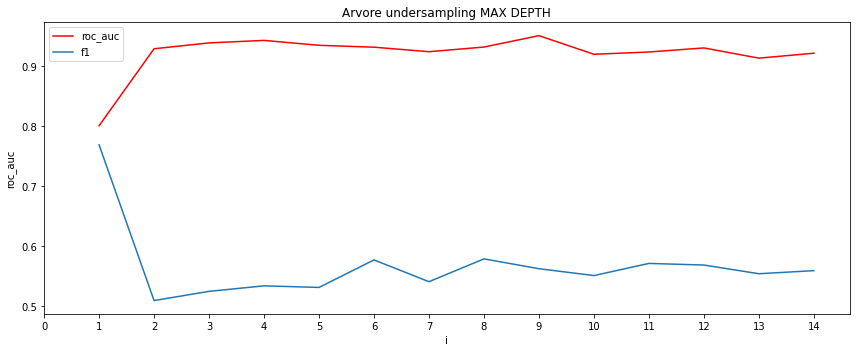

In [ ]:
plt.figure(figsize=(12,5))
depth = []
np.random.seed(100)
for i in range(1,15):
  arvore  = DecisionTreeClassifier(max_depth=i)
  arvore.fit(X_rus_hiperparametros, y_rus_hiperparametros)
  y_pred = arvore.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 =        f1_score(y_validacao, y_pred, average='macro')

  depth.append([i, roc_auc, f1])

depth = pd.DataFrame(depth, columns=['i','roc_auc','f1'])
print(depth.sort_values('roc_auc', ascending=False).head(5))
print(depth.sort_values('f1', ascending=False).head(5))

sns.lineplot(x='i', y='roc_auc', data=depth, color='r')
sns.lineplot(x='i', y='f1', data=depth)
plt.legend(['roc_auc','f1'])
plt.title('Arvore undersampling MAX DEPTH')
plt.xticks(range(0,15))
plt.tight_layout()

   i   roc_auc        f1
3  4  0.982138  0.579065
6  7  0.975391  0.582400
7  8  0.975200  0.580935
2  3  0.974753  0.577676
8  9  0.974562  0.576344
     i   roc_auc        f1
63  64  0.924653  0.740676
66  67  0.924653  0.740676
65  66  0.924653  0.740676
64  65  0.924653  0.740676
26  27  0.955756  0.601192


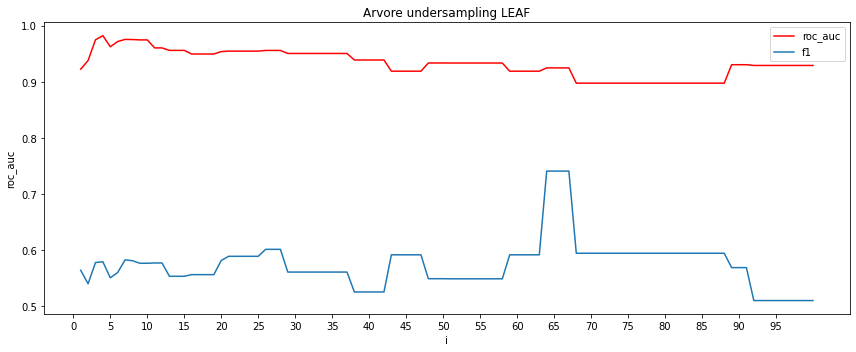

In [ ]:
plt.figure(figsize=(12,5))
leaf = []
np.random.seed(100)
for i in range(1,101,1):
  arvore  = DecisionTreeClassifier(min_samples_leaf=i)
  arvore.fit(X_rus_hiperparametros, y_rus_hiperparametros)
  y_pred = arvore.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 =        f1_score(y_validacao, y_pred, average='macro')

  leaf.append([i, roc_auc, f1])

leaf = pd.DataFrame(leaf, columns=['i','roc_auc','f1'])
print(leaf.sort_values('roc_auc', ascending=False).head(5))
print(leaf.sort_values('f1', ascending=False).head(5))

sns.lineplot(x='i', y='roc_auc', data=leaf, color ='r')
sns.lineplot(x='i', y='f1', data=leaf)
plt.title('Arvore undersampling LEAF')
plt.legend(['roc_auc','f1'])
plt.xticks(range(0,100,5))
plt.tight_layout()

     i   roc_auc        f1
18  20  0.973796  0.571361
17  19  0.973796  0.571361
22  24  0.973764  0.571165
21  23  0.973764  0.571165
20  22  0.973764  0.571165
    i   roc_auc        f1
4   6  0.952965  0.576062
8  10  0.952918  0.575724
6   8  0.952631  0.573747
7   9  0.945437  0.573655
5   7  0.945405  0.573438


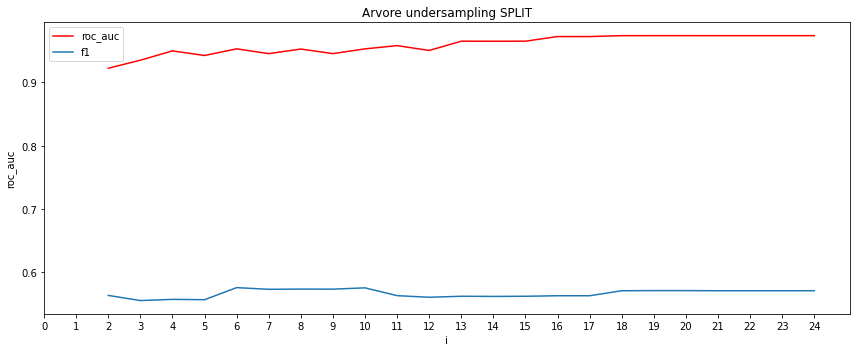

In [ ]:
plt.figure(figsize=(12,5))
split = []
np.random.seed(100)
for i in range(2,25,1):
  arvore  = DecisionTreeClassifier(min_samples_split=i)
  arvore.fit(X_rus_hiperparametros, y_rus_hiperparametros)
  y_pred = arvore.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 =        f1_score(y_validacao, y_pred, average='macro')

  split.append([i, roc_auc, f1])

split = pd.DataFrame(split, columns=['i','roc_auc','f1'])
print(split.sort_values('roc_auc', ascending=False).head(5))
print(split.sort_values('f1', ascending=False).head(5))

sns.lineplot(x='i', y='roc_auc', data=split, color ='r')
sns.lineplot(x='i', y='f1', data=split)
plt.legend(['roc_auc','f1'])
plt.xticks(range(0,25))
plt.title('Arvore undersampling SPLIT')
plt.tight_layout()

# Arvore de decisao melhores parametros

In [ ]:
%%time
np.random.seed(100)

param_grid = {
    'criterion':['gini','entropy'],
    'max_depth': [3,4,5,9],
    'min_samples_leaf': [3,4,7,8],
    'min_samples_split':[19,20,21,22]
    }

model  = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = StratifiedKFold(n_splits=5), n_jobs=-1, verbose=3, scoring='roc_auc')

grid_search.fit(X_validacao, y_validacao)

print(grid_search.best_estimator_)
print(grid_search.best_score_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3,
                       min_samples_split=19)
0.9857613215187346
CPU times: user 2.02 s, sys: 185 ms, total: 2.21 s
Wall time: 15.8 s


# Arvore de decisao teste do modelo

Sem hiperparametros

Acuracia: 97.83%
ROC_AUC: 96.06%
Recall 97.84%
Precision 54.86%
F1-score: 58.27%
              precision    recall  f1-score   support

           0       0.10      0.94      0.18        35
           1       1.00      0.98      0.99     14149

    accuracy                           0.98     14184
   macro avg       0.55      0.96      0.58     14184
weighted avg       1.00      0.98      0.99     14184



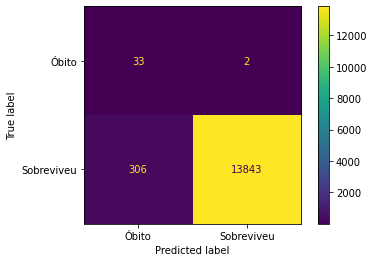

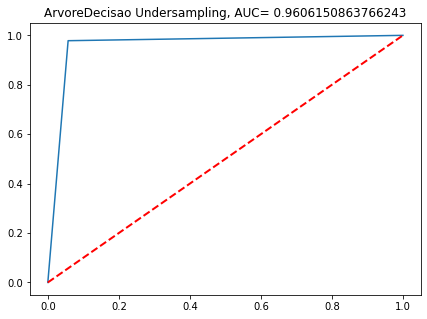

In [ ]:
arvore = AM('ArvoreDecisao Undersampling',DecisionTreeClassifier(), X_under_resampled, y_under_resampled, X_test, y_test)
undersampling.append(arvore)
finais_hiperparametros.append(arvore)

Acuracia: 99.13%
ROC_AUC: 98.14%
Recall 99.14%
Precision 60.89%
F1-score: 67.58%
              precision    recall  f1-score   support

           0       0.22      0.97      0.36        35
           1       1.00      0.99      1.00     14149

    accuracy                           0.99     14184
   macro avg       0.61      0.98      0.68     14184
weighted avg       1.00      0.99      0.99     14184



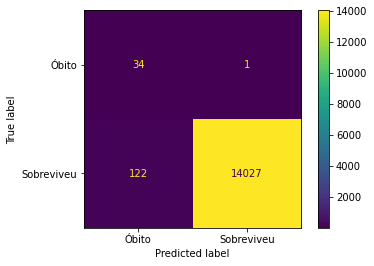

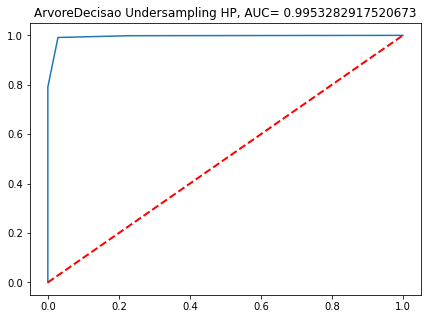

In [ ]:
arvore = AM('ArvoreDecisao Undersampling HP',DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=3,
                       min_samples_split=19), X_under_resampled, y_under_resampled, X_test, y_test)
undersampling.append(arvore)
finais_hiperparametros.append(arvore)

# Arvore cross_validate

In [ ]:
kf_score(DecisionTreeClassifier(),x_kf, y_kf)

DecisionTreeClassifier
----------
[0.83886027 0.9559834  0.97075761 0.93751863 0.81448763]
----------
ROC_AUC médio 5 folds: 90.35
Desvio padrão: 0.06408877461271067
Intervalo ROC_AUC: [83.94,96.76]


In [ ]:
kf_score(DecisionTreeClassifier(criterion='entropy', max_depth=3,
                       min_samples_leaf=6, min_samples_split=23),x_kf, y_kf)

DecisionTreeClassifier
----------
[0.8424018  0.99849601 0.99499089 0.99990444 0.8180212 ]
----------
ROC_AUC médio 5 folds: 93.08
Desvio padrão: 0.08247658498786448
Intervalo ROC_AUC: [84.83000000000001,101.32000000000001]


# Floresta Aleatoria undersampling + gridsearchCV

       i   roc_auc        f1
0   True  0.974369  0.680256
1  False  0.973731  0.661590
       i   roc_auc        f1
0   True  0.974369  0.680256
1  False  0.973731  0.661590


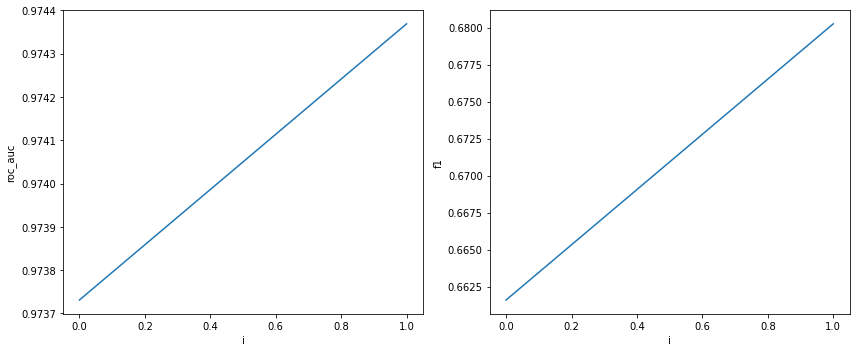

In [ ]:
plt.figure(figsize=(12,5))
boot = []
bt = [True, False]
np.random.seed(100)
for i in bt:
  floresta  = RandomForestClassifier(bootstrap=i)
  floresta.fit(X_rus_hiperparametros, y_rus_hiperparametros)
  y_pred = floresta.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 =        f1_score(y_validacao, y_pred, average='macro')

  boot.append([i, roc_auc, f1])

boot = pd.DataFrame(boot, columns=['i','roc_auc','f1'])
print(boot.sort_values('roc_auc', ascending=False).head(5))
print(boot.sort_values('f1', ascending=False).head(5))

plt.subplot(1,2,1)
sns.lineplot(x='i', y='roc_auc', data=boot)
plt.subplot(1,2,2)
sns.lineplot(x='i', y='f1', data=boot)
plt.tight_layout()

         i   roc_auc        f1
0     gini  0.974369  0.680256
1  entropy  0.960046  0.688693
         i   roc_auc        f1
1  entropy  0.960046  0.688693
0     gini  0.974369  0.680256


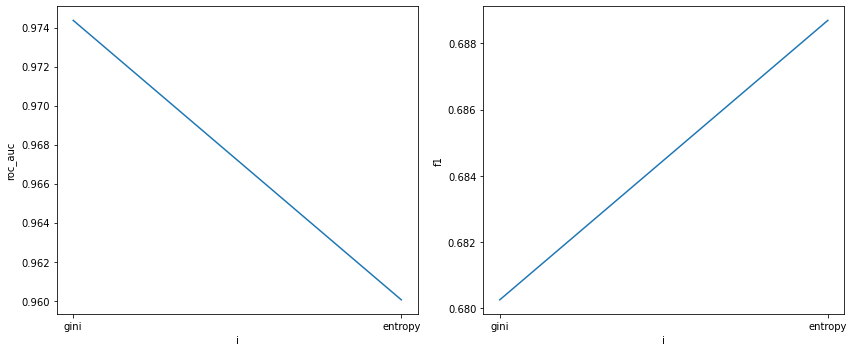

In [ ]:
plt.figure(figsize=(12,5))
criterio = []
cr = ['gini','entropy']
np.random.seed(100)
for i in cr:
  floresta  = RandomForestClassifier(criterion=i)
  floresta.fit(X_rus_hiperparametros, y_rus_hiperparametros)
  y_pred = floresta.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 =        f1_score(y_validacao, y_pred, average='macro')

  criterio.append([i, roc_auc, f1])

criterio = pd.DataFrame(criterio, columns=['i','roc_auc','f1'])
print(criterio.sort_values('roc_auc', ascending=False).head(5))
print(criterio.sort_values('f1', ascending=False).head(5))

plt.subplot(1,2,1)
sns.lineplot(x='i', y='roc_auc', data=criterio)
plt.subplot(1,2,2)
sns.lineplot(x='i', y='f1', data=criterio)
plt.tight_layout()

     i   roc_auc        f1
47  48  0.981578  0.677956
33  34  0.981339  0.670774
26  27  0.974752  0.693571
23  24  0.974624  0.688928
21  22  0.974592  0.687800
     i   roc_auc        f1
26  27  0.974752  0.693571
7    8  0.960173  0.693471
32  33  0.967367  0.689969
6    7  0.967367  0.689969
23  24  0.974624  0.688928


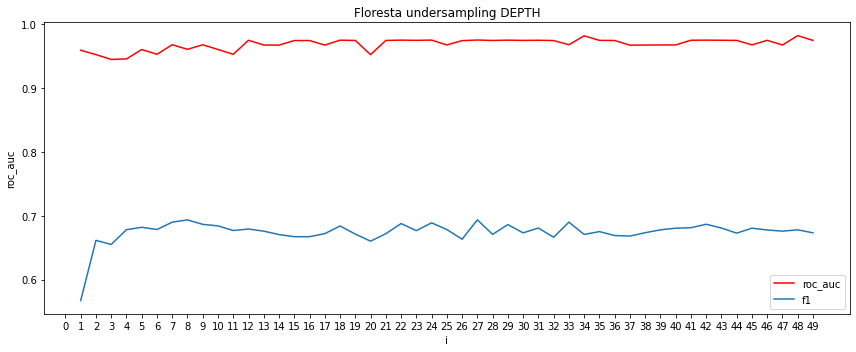

In [ ]:
plt.figure(figsize=(12,5))
depth = []
np.random.seed(100)
for i in range(1,50):
  floresta  = RandomForestClassifier(max_depth=i)
  floresta.fit(X_rus_hiperparametros, y_rus_hiperparametros)
  y_pred = floresta.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 =        f1_score(y_validacao, y_pred, average='macro')

  depth.append([i, roc_auc, f1])

depth = pd.DataFrame(depth, columns=['i','roc_auc','f1'])
print(depth.sort_values('roc_auc', ascending=False).head(5))
print(depth.sort_values('f1', ascending=False).head(5))

sns.lineplot(x='i', y='roc_auc', data=depth, color='r')
sns.lineplot(x='i', y='f1', data=depth)
plt.legend(['roc_auc','f1'])
plt.title('Floresta undersampling DEPTH')
plt.xticks(range(0,50,1))
plt.tight_layout()

   i   roc_auc        f1
0  1  0.974369  0.680256
5  6  0.973636  0.659104
4  5  0.967303  0.687669
1  2  0.967080  0.680026
2  3  0.966713  0.668690
     i   roc_auc        f1
3    4  0.960301  0.698489
10  11  0.952805  0.690359
4    5  0.967303  0.687669
46  47  0.938067  0.684135
0    1  0.974369  0.680256


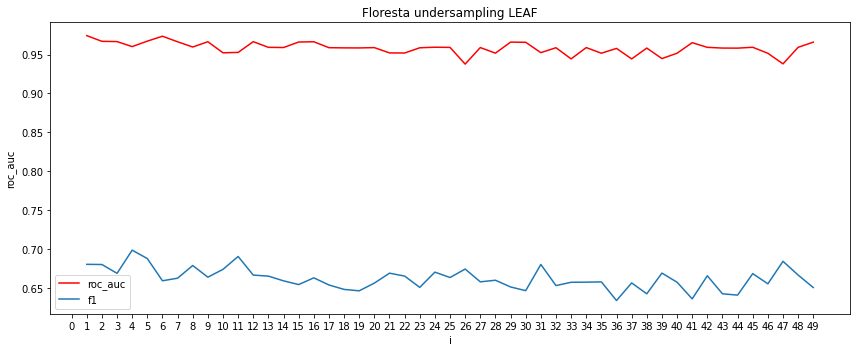

In [ ]:
plt.figure(figsize=(12,5))
leaf = []
np.random.seed(100)
for i in range(1,50,1):
  floresta  = RandomForestClassifier(min_samples_leaf=i)
  floresta.fit(X_rus_hiperparametros, y_rus_hiperparametros)
  y_pred = floresta.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 =        f1_score(y_validacao, y_pred, average='macro')

  leaf.append([i, roc_auc, f1])

leaf = pd.DataFrame(leaf, columns=['i','roc_auc','f1'])
print(leaf.sort_values('roc_auc', ascending=False).head(5))
print(leaf.sort_values('f1', ascending=False).head(5))

sns.lineplot(x='i', y='roc_auc', data=leaf, color='r')
sns.lineplot(x='i', y='f1', data=leaf)
plt.legend(['roc_auc','f1'])
plt.title('Floresta undersampling LEAF')
plt.xticks(range(0,50,1))
plt.tight_layout()
plt.tight_layout()

     i   roc_auc        f1
16  18  0.974465  0.683417
0    2  0.974369  0.680256
10  12  0.974018  0.669511
18  20  0.973380  0.652816
13  15  0.967479  0.694127
     i   roc_auc        f1
13  15  0.967479  0.694127
7    9  0.967367  0.689969
4    6  0.952725  0.687393
2    4  0.967287  0.687103
17  19  0.959998  0.686959


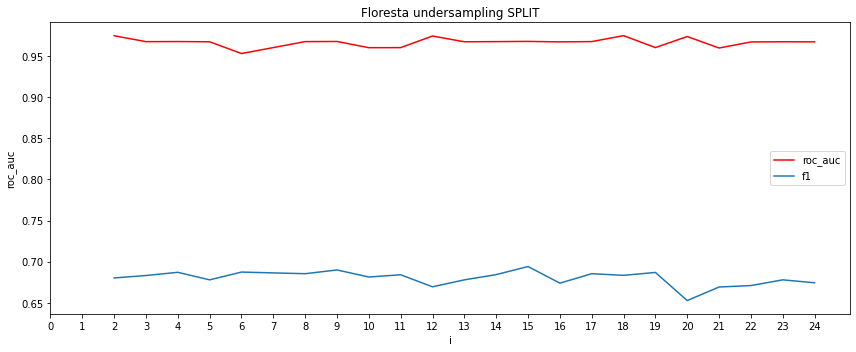

In [ ]:
plt.figure(figsize=(12,5))
split = []
np.random.seed(100)
for i in range(2,25,1):
  floresta  = RandomForestClassifier(min_samples_split=i)
  floresta.fit(X_rus_hiperparametros, y_rus_hiperparametros)
  y_pred = floresta.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 =        f1_score(y_validacao, y_pred, average='macro')

  split.append([i, roc_auc, f1])

split = pd.DataFrame(split, columns=['i','roc_auc','f1'])
print(split.sort_values('roc_auc', ascending=False).head(5))
print(split.sort_values('f1', ascending=False).head(5))

sns.lineplot(x='i', y='roc_auc', data=split, color='r')
sns.lineplot(x='i', y='f1', data=split)

plt.legend(['roc_auc','f1'])
plt.title('Floresta undersampling SPLIT')
plt.xticks(range(0,25,1))
plt.tight_layout()
plt.tight_layout()

       i   roc_auc        f1
141  191  0.982025  0.996688
44    94  0.981818  0.996480
145  195  0.981818  0.996480
148  198  0.981754  0.996415
105  155  0.981690  0.996351
       i   roc_auc        f1
53   103  0.967542  0.996881
32    82  0.974800  0.996801
118  168  0.974768  0.996769
40    90  0.967399  0.996737
38    88  0.974736  0.996737


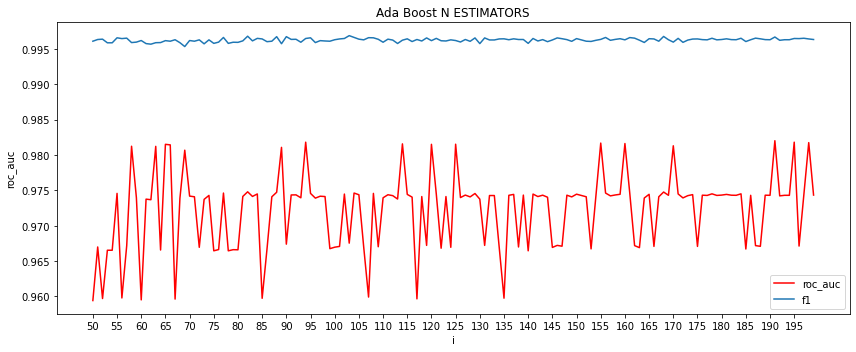

In [ ]:
plt.figure(figsize=(12,5))
n = []
np.random.seed(100)
for i in range(50,200,1):

  floresta  = RandomForestClassifier(n_estimators=i)
  floresta.fit(X_rus_hiperparametros, y_rus_hiperparametros)
  y_pred = floresta.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 = f1_score(y_validacao, y_pred)

  n.append([i, roc_auc, f1])

n = pd.DataFrame(n, columns=['i','roc_auc','f1'])
print(n.sort_values('roc_auc', ascending=False).head(5))
print(n.sort_values('f1', ascending=False).head(5))

sns.lineplot(x='i', y='roc_auc', data=n, color ='r')
sns.lineplot(x='i', y='f1', data=n)
plt.legend(['roc_auc','f1'])
plt.title('Floresta Aleatoria N ESTIMATORS')
plt.xticks(range(50,200,5))
plt.tight_layout()
plt.tight_layout()

# Floresta aleatoria melhores parametros

In [ ]:
%%time
np.random.seed(100)

param_grid = {
    'bootstrap':[True,False],
    'criterion':['gini','entropy'],
    'max_depth': [48,34,27],
    'min_samples_leaf': [1,5,6],
    'min_samples_split': [2,12,18],
    'n_estimators': [94,191,195]
}

model  = RandomForestClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = StratifiedKFold(n_splits=5), n_jobs=-1, verbose=3, scoring='roc_auc')

grid_search.fit(X_validacao, y_validacao)

print(grid_search.best_estimator_)
print(grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
RandomForestClassifier(bootstrap=False, max_depth=27, min_samples_leaf=5,
                       min_samples_split=12, n_estimators=94)
0.9947204177984965
CPU times: user 22.6 s, sys: 2.04 s, total: 24.7 s
Wall time: 27min 2s


# Floresta aleatoria testando modelo

Acuracia: 99.02%
ROC_AUC: 96.66%
Recall 99.03%
Precision 59.7%
F1-score: 65.85%
              precision    recall  f1-score   support

           0       0.19      0.94      0.32        35
           1       1.00      0.99      1.00     14149

    accuracy                           0.99     14184
   macro avg       0.60      0.97      0.66     14184
weighted avg       1.00      0.99      0.99     14184



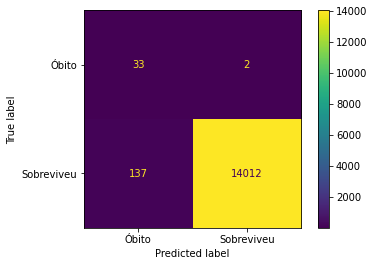

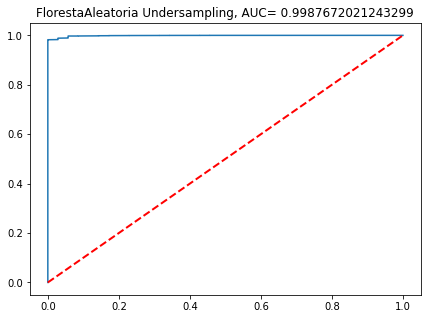

In [ ]:
floresta = AM('FlorestaAleatoria Undersampling',RandomForestClassifier(), X_under_resampled, y_under_resampled, X_test, y_test)
undersampling.append(floresta)
finais_hiperparametros.append(floresta)

Acuracia: 99.06%
ROC_AUC: 99.53%
Recall 99.05%
Precision 60.36%
F1-score: 66.92%
              precision    recall  f1-score   support

           0       0.21      1.00      0.34        35
           1       1.00      0.99      1.00     14149

    accuracy                           0.99     14184
   macro avg       0.60      1.00      0.67     14184
weighted avg       1.00      0.99      0.99     14184



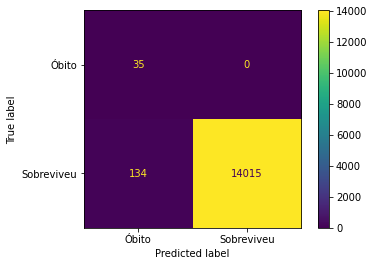

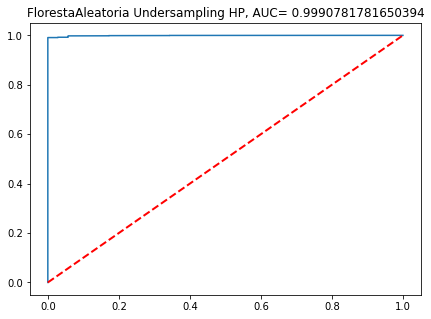

In [ ]:
floresta = AM('FlorestaAleatoria Undersampling HP',RandomForestClassifier(bootstrap=False, max_depth=27, min_samples_leaf=5,
                       min_samples_split=12, n_estimators=94), X_under_resampled, y_under_resampled, X_test, y_test)
undersampling.append(floresta)
finais_hiperparametros.append(floresta)

# Floresta cross_validate

In [ ]:
kf_score(RandomForestClassifier(),x_kf, y_kf)

RandomForestClassifier
----------
[0.99185664 0.99884755 0.99984698 0.99972355 0.99456479]
----------
ROC_AUC médio 5 folds: 99.7
Desvio padrão: 0.0032036156528558253
Intervalo ROC_AUC: [99.38,100.02]


In [ ]:
kf_score(RandomForestClassifier(criterion='entropy', max_depth=37, min_samples_leaf=5,
                       min_samples_split=13, n_estimators=55),x_kf, y_kf)

RandomForestClassifier
----------
[0.99429293 0.99879181 0.99986576 0.9999215  0.99952772]
----------
ROC_AUC médio 5 folds: 99.85000000000001
Desvio padrão: 0.002131887032592653
Intervalo ROC_AUC: [99.63,100.05999999999999]


# AdaBoost unsersampling + gridsearchCV

     i   roc_auc        f1
35  36  0.967096  0.996432
53  54  0.967096  0.996432
52  53  0.967080  0.996416
51  52  0.967080  0.996416
34  35  0.967080  0.996416
     i   roc_auc        f1
0    1  0.800785  0.998883
2    3  0.800785  0.998883
1    2  0.800785  0.998883
3    4  0.829814  0.998564
60  61  0.952852  0.996865


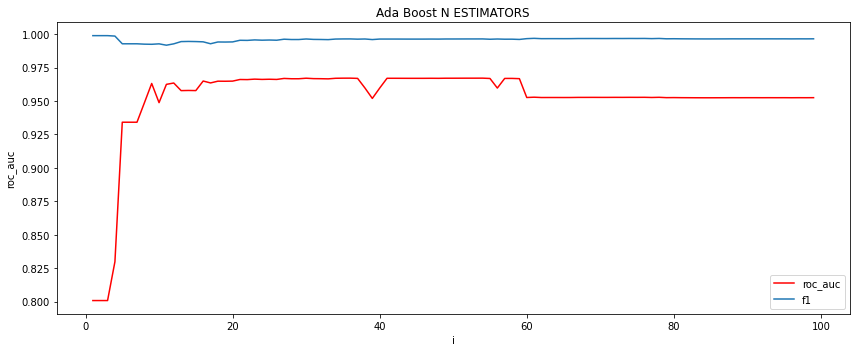

In [ ]:
plt.figure(figsize=(12,5))
n = []
np.random.seed(100)
for i in range(1,100,1):

  ada  = AdaBoostClassifier(n_estimators=i)
  ada.fit(X_rus_hiperparametros, y_rus_hiperparametros)
  y_pred = ada.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 = f1_score(y_validacao, y_pred)

  n.append([i, roc_auc, f1])

n = pd.DataFrame(n, columns=['i','roc_auc','f1'])
print(n.sort_values('roc_auc', ascending=False).head(5))
print(n.sort_values('f1', ascending=False).head(5))

sns.lineplot(x='i', y='roc_auc', data=n, color='r')
sns.lineplot(x='i', y='f1', data=n)
plt.legend(['roc_auc','f1'])
plt.title('Ada Boost N ESTIMATORS')

plt.tight_layout()

       i   roc_auc        f1
19  1.00  0.967048  0.996383
16  0.85  0.967000  0.996335
18  0.95  0.966920  0.996255
14  0.75  0.966920  0.996255
15  0.80  0.966889  0.996223
       i   roc_auc        f1
0   0.05  0.910409  0.998451
1   0.10  0.952932  0.996945
19  1.00  0.967048  0.996383
16  0.85  0.967000  0.996335
18  0.95  0.966920  0.996255


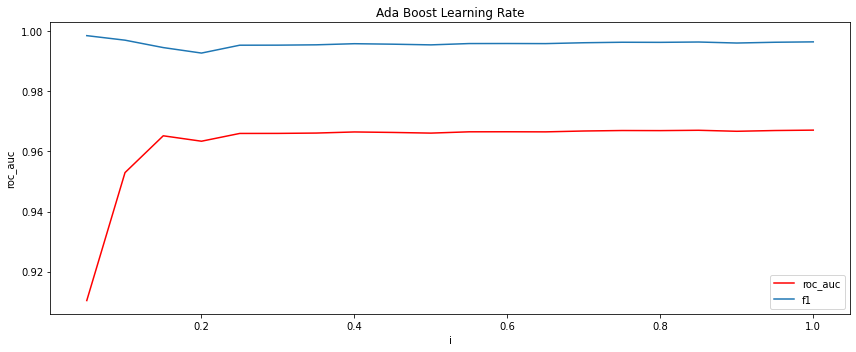

In [ ]:
plt.figure(figsize=(12,5))
lr = []
lr_range = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,
            0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,
            0.8,0.85,0.9,0.95,1]
np.random.seed(100)
for i in lr_range:
  ada  = AdaBoostClassifier(learning_rate=i)
  ada.fit(X_rus_hiperparametros, y_rus_hiperparametros)
  y_pred = ada.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 = f1_score(y_validacao, y_pred)

  lr.append([i, roc_auc, f1])

lr = pd.DataFrame(lr, columns=['i','roc_auc','f1'])
print(lr.sort_values('roc_auc', ascending=False).head(5))
print(lr.sort_values('f1', ascending=False).head(5))

sns.lineplot(x='i', y='roc_auc', data=lr, color='r')
sns.lineplot(x='i', y='f1', data=lr)
plt.legend(['roc_auc','f1'])
plt.title('Ada Boost Learning Rate')
plt.tight_layout()

# AdaBoost melhores parametros

In [ ]:
%%time
np.random.seed(100)

param_grid = {
    
    'learning_rate':[0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
    'n_estimators': [36,52,53,54]
}

model  = AdaBoostClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = StratifiedKFold(n_splits=5), n_jobs=-1, verbose=3, scoring='roc_auc')

grid_search.fit(X_validacao, y_validacao)

print(grid_search.best_estimator_)
print(grid_search.best_score_)

Fitting 5 folds for each of 76 candidates, totalling 380 fits
AdaBoostClassifier(learning_rate=0.1, n_estimators=36)
0.9875924582066471
CPU times: user 4.69 s, sys: 446 ms, total: 5.14 s
Wall time: 4min 3s


#AdaBoost testando modelo

Acuracia: 99.31%
ROC_AUC: 99.65%
Recall 99.31%
Precision 63.16%
F1-score: 70.66%
              precision    recall  f1-score   support

           0       0.26      1.00      0.42        35
           1       1.00      0.99      1.00     14149

    accuracy                           0.99     14184
   macro avg       0.63      1.00      0.71     14184
weighted avg       1.00      0.99      1.00     14184



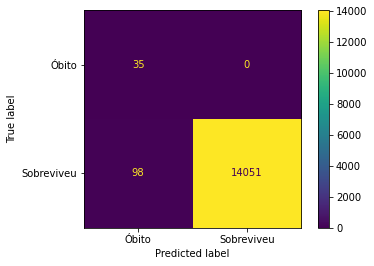

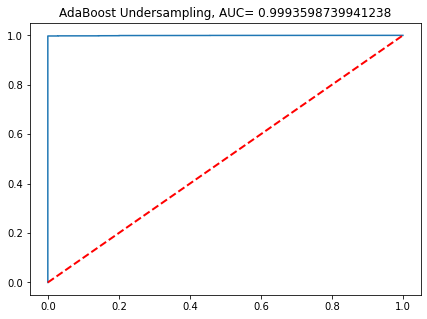

In [ ]:
adaboost = AM('AdaBoost Undersampling',AdaBoostClassifier(), X_under_resampled, y_under_resampled, X_test, y_test)
undersampling.append(adaboost)
finais_hiperparametros.append(adaboost)

Acuracia: 99.31%
ROC_AUC: 98.23%
Recall 99.31%
Precision 62.97%
F1-score: 70.31%
              precision    recall  f1-score   support

           0       0.26      0.97      0.41        35
           1       1.00      0.99      1.00     14149

    accuracy                           0.99     14184
   macro avg       0.63      0.98      0.70     14184
weighted avg       1.00      0.99      1.00     14184



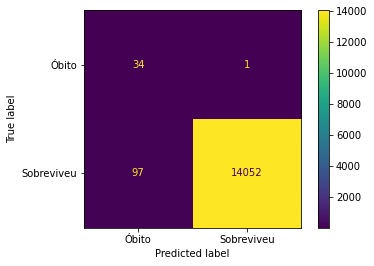

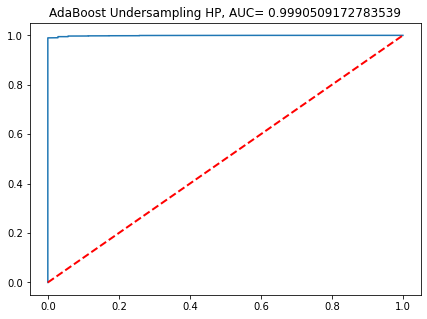

In [ ]:
adaboost = AM('AdaBoost Undersampling HP',AdaBoostClassifier(learning_rate=0.1, n_estimators=100), X_under_resampled, y_under_resampled, X_test, y_test)
undersampling.append(adaboost)
finais_hiperparametros.append(adaboost)

# AdaBoost cross_validate

In [ ]:
kf_score(AdaBoostClassifier(),x_kf, y_kf)

AdaBoostClassifier
----------
[0.99230601 0.99902503 0.99996473 0.99998749 0.99976557]
----------
ROC_AUC médio 5 folds: 99.82
Desvio padrão: 0.002972529927871806
Intervalo ROC_AUC: [99.52,100.12]


In [ ]:
kf_score(AdaBoostClassifier(learning_rate=0.15, n_estimators=122),x_kf, y_kf)

AdaBoostClassifier
----------
[0.99593344 0.99928327 0.99992605 0.99998749 0.99946399]
----------
ROC_AUC médio 5 folds: 99.89
Desvio padrão: 0.0015165162311758854
Intervalo ROC_AUC: [99.74,100.03999999999999]


# XGBoost undersampling + gridsearchCV

   i   roc_auc        f1
2  3  0.967144  0.682148
0  1  0.965310  0.635544
3  4  0.960461  0.705126
1  2  0.960030  0.688111
5  6  0.959568  0.672635
   i   roc_auc        f1
3  4  0.960461  0.705126
1  2  0.960030  0.688111
4  5  0.952597  0.682828
2  3  0.967144  0.682148
5  6  0.959568  0.672635


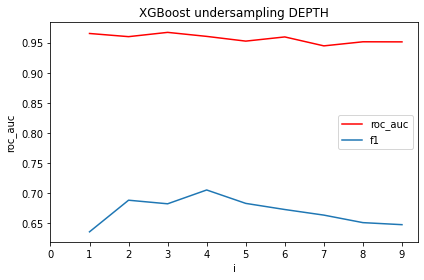

In [ ]:
depth = []
np.random.seed(100)
for i in range(1,10):
  xgb_class = xgb.XGBClassifier(max_depth=i)
  xgb_class.fit(X_rus_hiperparametros, y_rus_hiperparametros)
  y_pred = xgb_class.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 =        f1_score(y_validacao, y_pred, average='macro')

  depth.append([i, roc_auc, f1])

depth = pd.DataFrame(depth, columns=['i','roc_auc','f1'])
print(depth.sort_values('roc_auc', ascending=False).head(5))
print(depth.sort_values('f1', ascending=False).head(5))

sns.lineplot(x='i', y='roc_auc', data=depth, color='r')
sns.lineplot(x='i', y='f1', data=depth)
plt.legend(['roc_auc','f1'])
plt.title('XGBoost undersampling DEPTH')
plt.xticks(range(0,10,1))
plt.tight_layout()

       i   roc_auc        f1
7   0.40  0.968435  0.997779
3   0.20  0.968356  0.997699
1   0.10  0.967144  0.996480
4   0.25  0.961130  0.997811
12  0.65  0.960716  0.997394
       i   roc_auc        f1
4   0.25  0.961130  0.997811
7   0.40  0.968435  0.997779
6   0.35  0.953745  0.997763
3   0.20  0.968356  0.997699
10  0.55  0.953586  0.997603


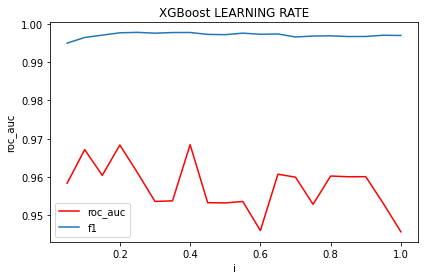

In [ ]:
lr = []
lr_range = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,
            0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,
            0.8,0.85,0.9,0.95,1]
np.random.seed(100)

for i in lr_range:
  xgb_class = xgb.XGBClassifier(learning_rate=i)
  xgb_class.fit(X_rus_hiperparametros, y_rus_hiperparametros)
  y_pred = xgb_class.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 = f1_score(y_validacao, y_pred)

  lr.append([i, roc_auc, f1])

lr = pd.DataFrame(lr, columns=['i','roc_auc','f1'])
print(lr.sort_values('roc_auc', ascending=False).head(5))
print(lr.sort_values('f1', ascending=False).head(5))

sns.lineplot(x='i', y='roc_auc', data=lr, color='r')
sns.lineplot(x='i', y='f1', data=lr)
plt.legend(['roc_auc','f1'])
plt.title('XGBoost LEARNING RATE')
plt.tight_layout()
plt.tight_layout()
plt.tight_layout()

       i   roc_auc        f1
96   296  0.975533  0.997538
99   299  0.975533  0.997538
104  304  0.975517  0.997522
102  302  0.975517  0.997522
103  303  0.975517  0.997522
       i   roc_auc        f1
142  342  0.960939  0.997619
141  341  0.960923  0.997603
145  345  0.953570  0.997587
139  339  0.953570  0.997587
143  343  0.953570  0.997587


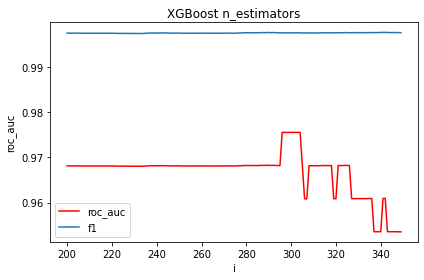

In [ ]:
n = []
np.random.seed(100)
for i in range(200,350,1):

  xgb_class = xgb.XGBClassifier(n_estimators=i)
  xgb_class.fit(X_rus_hiperparametros, y_rus_hiperparametros)
  y_pred = xgb_class.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 = f1_score(y_validacao, y_pred)

  n.append([i, roc_auc, f1])

n = pd.DataFrame(n, columns=['i','roc_auc','f1'])
print(n.sort_values('roc_auc', ascending=False).head(5))
print(n.sort_values('f1', ascending=False).head(5))

sns.lineplot(x='i', y='roc_auc', data=n, color='r')
sns.lineplot(x='i', y='f1', data=n)
plt.legend(['roc_auc','f1'])
plt.title('XGBoost n_estimators')
plt.tight_layout()

#XGBoost melhores parametros

In [ ]:
%%time
np.random.seed(100)

param_grid = {"learning_rate": [0.1,0.2,0.4] ,
 "max_depth"        : [3,4,1],
 'n_estimators': [296,299,304] }

model  = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = StratifiedKFold(n_splits=5), n_jobs=-1, verbose=3, scoring='roc_auc')

grid_search.fit(X_validacao, y_validacao)

print(grid_search.best_estimator_)
print(grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
XGBClassifier(n_estimators=304)
0.9939465710721029
CPU times: user 9.5 s, sys: 394 ms, total: 9.89 s
Wall time: 7min 45s


# XGBoost testando modelo

Acuracia: 99.22%
ROC_AUC: 99.61%
Recall 99.22%
Precision 61.99%
F1-score: 69.14%
              precision    recall  f1-score   support

           0       0.24      1.00      0.39        35
           1       1.00      0.99      1.00     14149

    accuracy                           0.99     14184
   macro avg       0.62      1.00      0.69     14184
weighted avg       1.00      0.99      0.99     14184



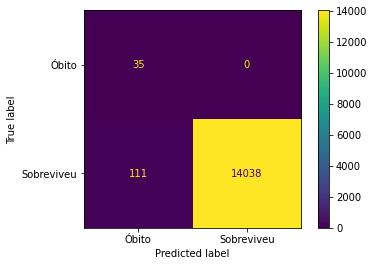

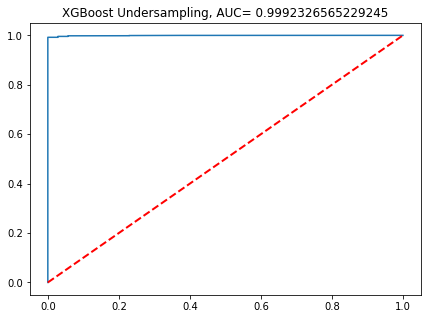

In [ ]:
xgb_class = AM('XGBoost Undersampling',xgb.XGBClassifier(), X_under_resampled, y_under_resampled, X_test, y_test)
undersampling.append(xgb_class)
finais_hiperparametros.append(xgb_class)

Acuracia: 99.17%
ROC_AUC: 98.16%
Recall 99.17%
Precision 61.25%
F1-score: 68.07%
              precision    recall  f1-score   support

           0       0.23      0.97      0.37        35
           1       1.00      0.99      1.00     14149

    accuracy                           0.99     14184
   macro avg       0.61      0.98      0.68     14184
weighted avg       1.00      0.99      0.99     14184



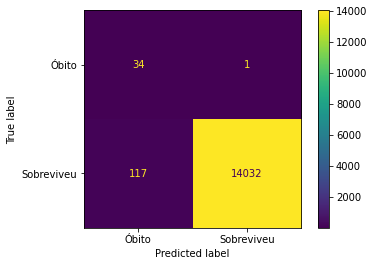

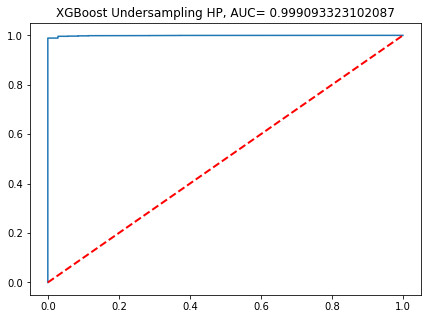

In [ ]:
xgb_class = AM('XGBoost Undersampling HP',xgb.XGBClassifier(n_estimators=304), X_under_resampled, y_under_resampled, X_test, y_test)
undersampling.append(xgb_class)
finais_hiperparametros.append(xgb_class)

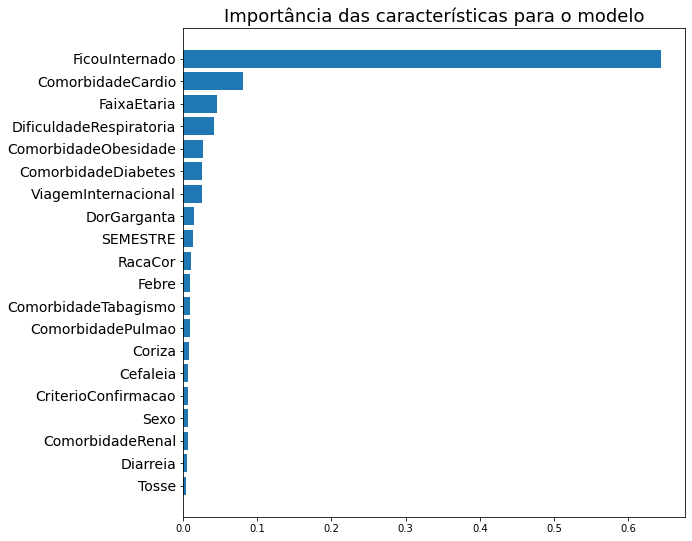

In [ ]:
plt.figure(figsize=(9,9))

xgbf = xgb.XGBClassifier()
xgbf.fit(X_under_resampled, y_under_resampled)
sorted_idx = xgbf.feature_importances_.argsort()

plt.barh(X_under_resampled.columns[sorted_idx],xgbf.feature_importances_[sorted_idx]);
plt.title('Importância das características para o modelo', fontsize=18);
plt.yticks(fontsize=14);

# XGBoost cross_validate

In [ ]:
kf_score(xgb.XGBClassifier(),x_kf, y_kf)

XGBClassifier
----------
[0.99642434 0.99932082 0.99984073 0.99998294 0.99990611]
----------
ROC_AUC médio 5 folds: 99.91
Desvio padrão: 0.0013554241697254254
Intervalo ROC_AUC: [99.77000000000001,100.05]


In [ ]:
kf_score(xgb.XGBClassifier(learning_rate=0.25, max_depth=2, n_estimators=169),x_kf, y_kf)

XGBClassifier
----------
[0.99360749 0.99898976 0.99987258 0.99997838 0.99989644]
----------
ROC_AUC médio 5 folds: 99.85000000000001
Desvio padrão: 0.00245728707879996
Intervalo ROC_AUC: [99.6,100.08999999999999]


# Regressão Logistica CV undersampling

Acuracia: 98.75%
ROC_AUC: 97.95%
Recall 98.75%
Precision 58.05%
F1-score: 63.5%
              precision    recall  f1-score   support

           0       0.16      0.97      0.28        35
           1       1.00      0.99      0.99     14149

    accuracy                           0.99     14184
   macro avg       0.58      0.98      0.64     14184
weighted avg       1.00      0.99      0.99     14184



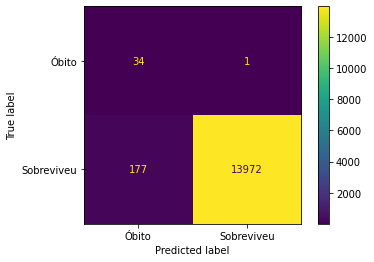

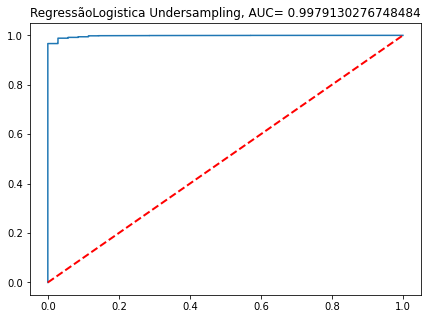

In [ ]:
logistic = AM('RegressãoLogistica Undersampling',LogisticRegression(max_iter=1000), X_under_resampled, y_under_resampled, X_test, y_test)
undersampling.append(logistic)
finais_hiperparametros.append(logistic)

Acuracia: 98.73%
ROC_AUC: 97.94%
Recall 98.73%
Precision 57.98%
F1-score: 63.39%
              precision    recall  f1-score   support

           0       0.16      0.97      0.27        35
           1       1.00      0.99      0.99     14149

    accuracy                           0.99     14184
   macro avg       0.58      0.98      0.63     14184
weighted avg       1.00      0.99      0.99     14184



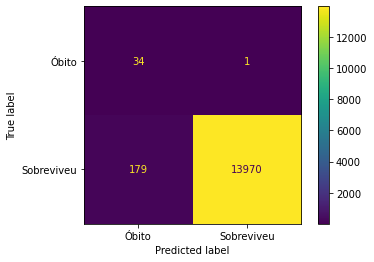

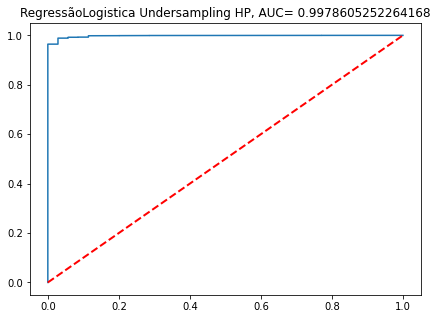

In [ ]:
logistic = AM('RegressãoLogistica Undersampling HP',LogisticRegressionCV(max_iter=1000), X_under_resampled, y_under_resampled, X_test, y_test)
undersampling.append(logistic)
finais_hiperparametros.append(logistic)

# Regressao Logistica cross_validate

In [ ]:
kf_score(LogisticRegression(max_iter=1000),x_kf, y_kf)

LogisticRegression
----------
[0.94887929 0.99085663 0.99486916 0.99894539 0.98764901]
----------
ROC_AUC médio 5 folds: 98.42
Intervalo ROC_AUC: [96.61999999999999,100.22999999999999]


# Métricas dos modelos de validacao com UNDERSAMPLING

In [ ]:
undersampling_df = pd.DataFrame(undersampling, columns=['Modelo','Acuracia','ROC_AUC','Recall','Precisão','F1-score'])
undersampling_df.drop_duplicates(subset=['Modelo'],keep='last', inplace=True)
undersampling_df

Modelo   Acuracia    ROC_AUC     Recall  \
0           ArvoreDecisao Undersampling  97.828539  96.061509  97.837303   
1        ArvoreDecisao Undersampling HP  99.132826  98.140303  99.137748   
2       FlorestaAleatoria Undersampling  99.020023  96.658724  99.031734   
3    FlorestaAleatoria Undersampling HP  99.055274  99.526468  99.052937   
4                AdaBoost Undersampling  99.309081  99.653686  99.307372   
6             AdaBoost Undersampling HP  99.309081  98.228648  99.314439   
7                 XGBoost Undersampling  99.217428  99.607746  99.215492   
8              XGBoost Undersampling HP  99.168077  98.157972  99.173086   
9      RegressãoLogistica Undersampling  98.745065  97.945943  98.749028   
10  RegressãoLogistica Undersampling HP  98.730964  97.938875  98.734893   

     Precisão   F1-score  
0   54.860034  58.273412  
1   60.893872  67.582784  
2   59.698747  65.850783  
3   60.355030  66.918970  
4   63.157895  70.659574  
6   62.973541  70.308181  
7   61.986301  69.140117  
8   61.254715  68.070216  
9   58.053294  63.504660  
10  57.977642  63.389621

In [ ]:
undersampling_df_bestscores = undersampling_df.sort_values(by='ROC_AUC', ascending=False)
undersampling_df_bestscores

Modelo   Acuracia    ROC_AUC     Recall  \
4                AdaBoost Undersampling  99.309081  99.653686  99.307372   
7                 XGBoost Undersampling  99.217428  99.607746  99.215492   
3    FlorestaAleatoria Undersampling HP  99.055274  99.526468  99.052937   
6             AdaBoost Undersampling HP  99.309081  98.228648  99.314439   
8              XGBoost Undersampling HP  99.168077  98.157972  99.173086   
1        ArvoreDecisao Undersampling HP  99.132826  98.140303  99.137748   
9      RegressãoLogistica Undersampling  98.745065  97.945943  98.749028   
10  RegressãoLogistica Undersampling HP  98.730964  97.938875  98.734893   
2       FlorestaAleatoria Undersampling  99.020023  96.658724  99.031734   
0           ArvoreDecisao Undersampling  97.828539  96.061509  97.837303   

     Precisão   F1-score  
4   63.157895  70.659574  
7   61.986301  69.140117  
3   60.355030  66.918970  
6   62.973541  70.308181  
8   61.254715  68.070216  
1   60.893872  67.582784  
9   58.053294  63.504660  
10  57.977642  63.389621  
2   59.698747  65.850783  
0   54.860034  58.273412

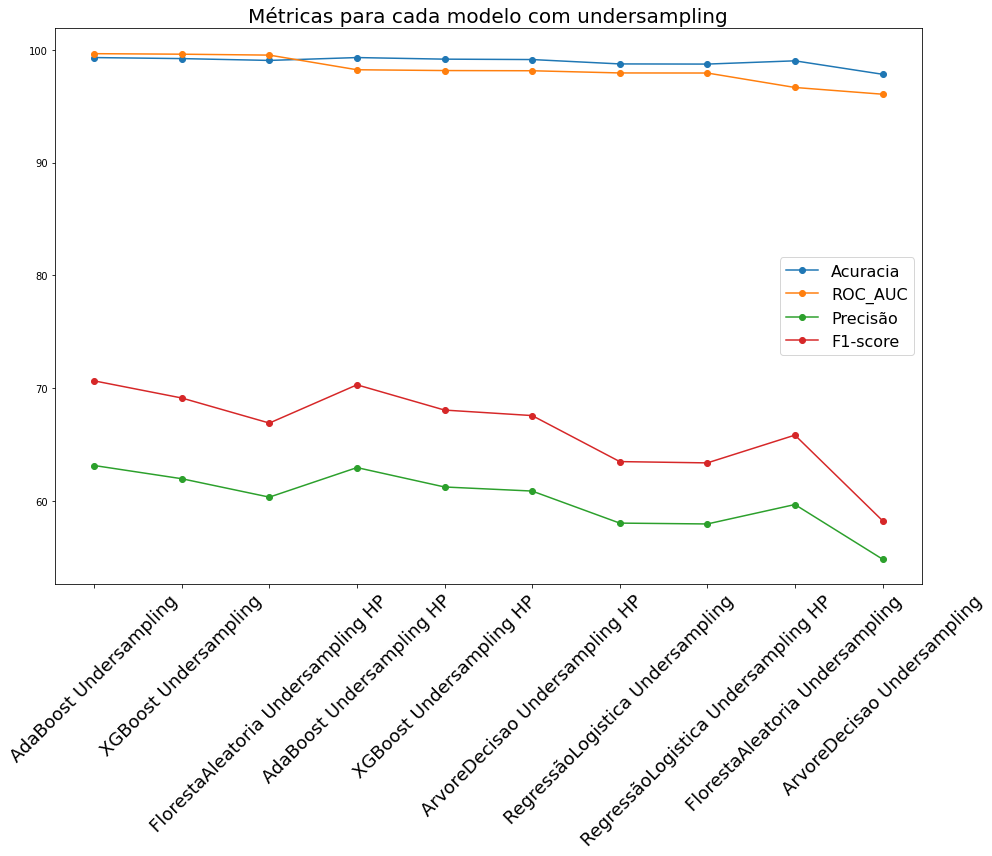

In [ ]:
plt.figure(figsize=(14,12))

plt.title('Métricas para cada modelo com undersampling', fontsize=20)
ax = plt.plot(undersampling_df_bestscores.Modelo, undersampling_df_bestscores.drop(columns=['Modelo','Recall']), marker='o');
plt.legend(undersampling_df_bestscores.drop(columns=['Modelo','Recall']), fontsize=16);
plt.xticks(rotation=45, fontsize=18)
plt.tight_layout()

# SMOTE validacao de modelos

In [ ]:
smt = []

# Arvore de decisão SMOTE + gridsearchCV

         i   roc_auc        f1
1  entropy  0.823099  0.816140
0     gini  0.786318  0.788434
         i   roc_auc        f1
1  entropy  0.823099  0.816140
0     gini  0.786318  0.788434


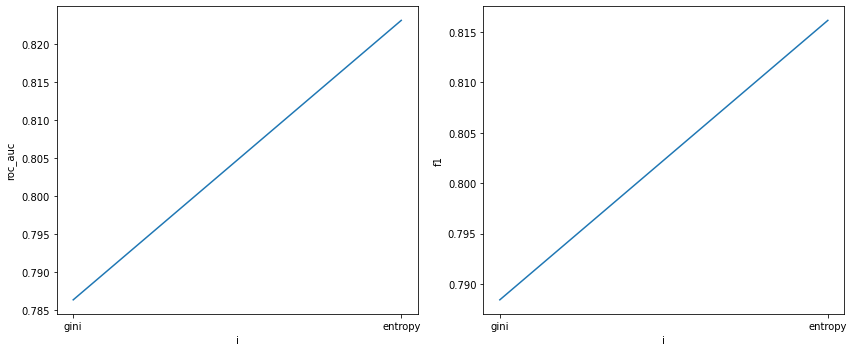

In [ ]:
plt.figure(figsize=(12,5))
criterio = []
cr = ['gini','entropy']
np.random.seed(100)
for i in cr:
  arvore  = DecisionTreeClassifier(criterion=i)
  arvore.fit(X_smote_hiperparametros, y_smote_hiperparametros)
  y_pred = arvore.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 =        f1_score(y_validacao, y_pred, average='macro')

  criterio.append([i, roc_auc, f1])

criterio = pd.DataFrame(criterio, columns=['i','roc_auc','f1'])
print(criterio.sort_values('roc_auc', ascending=False).head(5))
print(criterio.sort_values('f1', ascending=False).head(5))

plt.subplot(1,2,1)
sns.lineplot(x='i', y='roc_auc', data=criterio)
plt.subplot(1,2,2)
sns.lineplot(x='i', y='f1', data=criterio)
plt.tight_layout()

No handles with labels found to put in legend.


   i   roc_auc        f1
3  4  0.965201  0.537077
5  6  0.950173  0.624130
2  3  0.944625  0.539015
6  7  0.939390  0.749042
1  2  0.929013  0.509911
     i   roc_auc        f1
12  13  0.888558  0.773917
0    1  0.800785  0.769179
13  14  0.837199  0.756289
6    7  0.939390  0.749042
11  12  0.880790  0.737622


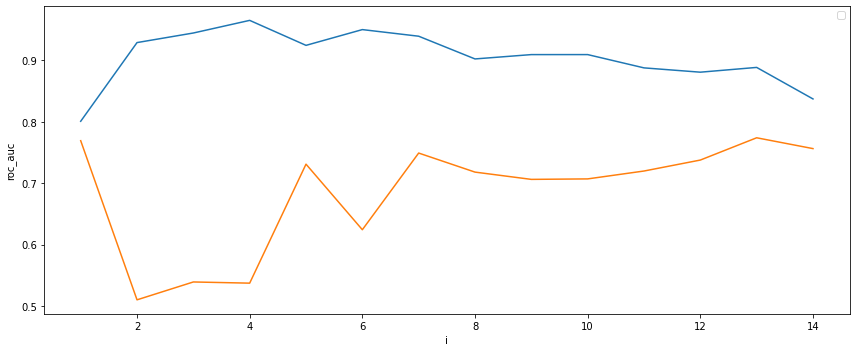

In [ ]:
plt.figure(figsize=(12,5))
depth = []
np.random.seed(100)
for i in range(1,15):
  arvore  = DecisionTreeClassifier(max_depth=i)
  arvore.fit(X_smote_hiperparametros, y_smote_hiperparametros)
  y_pred = arvore.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 =        f1_score(y_validacao, y_pred, average='macro')

  depth.append([i, roc_auc, f1])

depth = pd.DataFrame(depth, columns=['i','roc_auc','f1'])
print(depth.sort_values('roc_auc', ascending=False).head(5))
print(depth.sort_values('f1', ascending=False).head(5))


sns.lineplot(x='i', y='roc_auc', data=depth)
sns.lineplot(x='i', y='f1', data=depth)
plt.legend()
plt.tight_layout()

     i   roc_auc        f1
34  35  0.938657  0.708463
33  34  0.938657  0.708463
32  33  0.938657  0.708463
31  32  0.938625  0.706991
74  75  0.938163  0.687699
   i   roc_auc        f1
0  1  0.786318  0.788434
1  2  0.815491  0.778678
2  3  0.844536  0.758974
4  5  0.880918  0.746773
3  4  0.866308  0.746711


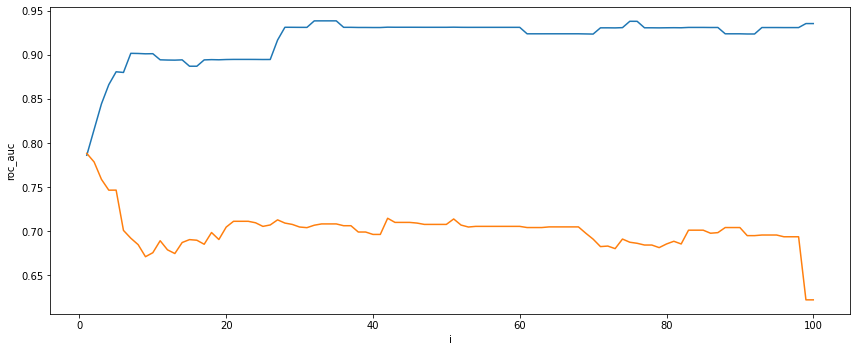

In [ ]:
plt.figure(figsize=(12,5))
leaf = []
np.random.seed(100)
for i in range(1,101,1):
  arvore  = DecisionTreeClassifier(min_samples_leaf=i)
  arvore.fit(X_smote_hiperparametros, y_smote_hiperparametros)
  y_pred = arvore.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 =        f1_score(y_validacao, y_pred, average='macro')

  leaf.append([i, roc_auc, f1])

leaf = pd.DataFrame(leaf, columns=['i','roc_auc','f1'])
print(leaf.sort_values('roc_auc', ascending=False).head(5))
print(leaf.sort_values('f1', ascending=False).head(5))

sns.lineplot(x='i', y='roc_auc', data=leaf)
sns.lineplot(x='i', y='f1', data=leaf)
plt.tight_layout()

     i   roc_auc        f1
91  93  0.895496  0.744560
90  92  0.895480  0.743442
87  89  0.895480  0.743442
92  94  0.895480  0.743442
86  88  0.895480  0.743442
    i   roc_auc        f1
7   9  0.823051  0.809429
8  10  0.823019  0.805109
4   6  0.786366  0.795024
3   5  0.786350  0.792795
9  11  0.815602  0.792031


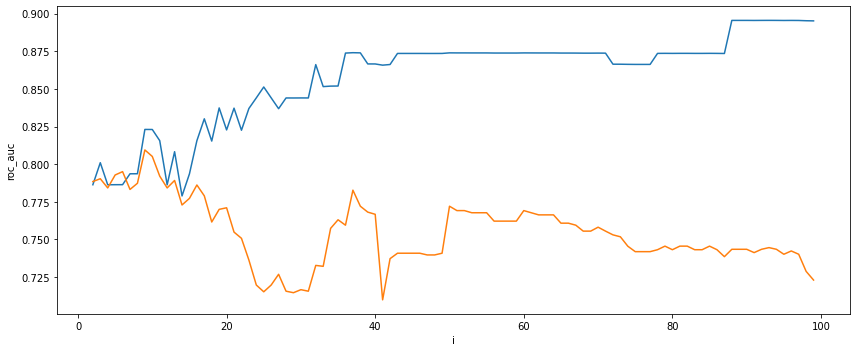

In [ ]:
plt.figure(figsize=(12,5))
split = []
np.random.seed(100)
for i in range(2,100,1):
  arvore  = DecisionTreeClassifier(min_samples_split=i)
  arvore.fit(X_smote_hiperparametros, y_smote_hiperparametros)
  y_pred = arvore.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 =        f1_score(y_validacao, y_pred, average='macro')

  split.append([i, roc_auc, f1])

split = pd.DataFrame(split, columns=['i','roc_auc','f1'])
print(split.sort_values('roc_auc', ascending=False).head(5))
print(split.sort_values('f1', ascending=False).head(5))

sns.lineplot(x='i', y='roc_auc', data=split)
sns.lineplot(x='i', y='f1', data=split)
plt.tight_layout()

# Arvore de decisao melhores parametros

In [ ]:
np.random.seed(100)

param_grid = {
    'max_depth': [3,4,6],
    'min_samples_leaf': [33,34,35],
    'min_samples_split':[89,92,93]
    }

model  = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = StratifiedKFold(n_splits=5), n_jobs=-1, verbose=3, scoring='roc_auc')

grid_search.fit(X_validacao, y_validacao)

print(grid_search.best_estimator_)
print(grid_search.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
DecisionTreeClassifier(max_depth=4, min_samples_leaf=33, min_samples_split=89)
0.9720839390517693


#Arvore de decisao teste do modelo

Acuracia: 99.62%
ROC_AUC: 77.01%
Recall 99.73%
Precision 66.61%
F1-score: 70.56%
              precision    recall  f1-score   support

           0       0.33      0.54      0.41        35
           1       1.00      1.00      1.00     14149

    accuracy                           1.00     14184
   macro avg       0.67      0.77      0.71     14184
weighted avg       1.00      1.00      1.00     14184



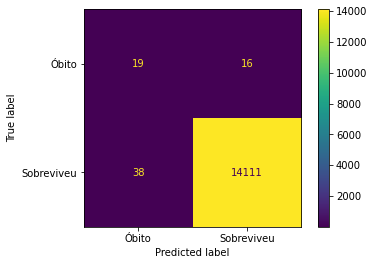

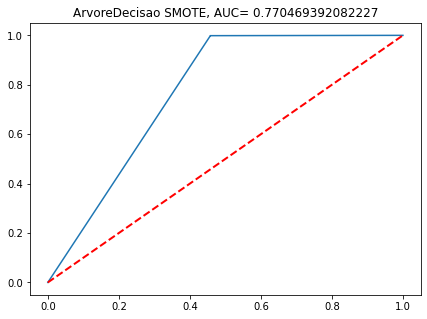

In [ ]:
arvore = AM('ArvoreDecisao SMOTE',DecisionTreeClassifier(), X_smote_resampled, y_smote_resampled, X_test, y_test)
smt.append(arvore)
finais_hiperparametros.append(arvore)

Acuracia: 91.79%
ROC_AUC: 94.46%
Recall 91.78%
Precision 51.42%
F1-score: 50.61%
              precision    recall  f1-score   support

           0       0.03      0.97      0.06        35
           1       1.00      0.92      0.96     14149

    accuracy                           0.92     14184
   macro avg       0.51      0.94      0.51     14184
weighted avg       1.00      0.92      0.95     14184



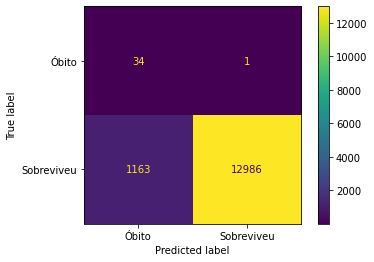

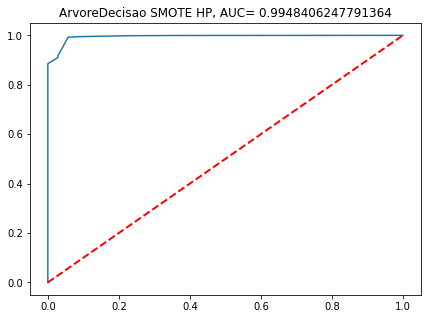

In [ ]:
arvore = AM('ArvoreDecisao SMOTE HP',DecisionTreeClassifier(max_depth=4, min_samples_leaf=33, min_samples_split=89), X_smote_resampled, y_smote_resampled, X_test, y_test)
smt.append(arvore)
finais_hiperparametros.append(arvore)

#Arvore cross_validate

In [ ]:
kf_score(DecisionTreeClassifier(),x_skf, y_skf)

DecisionTreeClassifier
----------
[0.98480543 0.99721309 0.99407072 0.9988459  0.99886124]
----------
ROC_AUC médio 5 folds: 99.48
Desvio padrão: 0.005274484935489943
Intervalo ROC_AUC: [98.95,100.0]


In [ ]:
kf_score(DecisionTreeClassifier(max_depth=7, max_features=19, min_samples_leaf=94,
                       min_samples_split=31),x_skf, y_skf)

DecisionTreeClassifier
----------
[0.98389303 0.99353876 0.99176018 0.9964661  0.99716367]
----------
ROC_AUC médio 5 folds: 99.26
Desvio padrão: 0.004757422922211143
Intervalo ROC_AUC: [98.78,99.72999999999999]


# Floresta aleatória SMOTE + gridsearchCV

   i   roc_auc        f1
0  1  0.959553  0.572059
3  4  0.959025  0.657340
6  7  0.953793  0.736453
4  5  0.953698  0.731067
1  2  0.951784  0.658101
     i   roc_auc        f1
34  35  0.823210  0.832983
18  19  0.830532  0.832975
13  14  0.874426  0.828610
35  36  0.823179  0.827991
30  31  0.815858  0.827885


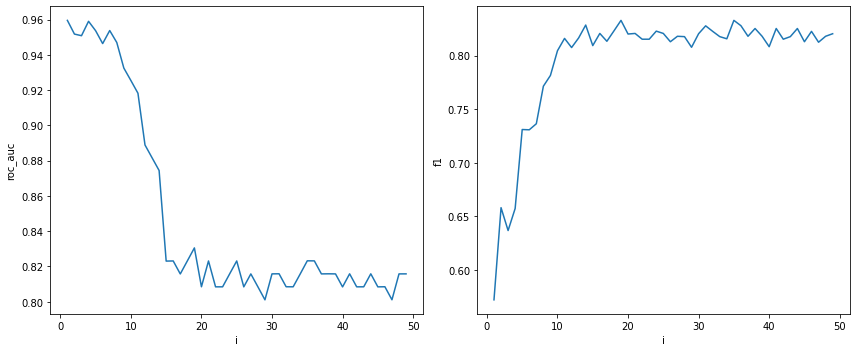

In [ ]:
plt.figure(figsize=(12,5))
depth = []
np.random.seed(100)
for i in range(1,50):
  floresta  = RandomForestClassifier(max_depth=i)
  floresta.fit(X_smote_hiperparametros, y_smote_hiperparametros)
  y_pred = floresta.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 =        f1_score(y_validacao, y_pred, average='macro')

  depth.append([i, roc_auc, f1])

depth = pd.DataFrame(depth, columns=['i','roc_auc','f1'])
print(depth.sort_values('roc_auc', ascending=False).head(5))
print(depth.sort_values('f1', ascending=False).head(5))

plt.subplot(1,2,1)
sns.lineplot(x='i', y='roc_auc', data=depth)
plt.subplot(1,2,2)
sns.lineplot(x='i', y='f1', data=depth)
plt.tight_layout()

     i   roc_auc        f1
18  19  0.954447  0.781052
32  33  0.954272  0.767544
28  29  0.954112  0.756327
40  41  0.954064  0.753140
39  40  0.953985  0.747998
   i   roc_auc        f1
1  2  0.896421  0.832903
2  3  0.932978  0.827283
0  1  0.815826  0.822934
3  4  0.925514  0.811269
4  5  0.925450  0.804673


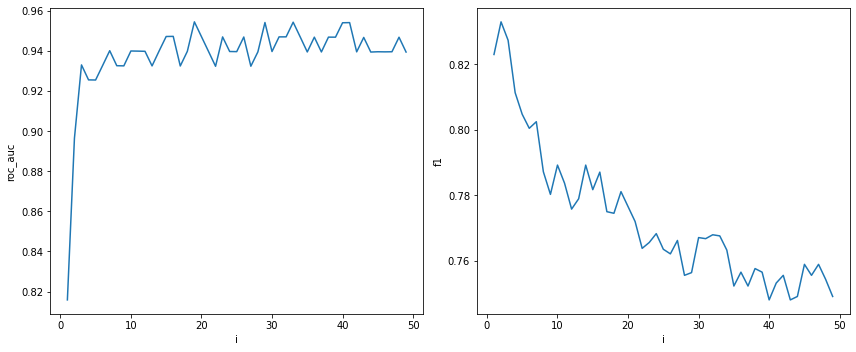

In [ ]:
plt.figure(figsize=(12,5))
leaf = []
np.random.seed(100)
for i in range(1,50,1):
  floresta  = RandomForestClassifier(min_samples_leaf=i)
  floresta.fit(X_smote_hiperparametros, y_smote_hiperparametros)
  y_pred = floresta.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 =        f1_score(y_validacao, y_pred, average='macro')

  leaf.append([i, roc_auc, f1])

leaf = pd.DataFrame(leaf, columns=['i','roc_auc','f1'])
print(leaf.sort_values('roc_auc', ascending=False).head(5))
print(leaf.sort_values('f1', ascending=False).head(5))

plt.subplot(1,2,1)
sns.lineplot(x='i', y='roc_auc', data=leaf)
plt.subplot(1,2,2)
sns.lineplot(x='i', y='f1', data=leaf)
plt.tight_layout()

     i   roc_auc        f1
28  68  0.911095  0.836919
24  64  0.910999  0.825103
17  57  0.903646  0.821151
12  52  0.896405  0.830850
9   49  0.896405  0.830850
     i   roc_auc        f1
28  68  0.911095  0.836919
14  54  0.889100  0.832911
9   49  0.896405  0.830850
12  52  0.896405  0.830850
7   47  0.881763  0.830787


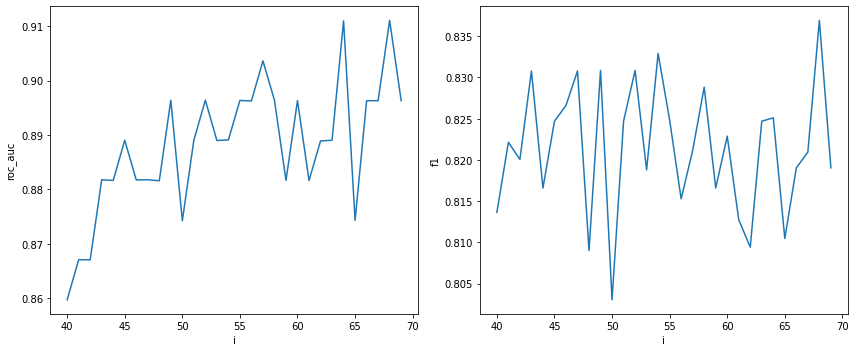

In [ ]:
plt.figure(figsize=(12,5))
split = []
np.random.seed(100)
for i in range(40,70,1):
  floresta  = RandomForestClassifier(min_samples_split=i)
  floresta.fit(X_smote_hiperparametros, y_smote_hiperparametros)
  y_pred = floresta.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 =        f1_score(y_validacao, y_pred, average='macro')

  split.append([i, roc_auc, f1])

split = pd.DataFrame(split, columns=['i','roc_auc','f1'])
print(split.sort_values('roc_auc', ascending=False).head(5))
print(split.sort_values('f1', ascending=False).head(5))

plt.subplot(1,2,1)
sns.lineplot(x='i', y='roc_auc', data=split)
plt.subplot(1,2,2)
sns.lineplot(x='i', y='f1', data=split)
plt.tight_layout()

      i   roc_auc        f1
10   60  0.837837  0.830560
47   97  0.830563  0.838003
22   72  0.830500  0.828092
6    56  0.823226  0.835535
54  104  0.823210  0.832983
      i   roc_auc        f1
47   97  0.830563  0.838003
6    56  0.823226  0.835535
54  104  0.823210  0.832983
10   60  0.837837  0.830560
19   69  0.823195  0.830468


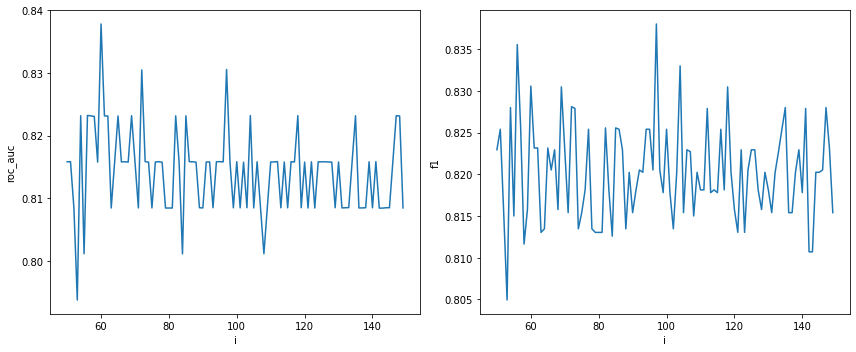

In [ ]:
plt.figure(figsize=(12,5))
n = []
np.random.seed(100)
for i in range(50,150,1):

  floresta  = RandomForestClassifier(n_estimators=i)
  floresta.fit(X_smote_hiperparametros, y_smote_hiperparametros)
  y_pred = floresta.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 = f1_score(y_validacao, y_pred, average='macro')

  n.append([i, roc_auc, f1])

n = pd.DataFrame(n, columns=['i','roc_auc','f1'])
print(n.sort_values('roc_auc', ascending=False).head(5))
print(n.sort_values('f1', ascending=False).head(5))

plt.subplot(1,2,1)
sns.lineplot(x='i', y='roc_auc', data=n)
plt.subplot(1,2,2)
sns.lineplot(x='i', y='f1', data=n)
plt.tight_layout()

# Floresta aleatória melhores parametros

In [ ]:
np.random.seed(100)

param_grid = {
    'criterion':['gini','entropy'],
    'bootstrap':[True, False],
    'max_depth': [1,4,7],
    'min_samples_leaf': [19,33,29],
    'min_samples_split': [57,64,68],
    'n_estimators': [60,72,97]
}

model  = RandomForestClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = StratifiedKFold(n_splits=5), n_jobs=-1, verbose=3, scoring='roc_auc')

grid_search.fit(X_validacao, y_validacao)

print(grid_search.best_estimator_)
print(grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=33,
                       min_samples_split=57, n_estimators=72)
0.9913655359906693


#Floresta aleatória teste do modelo

Acuracia: 99.73%
ROC_AUC: 85.62%
Recall 99.8%
Precision 73.55%
F1-score: 78.34%
              precision    recall  f1-score   support

           0       0.47      0.71      0.57        35
           1       1.00      1.00      1.00     14149

    accuracy                           1.00     14184
   macro avg       0.74      0.86      0.78     14184
weighted avg       1.00      1.00      1.00     14184



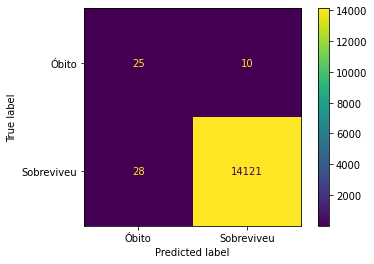

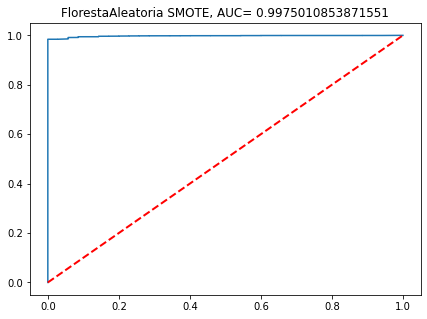

In [ ]:
floresta = AM('FlorestaAleatoria SMOTE',RandomForestClassifier(), X_smote_resampled, y_smote_resampled, X_test, y_test)
finais_hiperparametros.append(floresta)

Acuracia: 99.06%
ROC_AUC: 98.1%
Recall 99.07%
Precision 60.24%
F1-score: 66.68%
              precision    recall  f1-score   support

           0       0.20      0.97      0.34        35
           1       1.00      0.99      1.00     14149

    accuracy                           0.99     14184
   macro avg       0.60      0.98      0.67     14184
weighted avg       1.00      0.99      0.99     14184



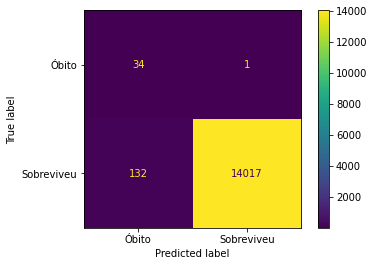

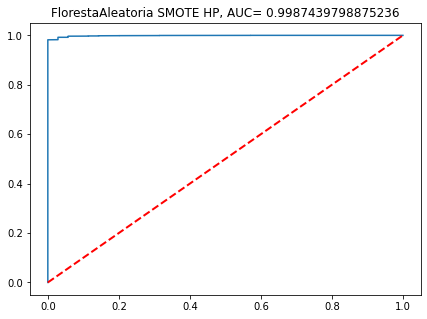

In [ ]:
floresta = AM('FlorestaAleatoria SMOTE HP',RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=33,
                       min_samples_split=57, n_estimators=72), X_smote_resampled, y_smote_resampled, X_test, y_test)
smt.append(floresta)
finais_hiperparametros.append(floresta)

#Floresta cross_validate

In [ ]:
kf_score(RandomForestClassifier(),x_skf, y_skf)

RandomForestClassifier
----------
[0.9980024  0.99882129 0.99951402 0.99989793 0.9997564 ]
----------
ROC_AUC médio 5 folds: 99.92
Intervalo ROC_AUC: [99.85000000000001,99.99]


In [ ]:
kf_score(RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=25,
                       n_estimators=74),x_skf, y_skf)

RandomForestClassifier
----------
[0.9901568  0.99677454 0.99537208 0.997007   0.9986493 ]
----------
ROC_AUC médio 5 folds: 99.56
Intervalo ROC_AUC: [99.27,99.85000000000001]


# Adaboost SMOTE + gridsearchCV

   i   roc_auc        f1
4  5  0.932165  0.998195
3  4  0.932101  0.998131
5  6  0.932101  0.998131
8  9  0.931830  0.997859
6  7  0.931734  0.997763
     i   roc_auc        f1
86  87  0.874538  0.999266
85  86  0.881859  0.999250
84  85  0.874506  0.999234
67  68  0.874506  0.999234
83  84  0.881843  0.999234


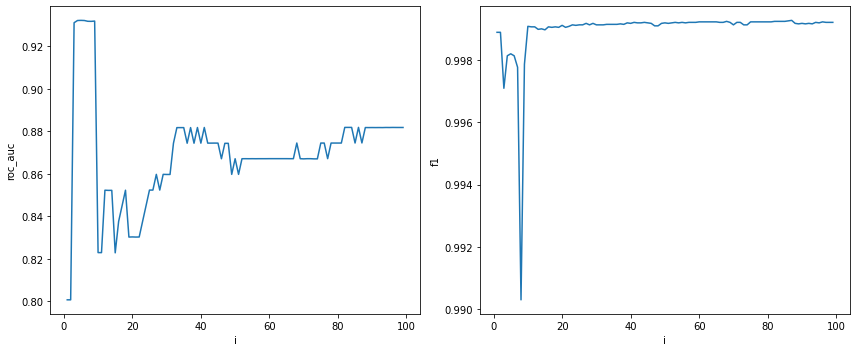

In [ ]:
plt.figure(figsize=(12,5))
n = []
np.random.seed(100)
for i in range(1,100,1):

  ada  = AdaBoostClassifier(n_estimators=i)
  ada.fit(X_smote_hiperparametros, y_smote_hiperparametros)
  y_pred = ada.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 = f1_score(y_validacao, y_pred)

  n.append([i, roc_auc, f1])

n = pd.DataFrame(n, columns=['i','roc_auc','f1'])
print(n.sort_values('roc_auc', ascending=False).head(5))
print(n.sort_values('f1', ascending=False).head(5))

plt.subplot(1,2,1)
sns.lineplot(x='i', y='roc_auc', data=n)
plt.subplot(1,2,2)
sns.lineplot(x='i', y='f1', data=n)
plt.tight_layout()

      i   roc_auc        f1
3  0.20  0.932659  0.998691
0  0.05  0.932372  0.998403
1  0.10  0.932340  0.998371
7  0.40  0.925546  0.998915
6  0.35  0.925514  0.998883
       i   roc_auc        f1
19  1.00  0.867121  0.999187
18  0.95  0.874410  0.999139
12  0.65  0.889084  0.999139
11  0.60  0.896421  0.999139
14  0.75  0.896389  0.999107


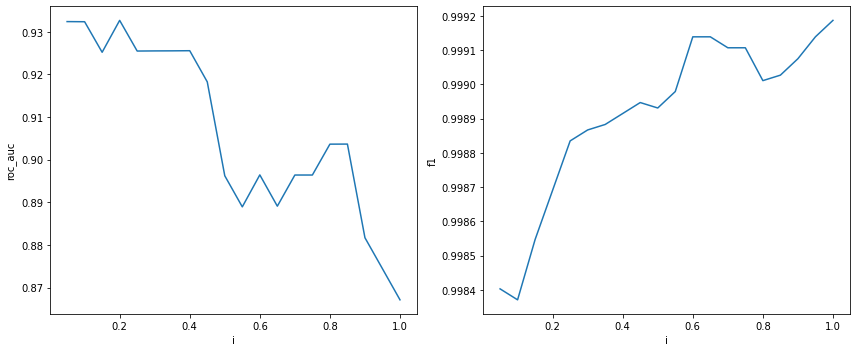

In [ ]:
plt.figure(figsize=(12,5))

np.random.seed(100)
lr = []
lr_range = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,
            0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,
            0.8,0.85,0.9,0.95,1]
np.random.seed(100)
for i in lr_range:
  ada  = AdaBoostClassifier(learning_rate=i)
  ada.fit(X_smote_hiperparametros, y_smote_hiperparametros)
  y_pred = ada.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 = f1_score(y_validacao, y_pred)

  lr.append([i, roc_auc, f1])

lr = pd.DataFrame(lr, columns=['i','roc_auc','f1'])
print(lr.sort_values('roc_auc', ascending=False).head(5))
print(lr.sort_values('f1', ascending=False).head(5))

plt.subplot(1,2,1)
sns.lineplot(x='i', y='roc_auc', data=lr)
plt.subplot(1,2,2)
sns.lineplot(x='i', y='f1', data=lr)
plt.tight_layout()

# AdaBoost melhores parametros

In [ ]:
%%time
np.random.seed(100)

param_grid = {
    'learning_rate': [0.05,0.1,0.2,0.4,0.35],
    'n_estimators': [4,5,6,9]
}

model = AdaBoostClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = StratifiedKFold(n_splits=5), n_jobs=-1, verbose=3, scoring='roc_auc')

grid_search.fit(X_validacao, y_validacao)

print(grid_search.best_estimator_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
AdaBoostClassifier(learning_rate=0.4, n_estimators=9)
CPU times: user 1.18 s, sys: 131 ms, total: 1.31 s
Wall time: 16.5 s


# AdaBoost teste do modelo

Acuracia: 99.47%
ROC_AUC: 98.31%
Recall 99.48%
Precision 65.74%
F1-score: 73.64%
              precision    recall  f1-score   support

           0       0.31      0.97      0.48        35
           1       1.00      0.99      1.00     14149

    accuracy                           0.99     14184
   macro avg       0.66      0.98      0.74     14184
weighted avg       1.00      0.99      1.00     14184



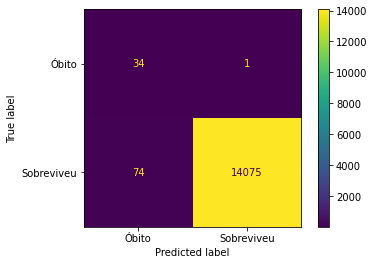

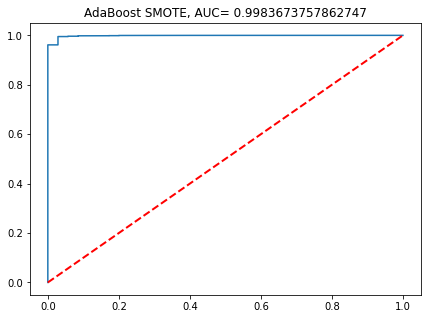

In [ ]:
adaboost = AM('AdaBoost SMOTE',AdaBoostClassifier(), X_smote_resampled, y_smote_resampled, X_test, y_test)
smt.append(adaboost)
finais_hiperparametros.append(adaboost)

Acuracia: 99.38%
ROC_AUC: 96.84%
Recall 99.39%
Precision 63.86%
F1-score: 71.27%
              precision    recall  f1-score   support

           0       0.28      0.94      0.43        35
           1       1.00      0.99      1.00     14149

    accuracy                           0.99     14184
   macro avg       0.64      0.97      0.71     14184
weighted avg       1.00      0.99      1.00     14184



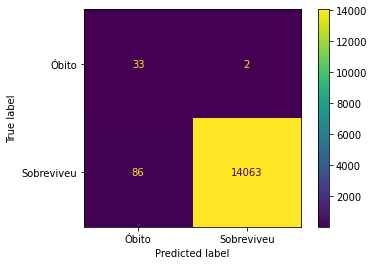

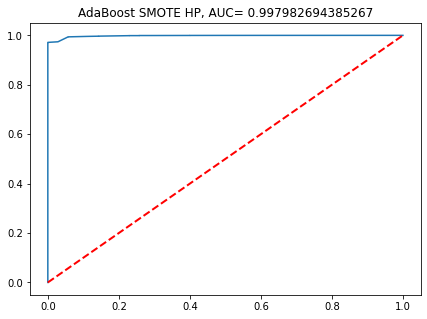

In [ ]:
adaboost = AM('AdaBoost SMOTE HP',AdaBoostClassifier(learning_rate=0.4, n_estimators=9), X_smote_resampled, y_smote_resampled, X_test, y_test)
smt.append(adaboost)
finais_hiperparametros.append(adaboost)

#Adaboost cross_validate

In [ ]:
kf_score(AdaBoostClassifier(),x_skf, y_skf)

AdaBoostClassifier
----------
[0.98734068 0.99538711 0.99285215 0.99633724 0.99691652]
----------
ROC_AUC médio 5 folds: 99.38
Intervalo ROC_AUC: [99.03,99.72999999999999]


In [ ]:
kf_score(AdaBoostClassifier(algorithm='SAMME', learning_rate=0.95, n_estimators=59),x_skf, y_skf)

AdaBoostClassifier
----------
[0.98741271 0.9949157  0.99236771 0.99668046 0.99716592]
----------
ROC_AUC médio 5 folds: 99.37
Intervalo ROC_AUC: [99.00999999999999,99.72999999999999]


# XGBoost SMOTE + gridsearchCV

No handles with labels found to put in legend.


   i   roc_auc        f1
3  4  0.940523  0.854639
1  2  0.939965  0.793447
0  1  0.939151  0.734216
2  3  0.932962  0.825464
4  5  0.896580  0.854912
     i   roc_auc        f1
9   10  0.867360  0.867360
10  11  0.874665  0.863983
8    9  0.860007  0.862668
5    6  0.889275  0.857773
11  12  0.867296  0.856824


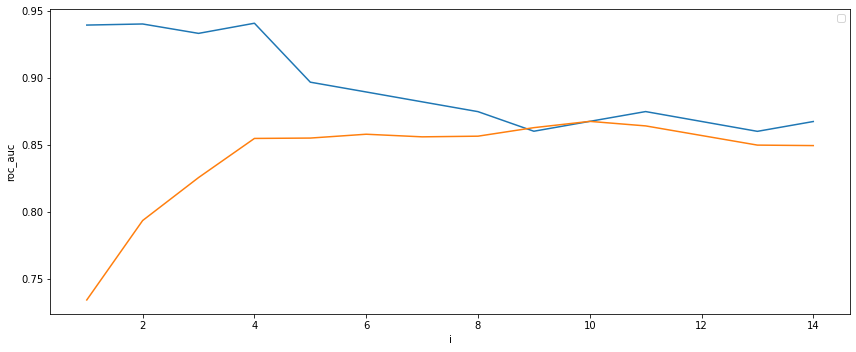

In [ ]:
plt.figure(figsize=(12,5))
depth = []
np.random.seed(100)
for i in range(1,15):
  xgb_class = xgb.XGBClassifier(max_depth=i)
  xgb_class.fit(X_smote_hiperparametros, y_smote_hiperparametros)
  y_pred = xgb_class.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 =        f1_score(y_validacao, y_pred, average='macro')

  depth.append([i, roc_auc, f1])

depth = pd.DataFrame(depth, columns=['i','roc_auc','f1'])
print(depth.sort_values('roc_auc', ascending=False).head(5))
print(depth.sort_values('f1', ascending=False).head(5))


sns.lineplot(x='i', y='roc_auc', data=depth)
sns.lineplot(x='i', y='f1', data=depth)
plt.legend()
plt.tight_layout()

      i   roc_auc        f1
0  0.05  0.939693  0.998387
3  0.20  0.933186  0.999218
4  0.25  0.933138  0.999170
2  0.15  0.933106  0.999138
1  0.10  0.932962  0.998995
       i   roc_auc        f1
16  0.85  0.896596  0.999314
15  0.80  0.903933  0.999314
18  0.95  0.889227  0.999282
17  0.90  0.889227  0.999282
10  0.55  0.903886  0.999266


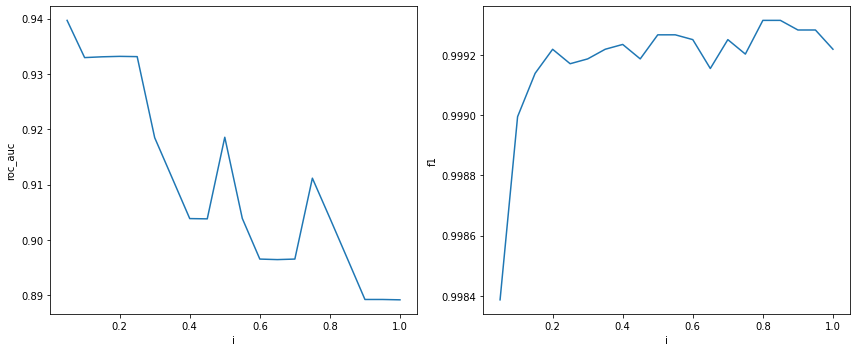

In [ ]:
plt.figure(figsize=(12,5))
lr = []
lr_range = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,
            0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,
            0.8,0.85,0.9,0.95,1]
np.random.seed(100)

for i in lr_range:
  xgb_class = xgb.XGBClassifier(learning_rate=i)
  xgb_class.fit(X_smote_hiperparametros, y_smote_hiperparametros)
  y_pred = xgb_class.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 = f1_score(y_validacao, y_pred)

  lr.append([i, roc_auc, f1])

lr = pd.DataFrame(lr, columns=['i','roc_auc','f1'])
print(lr.sort_values('roc_auc', ascending=False).head(5))
print(lr.sort_values('f1', ascending=False).head(5))

plt.subplot(1,2,1)
sns.lineplot(x='i', y='roc_auc', data=lr)
plt.subplot(1,2,2)
sns.lineplot(x='i', y='f1', data=lr)
plt.tight_layout()

     i   roc_auc        f1
17  77  0.940140  0.998835
18  78  0.940140  0.998835
16  76  0.940108  0.998803
14  74  0.940092  0.998787
13  73  0.940092  0.998787
      i   roc_auc        f1
79  139  0.933042  0.999074
73  133  0.933042  0.999074
65  125  0.933042  0.999074
66  126  0.933042  0.999074
67  127  0.933042  0.999074


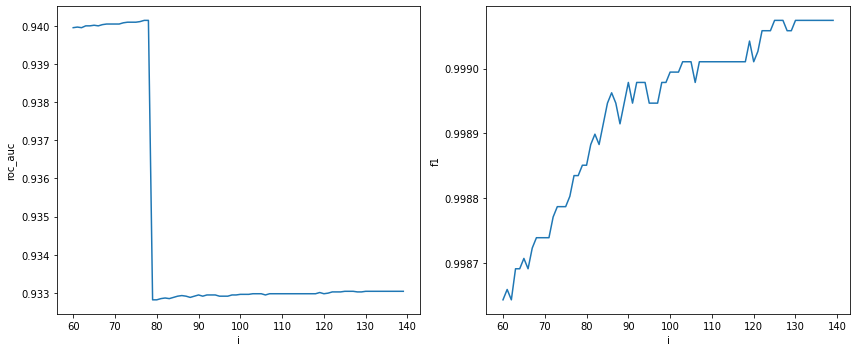

In [ ]:
plt.figure(figsize=(12,5))
n = []
np.random.seed(100)
for i in range(60,140,1):

  xgb_class = xgb.XGBClassifier(n_estimators=i)
  xgb_class.fit(X_smote_hiperparametros, y_smote_hiperparametros)
  y_pred = xgb_class.predict(X_validacao)

  roc_auc = roc_auc_score(y_validacao, y_pred)
  f1 = f1_score(y_validacao, y_pred)

  n.append([i, roc_auc, f1])

n = pd.DataFrame(n, columns=['i','roc_auc','f1'])
print(n.sort_values('roc_auc', ascending=False).head(5))
print(n.sort_values('f1', ascending=False).head(5))

plt.subplot(1,2,1)
sns.lineplot(x='i', y='roc_auc', data=n)
plt.subplot(1,2,2)
sns.lineplot(x='i', y='f1', data=n)
plt.tight_layout()

# XGBoost melhores parametros

In [ ]:
%%time
np.random.seed(100)

param_grid = {
    'learning_rate':[0.05,0.2,0.25,0.15],
    'max_depth':[1,2,4],
    'n_estimators': [76,77,78]
}


model = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = StratifiedKFold(n_splits=5), verbose=3, n_jobs=-1, scoring='roc_auc')

grid_search.fit(X_validacao, y_validacao)

print(grid_search.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
XGBClassifier(learning_rate=0.2, max_depth=2, n_estimators=77)
CPU times: user 3.71 s, sys: 286 ms, total: 4 s
Wall time: 2min 51s


# XGBoost testando modelo

Acuracia: 99.15%
ROC_AUC: 96.73%
Recall 99.17%
Precision 60.92%
F1-score: 67.53%
              precision    recall  f1-score   support

           0       0.22      0.94      0.35        35
           1       1.00      0.99      1.00     14149

    accuracy                           0.99     14184
   macro avg       0.61      0.97      0.68     14184
weighted avg       1.00      0.99      0.99     14184



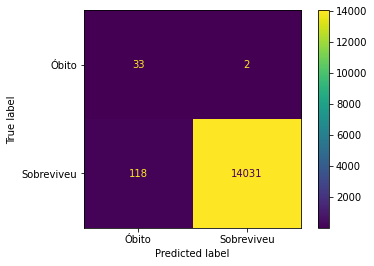

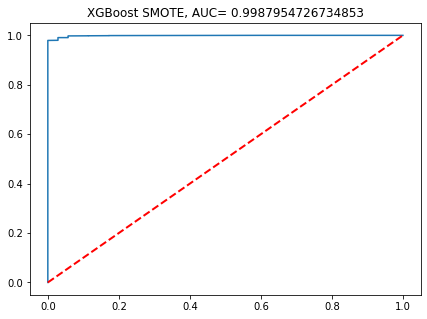

In [ ]:
xgb_class = AM('XGBoost SMOTE',xgb.XGBClassifier(), X_smote_resampled, y_smote_resampled, X_test, y_test)
smt.append(xgb_class)
finais_hiperparametros.append(xgb_class)

Acuracia: 99.21%
ROC_AUC: 98.18%
Recall 99.22%
Precision 61.72%
F1-score: 68.69%
              precision    recall  f1-score   support

           0       0.23      0.97      0.38        35
           1       1.00      0.99      1.00     14149

    accuracy                           0.99     14184
   macro avg       0.62      0.98      0.69     14184
weighted avg       1.00      0.99      0.99     14184



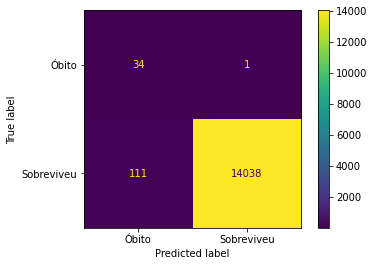

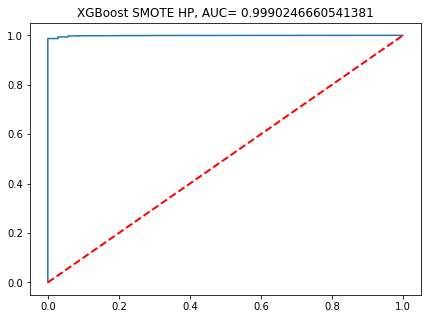

In [ ]:
xgb_class = AM('XGBoost SMOTE HP',xgb.XGBClassifier(learning_rate=0.2, max_depth=2, n_estimators=77), X_smote_resampled, y_smote_resampled, X_test, y_test)
smt.append(xgb_class)
finais_hiperparametros.append(xgb_class)

# Regressao logistica SMOTE

Acuracia: 98.54%
ROC_AUC: 96.42%
Recall 98.55%
Precision 56.93%
F1-score: 61.72%
              precision    recall  f1-score   support

           0       0.14      0.94      0.24        35
           1       1.00      0.99      0.99     14149

    accuracy                           0.99     14184
   macro avg       0.57      0.96      0.62     14184
weighted avg       1.00      0.99      0.99     14184



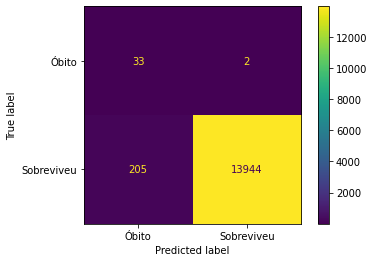

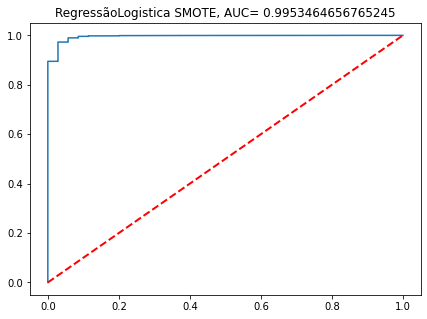

In [ ]:
logistic = AM('RegressãoLogistica SMOTE',LogisticRegression(max_iter=1000), X_smote_resampled, y_smote_resampled, X_test, y_test)
smt.append(logistic)
finais_hiperparametros.append(logistic)

Acuracia: 98.51%
ROC_AUC: 96.4%
Recall 98.52%
Precision 56.78%
F1-score: 61.49%
              precision    recall  f1-score   support

           0       0.14      0.94      0.24        35
           1       1.00      0.99      0.99     14149

    accuracy                           0.99     14184
   macro avg       0.57      0.96      0.61     14184
weighted avg       1.00      0.99      0.99     14184



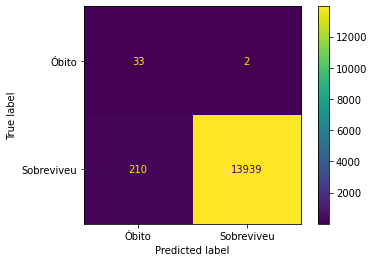

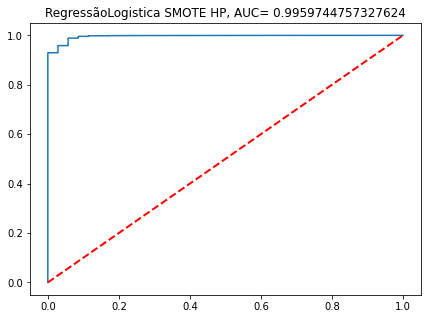

In [ ]:
logistic = AM('RegressãoLogistica SMOTE HP',LogisticRegressionCV(max_iter=1000), X_smote_resampled, y_smote_resampled, X_test, y_test)
smt.append(logistic)
finais_hiperparametros.append(logistic)

# Métricas dos modelos com SMOTE

In [ ]:
smt_df = pd.DataFrame(smt, columns=['Modelo','Acuracia','ROC_AUC','Recall','Precisão','F1-score'])
smt_df.drop_duplicates(subset=['Modelo'],keep='last', inplace=True)
smt_df

Modelo   Acuracia    ROC_AUC     Recall   Precisão  \
0          ArvoreDecisao SMOTE  99.633390  77.015640  99.745565  67.216106   
1       ArvoreDecisao SMOTE HP  91.793570  94.461597  91.780338  51.416367   
2   FlorestaAleatoria SMOTE HP  98.949521  98.048423  98.953990  59.337088   
3               AdaBoost SMOTE  99.478285  98.313460  99.484062  65.884299   
4            AdaBoost SMOTE HP  99.379583  96.838949  99.392183  63.858436   
5                XGBoost SMOTE  99.146926  98.147370  99.151884  61.035397   
6             XGBoost SMOTE HP  99.118725  98.133235  99.123613  60.755929   
7     RegressãoLogistica SMOTE  98.477157  96.386620  98.487526  56.672987   
8  RegressãoLogistica SMOTE HP  98.470107  96.383086  98.480458  56.646050   

    F1-score  
0  71.019167  
1  50.614988  
2  65.403559  
3  73.812577  
4  71.272620  
5  67.774719  
6  67.394752  
7  61.317594  
8  61.274450

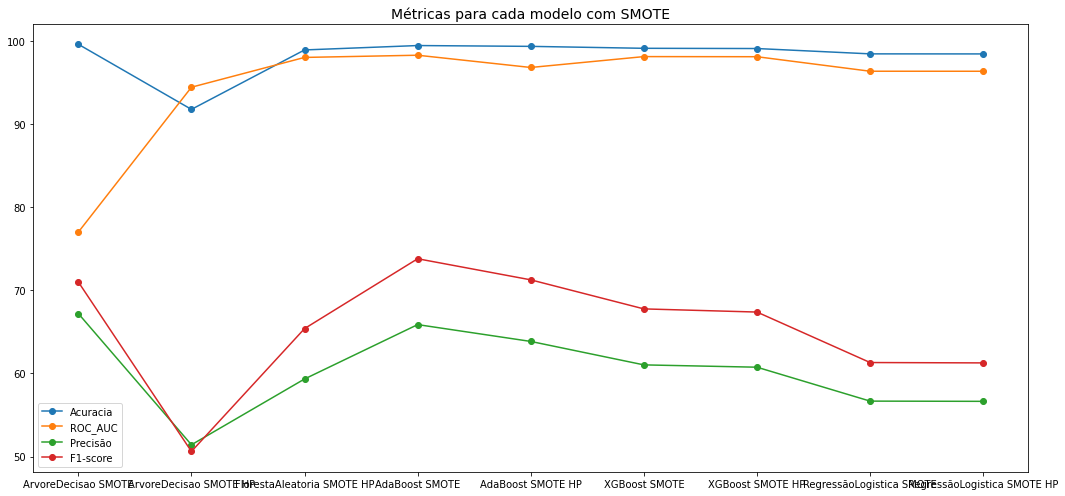

In [ ]:
plt.figure(figsize=(15,7))

plt.title('Métricas para cada modelo com SMOTE', fontsize=14)
plt.plot(smt_df.Modelo, smt_df.drop(columns=['Modelo','Recall']), marker='o');
plt.legend(smt_df.drop(columns=['Modelo','Recall']));

plt.tight_layout()

# Avaliando qual modelo desempenhou melhor

In [ ]:
finais_hiperparametros_df = pd.DataFrame(finais_hiperparametros, columns=['Modelo','Acuracia','ROC_AUC','Recall','Precisão','F1-score'])
finais_hiperparametros_df.drop_duplicates(subset=['Modelo'],keep='last', inplace=True)
finais_hiperparametros_df

Modelo   Acuracia    ROC_AUC     Recall  \
0           ArvoreDecisao Undersampling  97.828539  96.061509  97.837303   
1        ArvoreDecisao Undersampling HP  99.132826  98.140303  99.137748   
2       FlorestaAleatoria Undersampling  99.020023  96.658724  99.031734   
3    FlorestaAleatoria Undersampling HP  99.055274  99.526468  99.052937   
4                AdaBoost Undersampling  99.309081  99.653686  99.307372   
6             AdaBoost Undersampling HP  99.309081  98.228648  99.314439   
7                 XGBoost Undersampling  99.217428  99.607746  99.215492   
8              XGBoost Undersampling HP  99.168077  98.157972  99.173086   
9                   ArvoreDecisao SMOTE  99.619289  77.008572  99.731430   
10               ArvoreDecisao SMOTE HP  91.793570  94.461597  91.780338   
11              FlorestaAleatoria SMOTE  99.732092  85.615339  99.802106   
12           FlorestaAleatoria SMOTE HP  99.062324  98.104965  99.067072   
13                       AdaBoost SMOTE  99.471235  98.309926  99.476995   
14                    AdaBoost SMOTE HP  99.379583  96.838949  99.392183   
15                        XGBoost SMOTE  99.153976  96.725867  99.166019   
16                     XGBoost SMOTE HP  99.210378  98.179175  99.215492   
17             RegressãoLogistica SMOTE  98.540609  96.418424  98.551134   
18          RegressãoLogistica SMOTE HP  98.505358  96.400755  98.515796   
19     RegressãoLogistica Undersampling  98.745065  97.945943  98.749028   
20  RegressãoLogistica Undersampling HP  98.730964  97.938875  98.734893   

     Precisão   F1-score  
0   54.860034  58.273412  
1   60.893872  67.582784  
2   59.698747  65.850783  
3   60.355030  66.918970  
4   63.157895  70.659574  
6   62.973541  70.308181  
7   61.986301  69.140117  
8   61.254715  68.070216  
9   66.610038  70.556687  
10  51.416367  50.614988  
11  73.549522  78.341906  
12  60.237397  66.679331  
13  65.737189  73.643363  
14  63.858436  71.272620  
15  60.920026  67.529034  
16  61.720576  68.690223  
17  56.925603  61.719519  
18  56.782950  61.493145  
19  58.053294  63.504660  
20  57.977642  63.389621

In [ ]:
best_score = finais_hiperparametros_df.sort_values(by='ROC_AUC', ascending=False)
best_score

Modelo   Acuracia    ROC_AUC     Recall  \
4                AdaBoost Undersampling  99.309081  99.653686  99.307372   
7                 XGBoost Undersampling  99.217428  99.607746  99.215492   
3    FlorestaAleatoria Undersampling HP  99.055274  99.526468  99.052937   
13                       AdaBoost SMOTE  99.471235  98.309926  99.476995   
6             AdaBoost Undersampling HP  99.309081  98.228648  99.314439   
16                     XGBoost SMOTE HP  99.210378  98.179175  99.215492   
8              XGBoost Undersampling HP  99.168077  98.157972  99.173086   
1        ArvoreDecisao Undersampling HP  99.132826  98.140303  99.137748   
12           FlorestaAleatoria SMOTE HP  99.062324  98.104965  99.067072   
19     RegressãoLogistica Undersampling  98.745065  97.945943  98.749028   
20  RegressãoLogistica Undersampling HP  98.730964  97.938875  98.734893   
14                    AdaBoost SMOTE HP  99.379583  96.838949  99.392183   
15                        XGBoost SMOTE  99.153976  96.725867  99.166019   
2       FlorestaAleatoria Undersampling  99.020023  96.658724  99.031734   
17             RegressãoLogistica SMOTE  98.540609  96.418424  98.551134   
18          RegressãoLogistica SMOTE HP  98.505358  96.400755  98.515796   
0           ArvoreDecisao Undersampling  97.828539  96.061509  97.837303   
10               ArvoreDecisao SMOTE HP  91.793570  94.461597  91.780338   
11              FlorestaAleatoria SMOTE  99.732092  85.615339  99.802106   
9                   ArvoreDecisao SMOTE  99.619289  77.008572  99.731430   

     Precisão   F1-score  
4   63.157895  70.659574  
7   61.986301  69.140117  
3   60.355030  66.918970  
13  65.737189  73.643363  
6   62.973541  70.308181  
16  61.720576  68.690223  
8   61.254715  68.070216  
1   60.893872  67.582784  
12  60.237397  66.679331  
19  58.053294  63.504660  
20  57.977642  63.389621  
14  63.858436  71.272620  
15  60.920026  67.529034  
2   59.698747  65.850783  
17  56.925603  61.719519  
18  56.782950  61.493145  
0   54.860034  58.273412  
10  51.416367  50.614988  
11  73.549522  78.341906  
9   66.610038  70.556687

In [ ]:
best_score[:5]

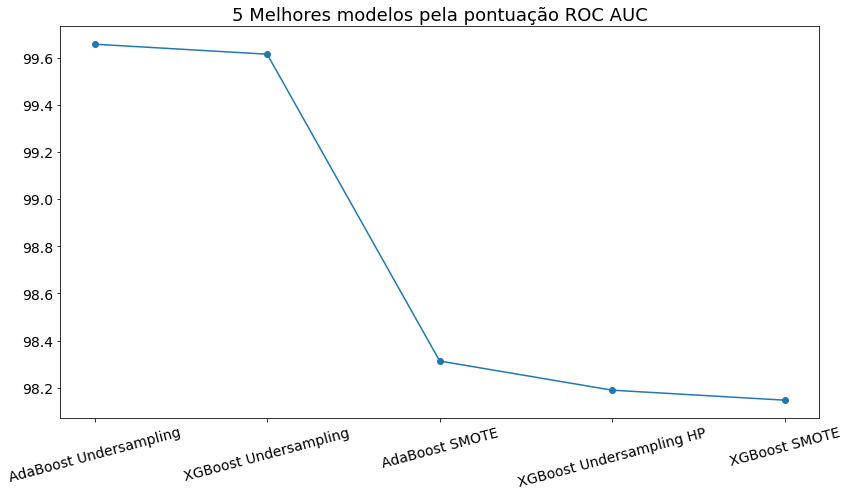

In [ ]:
plt.figure(figsize=(12,7))

plt.title('5 Melhores modelos pela pontuação ROC AUC', fontsize=18)
plt.plot(best_score[:5].Modelo, best_score[:5].ROC_AUC, marker='o');
plt.xticks(fontsize=14, rotation=15)
plt.yticks(fontsize=14)
plt.tight_layout()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

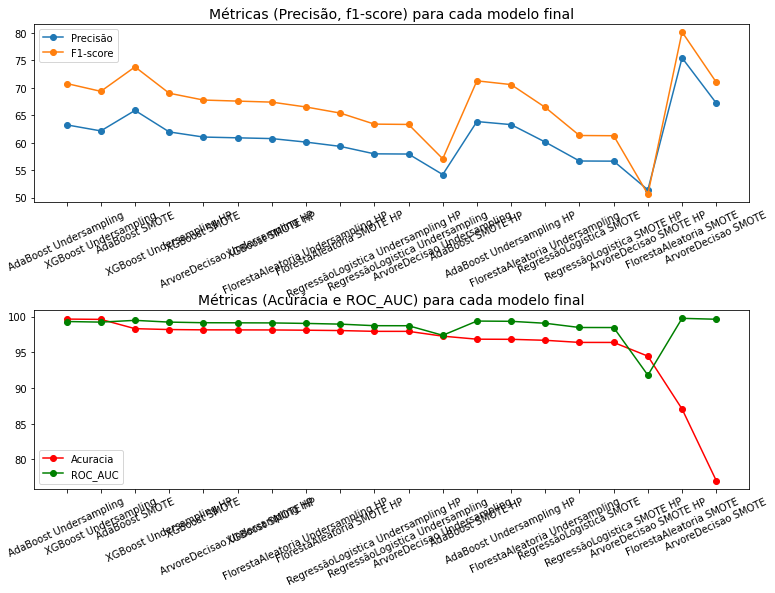

In [ ]:
plt.figure(figsize=(11,7))
metrics = ['ROC_AUC','Acuracia']
colors = ['r','g']

plt.subplot(2,1,1)
plt.title('Métricas (Precisão, f1-score) para cada modelo final', fontsize=14)
plt.plot(best_score.Modelo, best_score.drop(columns=['Modelo','Recall','Acuracia','ROC_AUC']), marker='o');
plt.legend(best_score.drop(columns=['Modelo','Recall','Acuracia','ROC_AUC']));
plt.xticks(rotation=25)
plt.tight_layout()

plt.subplot(2,1,2)
plt.title('Métricas (Acurácia e ROC_AUC) para cada modelo final', fontsize=14)
for metric, color in zip(metrics, colors):
  plt.plot(best_score.Modelo, best_score[metric], marker='o', color=color);
plt.legend(best_score.drop(columns=['Modelo','Recall','Precisão','F1-score']));
plt.xticks(rotation=25)

Undersampling desempenhou melhor e com menor custo computacional

# teste para identificar os casos de erro do modelo

Acuracia: 99.32%
ROC_AUC: 99.66%
Recall 99.66%
Precision 63.26%
F1-score: 70.79%
              precision    recall  f1-score   support

           0       0.27      1.00      0.42        35
           1       1.00      0.99      1.00     14149

    accuracy                           0.99     14184
   macro avg       0.63      1.00      0.71     14184
weighted avg       1.00      0.99      1.00     14184



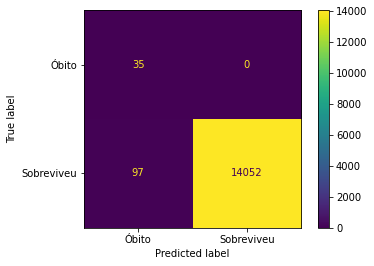

In [ ]:
np.random.seed(100)
modelos = []
modelo  = AdaBoostClassifier()
modelo.fit(X_under_resampled, y_under_resampled)
y_pred = modelo.predict(X_test)

acuracia = accuracy_score(y_test, y_pred,)
roc_auc = roc_auc_score(y_test, y_pred,  average='macro')
recall = recall_score(y_test, y_pred, average='macro')
precision = precision_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print(f'Acuracia: {round(acuracia*100,2)}%')
print(f'ROC_AUC: {round(roc_auc*100,2)}%')
print(f'Recall {round(recall*100,2)}%')
print(f'Precision {round(precision*100,2)}%')
print(f'F1-score: {round(f1*100,2)}%')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=modelo.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Óbito','Sobreviveu'])
disp.plot();

predicoes = pd.DataFrame(y_pred, columns=['y_pred'])
teste = pd.concat([X_test, y_test], axis=1)

In [ ]:
analise = pd.concat([teste.reset_index(), predicoes], axis=1)

In [ ]:
analise.drop(columns=['index'],inplace=True)

In [ ]:
analise.shape

(14184, 22)

In [ ]:
erro_sobreviveu_obito = analise.query('SobreviveuCovid == 0 and y_pred == 1')
erro_sobreviveu_obito

Empty DataFrame
Columns: [CriterioConfirmacao, FaixaEtaria, Sexo, RacaCor, Febre, DificuldadeRespiratoria, Tosse, Coriza, DorGarganta, Diarreia, Cefaleia, ComorbidadePulmao, ComorbidadeCardio, ComorbidadeRenal, ComorbidadeDiabetes, ComorbidadeTabagismo, ComorbidadeObesidade, FicouInternado, ViagemInternacional, SEMESTRE, SobreviveuCovid, y_pred]
Index: []

[0 rows x 22 columns]

In [ ]:
erros_obito_sobreviveu = analise.query('SobreviveuCovid == 1 and y_pred == 0')
erros_obito_sobreviveu

CriterioConfirmacao  FaixaEtaria  Sexo  RacaCor  Febre  \
11                      3           10     0        4      1   
33                      3            8     0        4      1   
43                      3            7     2        1      1   
50                      3            8     2        1      1   
89                      3           10     2        5      1   
...                   ...          ...   ...      ...    ...   
5847                    3           10     2        4      1   
5942                    3           11     0        4      1   
9270                    3           11     2        1      1   
9517                    3           11     2        4      1   
9833                    3            9     2        1      1   

      DificuldadeRespiratoria  Tosse  Coriza  DorGarganta  Diarreia  ...  \
11                          1      2       1            2         1  ...   
33                          1      2       2            1         1  ...   
43                          2      2       1            1         1  ...   
50                          1      1       1            1         1  ...   
89                          1      2       2            2         1  ...   
...                       ...    ...     ...          ...       ...  ...   
5847                        1      2       1            1         1  ...   
5942                        1      1       1            1         1  ...   
9270                        1      2       1            1         1  ...   
9517                        1      1       1            1         1  ...   
9833                        1      1       1            1         1  ...   

      ComorbidadeCardio  ComorbidadeRenal  ComorbidadeDiabetes  \
11                    2                 2                    1   
33                    2                 1                    2   
43                    1                 1                    1   
50                    1                 1                    1   
89                    2                 1                    2   
...                 ...               ...                  ...   
5847                  2                 1                    1   
5942                  2                 1                    1   
9270                  1                 1                    1   
9517                  1                 1                    1   
9833                  1                 1                    1   

      ComorbidadeTabagismo  ComorbidadeObesidade  FicouInternado  \
11                       1                     1               1   
33                       2                     1               1   
43                       2                     1               1   
50                       2                     1               1   
89                       1                     1               1   
...                    ...                   ...             ...   
5847                     1                     1               1   
5942                     1                     1               1   
9270                     1                     1               1   
9517                     1                     1               1   
9833                     1                     1               2   

      ViagemInternacional  SEMESTRE  SobreviveuCovid  y_pred  
11                      1         4                1       0  
33                      1         4                1       0  
43                      1         4                1       0  
50                      1         4                1       0  
89                      1         4                1       0  
...                   ...       ...              ...     ...  
5847                    1         4                1       0  
5942                    1         4                1       0  
9270                    1         4                1       0  
9517                    1         4                1       0  
9833                 

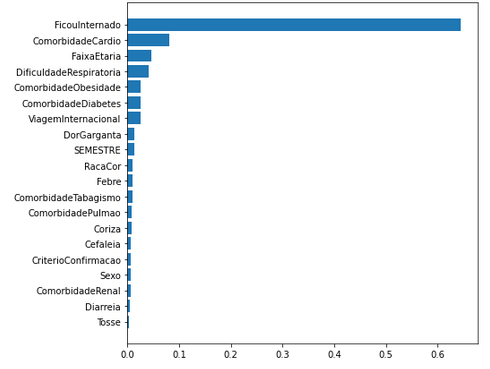

In [ ]:
for coluna in erros_obito_sobreviveu.columns:
  print(erros_obito_sobreviveu[coluna].value_counts(normalize=True)*100)
  print()

3    95.876289
0     4.123711
Name: CriterioConfirmacao, dtype: float64

10    38.144330
8     21.649485
9     15.463918
11    13.402062
7      3.092784
5      3.092784
6      3.092784
4      2.061856
Name: FaixaEtaria, dtype: float64

2    54.639175
0    45.360825
Name: Sexo, dtype: float64

1    51.546392
4    31.958763
5     8.247423
2     8.247423
Name: RacaCor, dtype: float64

1    62.886598
2    37.113402
Name: Febre, dtype: float64

1    61.85567
2    38.14433
Name: DificuldadeRespiratoria, dtype: float64

2    56.701031
1    43.298969
Name: Tosse, dtype: float64

1    71.134021
2    28.865979
Name: Coriza, dtype: float64

1    70.103093
2    29.896907
Name: DorGarganta, dtype: float64

1    92.783505
2     7.216495
Name: Diarreia, dtype: float64

1    81.443299
2    18.556701
Name: Cefaleia, dtype: float64

1    93.814433
2     6.185567
Name: ComorbidadePulmao, dtype: float64

2    71.134021
1    28.865979
Name: ComorbidadeCardio, dtype: float64

1    90.721649
2     9.278351
N

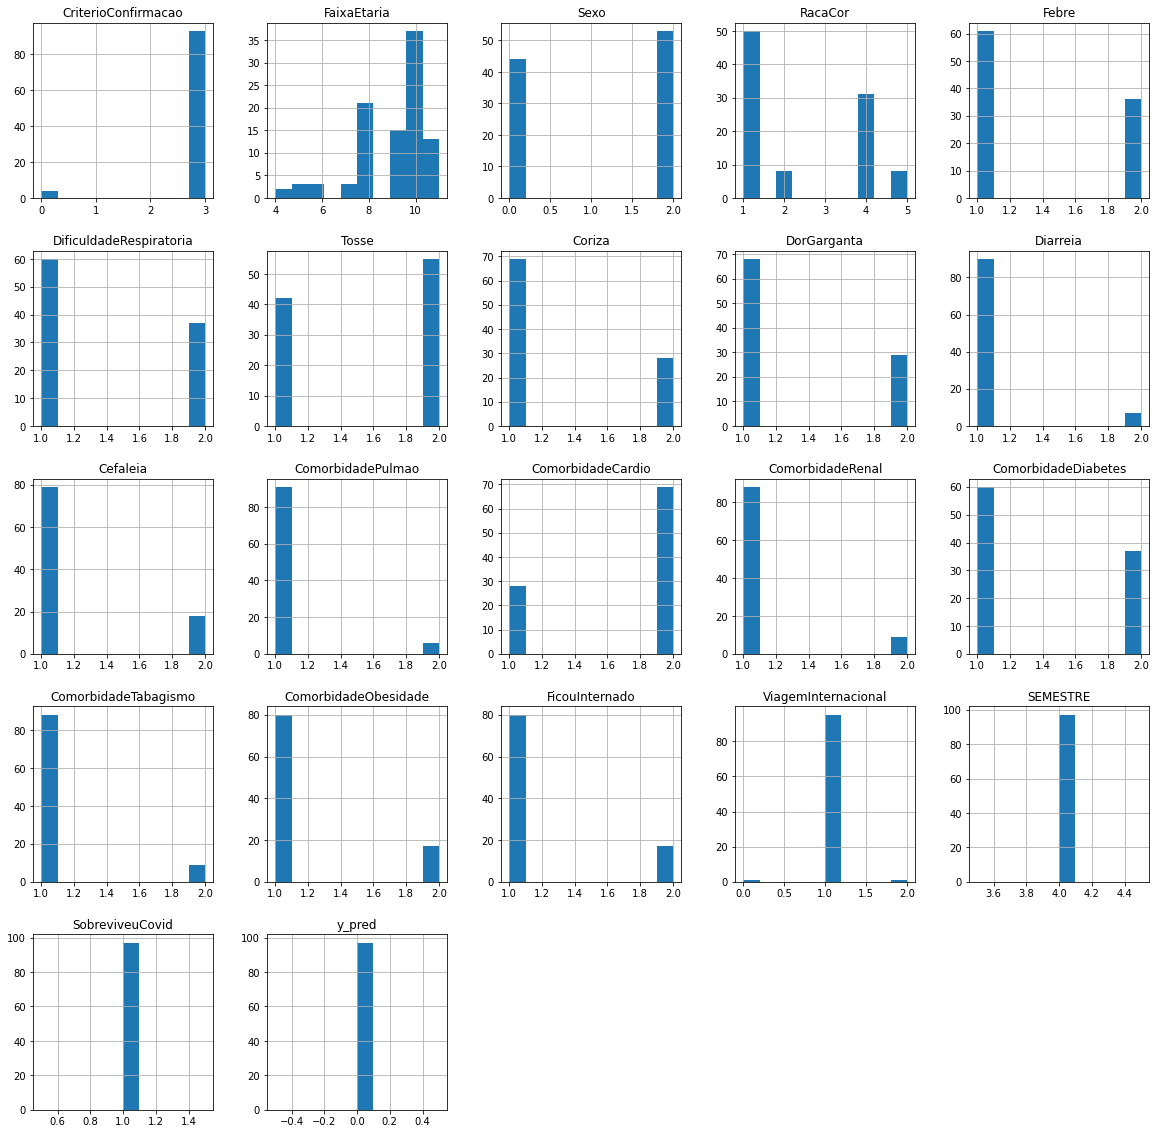

In [ ]:
erros_obito_sobreviveu.hist(figsize=(20,20));


A maioria dos casos foram: 


*   confirmados de forma laboratorial (95%)
*   faixa etária elevada (88% acima de 60 anos)
*   maioria apresentava comorbidade cardiaca (70%)



#Vacinacao

In [ ]:
vacina = pd.read_excel('/content/drive/MyDrive/TCC ANALISE DE DADOS/vacinacao.xlsx')
vacina.head()

Dose DataAplicacao  Idade Sexo PacienteMunicipio  PacienteBairro
0  1 Dose    2021-04-09     62    F           VITORIA  JARDIM CAMBURI
1  1 Dose    2021-04-09     62    F           VITORIA  JARDIM CAMBURI
2  1 Dose    2021-04-09     64    F           VITORIA  JARDIM CAMBURI
3  1 Dose    2021-04-09     62    F           VITORIA  JARDIM CAMBURI
4  1 Dose    2021-04-09     61    F           VITORIA  JARDIM CAMBURI

In [ ]:
vacina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685442 entries, 0 to 685441
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Dose               685442 non-null  object        
 1   DataAplicacao      685442 non-null  datetime64[ns]
 2   Idade              685442 non-null  int64         
 3   Sexo               613143 non-null  object        
 4   PacienteMunicipio  685442 non-null  object        
 5   PacienteBairro     684018 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 31.4+ MB


In [ ]:
df_data = df.groupby('DataDiagnostico').size()
df_data = pd.DataFrame(df_data)

figura = px.line(title='Casos confirmados')

for i in df_data:
 figura.add_scatter(x=df_data.index, y = df_data[i], name=i)

figura.show()

In [ ]:
df_data_obito = df.groupby('DataObito').size()
df_data_obito = pd.DataFrame(df_data_obito)

figura = px.line(title='Óbitos')

for i in df_data:
 figura.add_scatter(x=df_data_obito.index, y = df_data_obito[i], name=i)

figura.show()

In [ ]:
df_data_obito_cum = df.groupby('DataObito').size().cumsum()
df_data_obito_cum = pd.DataFrame(df_data_obito_cum)


figura = px.line(title='Óbitos acumulado')
for i in df_data:
 figura.add_scatter(x=df_data_obito_cum.index, y = df_data_obito_cum[i], name=i)
figura.show()


In [ ]:
aplicacao = vacina.groupby('DataAplicacao').size()
df_aplicacao = pd.DataFrame(aplicacao)

figura = px.line(title='Vacinacao')

for i in df_data:
 figura.add_scatter(x=df_aplicacao.index, y = df_aplicacao[i], name=i)

figura.show()

In [ ]:
dose1 = vacina.query('Dose == "1 Dose"')
dose2 = vacina.query('Dose == "2 Dose"')
dose3 = vacina.query('Dose == "Reforço"')
aplicacao_cum = vacina.groupby('DataAplicacao').size().cumsum()

dose1_df = pd.DataFrame(dose1.groupby('DataAplicacao').size().cumsum())
dose2_df = pd.DataFrame(dose2.groupby('DataAplicacao').size().cumsum())
dose3_df = pd.DataFrame(dose3.groupby('DataAplicacao').size().cumsum())
df_aplicacao_cum = pd.DataFrame(aplicacao_cum)

figura = px.line(title='Vacinação acumulada de cada dose da vacina')

for i in df_data:
 figura.add_scatter(x=dose1_df.index, y = dose1_df[i], name='1 dose')
 figura.add_scatter(x=dose2_df.index, y = dose2_df[i], name='2 dose')
 figura.add_scatter(x=dose3_df.index, y = dose3_df[i], name='Dose de reforço')

figura.show()

In [ ]:
df_data = df.groupby('DataDiagnostico').size().cumsum()
df_data = pd.DataFrame(df_data)

aplicacao_cum = vacina.groupby('DataAplicacao').size().cumsum()
df_aplicacao_cum = pd.DataFrame(aplicacao_cum)

figura = px.line(title='Casos confirmados', width=1300, height=600)
for i in df_data:
 figura.add_scatter(x=df_data.index, y = df_data[i], name=i)

figura2 = px.line(title='Vacinação acumulada de cada dose', width=1480, height=600)
for i in df_data:
 figura2.add_scatter(x=dose1_df.index, y = dose1_df[i], name='1 dose')
 figura2.add_scatter(x=dose2_df.index, y = dose2_df[i], name='2 dose')
 figura2.add_scatter(x=dose3_df.index, y = dose3_df[i], name='Dose de reforço')


figura3 = px.line(title='Óbitos acumulado', width=1300, height=600)
for i in df_data:
 figura3.add_scatter(x=df_data_obito_cum.index, y = df_data_obito_cum[i], name=i)



figura.update_layout(font=dict(size=22))
figura2.update_layout(font=dict(size=22))
figura3.update_layout(font=dict(size=22))


figura.show()
figura2.show()
figura3.show()